# Exploritary Data Analysis for the candidates dataset
only the candidates which have some jobs matches

## Import libraries

In [4]:
import re
import json
import pymorphy3
import tokenize_uk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

## Load data

In [5]:
df = pd.read_csv('../../data/prepared_candidates/candidates_prepared.csv')
df.head()

,Position,Moreinfo,Looking For,Highlights,Primary Keyword,English Level,Experience Years,CV,CV_lang,id
0,1c,"Розробник 1с/BAS, всі українські конфігурації,...",NaN,NaN,Other,intermediate,11.0,"\nРозробник 1с/BAS, всі українські конфігураці...",uk,dcaeffc4-1d1f-5754-a567-f478f0c8aa6f
1,1c developer,Еко - маркет Торгівля роздрібна 1 рік 9 місяці...,NaN,Hillel IT school Java Basic and Java Pro 2022\...,SQL,pre,11.0,Hillel IT school Java Basic and Java Pro 2022\...,uk,2767ca2d-4bca-5b41-b9e0-e42ad5700b6f
2,1C developer (purpose: switch to Golang/Ruby),Займаюся автоматизацією підприємств вже понад ...,"Найголовніше - це атмосфера в колективі, також...","Самостійно приймати рішення, брати відповідаль...",Ruby,upper,7.0,"Самостійно приймати рішення, брати відповідаль...",uk,ff07df1f-5268-5865-8f30-1cc660786494
3,1C програміст,Шукаю роботу з метою розвитку та вдосконалення...,В першу чергу мене цікавить можливість розвитк...,"Пройшов курси: «1С за 21 день, 1С 8.3» та «1С ...",SQL,intermediate,0.5,"Пройшов курси: «1С за 21 день, 1С 8.3» та «1С ...",uk,da4b79b1-fbc5-5dfe-bba0-58339f262d11
4,1C програміст,Шукаю роботу по напрямку junior С++. Маю досві...,"Цікаві проекти, саморозвиток.",NaN,Data Engineer,intermediate,6.0,\nШукаю роботу по напрямку junior С++. Маю дос...,uk,b118a952-cbe6-58ac-824a-10de5322570c


In [6]:
unique_candidates = list(json.load(open('../../data/final_groups/groups.json')).keys())
print("Unique candidates count:",len(unique_candidates))

Unique candidates count: 130200


In [7]:
df = df[df['id'].isin(unique_candidates)].reset_index(drop=True)
print("Candidates count after filtering:",len(df['id'].unique()))
df.head()

Candidates count after filtering: 130200


,Position,Moreinfo,Looking For,Highlights,Primary Keyword,English Level,Experience Years,CV,CV_lang,id
0,1C програміст,Шукаю роботу з метою розвитку та вдосконалення...,В першу чергу мене цікавить можливість розвитк...,"Пройшов курси: «1С за 21 день, 1С 8.3» та «1С ...",SQL,intermediate,0.5,"Пройшов курси: «1С за 21 день, 1С 8.3» та «1С ...",uk,da4b79b1-fbc5-5dfe-bba0-58339f262d11
1,1С Developer,02/21 - today - Online Retail\r\n- модернізаці...,NaN,NaN,SQL,intermediate,5.0,\n02/21 - today - Online Retail\r\n- модерніза...,uk,0e73f394-07ea-5bed-b912-0bfaeba4a1fe
2,1С програміст,Програміст з досвідом роботи понад 5 років.\r\...,NaN,"Ряд успішних впроваджень: \r\nТзОВ "" Хан Ектро...",Other,basic,3.0,"Ряд успішних впроваджень: \r\nТзОВ "" Хан Ектро...",uk,4d64d70c-50f3-52de-9ad8-4d066e943465
3,1С розробник,Підтримка користувачів і оновлення бази 1С. Ро...,NaN,NaN,Other,intermediate,2.0,\nПідтримка користувачів і оновлення бази 1С. ...,uk,4d81582f-7d41-52dc-bcc0-732ce4114ba6
4,2D/3D Artist,"Привіт! Я Діана, моя суперсила маневрувати мі...",NaN,"Мої обов'язки:\r\n- створення ігрових іконок,\...",Artist,basic,1.0,"Мої обов'язки:\r\n- створення ігрових іконок,\...",uk,44e5fb2c-9c60-5cb4-973a-9a39eadd71a5


## General dataset statistics

In [8]:
# general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130200 entries, 0 to 130199
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Position          130200 non-null  object 
 1   Moreinfo          130200 non-null  object 
 2   Looking For       57216 non-null   object 
 3   Highlights        61578 non-null   object 
 4   Primary Keyword   130187 non-null  object 
 5   English Level     129987 non-null  object 
 6   Experience Years  130200 non-null  float64
 7   CV                130200 non-null  object 
 8   CV_lang           130200 non-null  object 
 9   id                130200 non-null  object 
dtypes: float64(1), object(9)
memory usage: 9.9+ MB


In [9]:
# unique values counts for each column
for col in df.columns:
    print(col,'\t', len(df[col].unique()))

Position 	 4365
Moreinfo 	 130131
Looking For 	 55735
Highlights 	 61326
Primary Keyword 	 42
English Level 	 8
Experience Years 	 9
CV 	 130200
CV_lang 	 2
id 	 130200


In [10]:
# general statistics
df.describe()

,Experience Years
count,130200.000000
mean,2.021686
std,1.598278
min,0.000000
25%,0.500000
50%,2.000000
75%,3.000000
max,5.000000


## Additional function

In [11]:
def hist_with_stat_line(df, col, title):
    df[col].str.len().plot(kind= 'hist',bins=100, figsize=(15,5), color='green', alpha=0.5, title=title)
    plt.axvline(df[col].str.len().median(), color='red', linestyle='dashed', linewidth=1, label='median')
    plt.axvline(df[col].str.len().quantile(0.25), color='black', linestyle='dashed', linewidth=1, label='25%')
    plt.axvline(df[col].str.len().quantile(0.75), color='black', linestyle='dashed', linewidth=1, label='75%')
    plt.axvline(df[col].str.len().mean(), color='blue', linestyle='dashed', linewidth=1, label='mean')
    plt.legend()
    plt.show()

## Statistics and plots for each column

### Position column
`manual written position titles`

In [12]:
# min, max, mean, median, 25%, 50%, 75% for length of Position column
df['Position'].str.len().describe()

count    130200.000000
mean         17.356029
std           5.059149
min           2.000000
25%          14.000000
50%          17.000000
75%          20.000000
max          49.000000
Name: Position, dtype: float64

<Axes: title={'center': 'Top 20 most popular positions'}, xlabel='Position'>

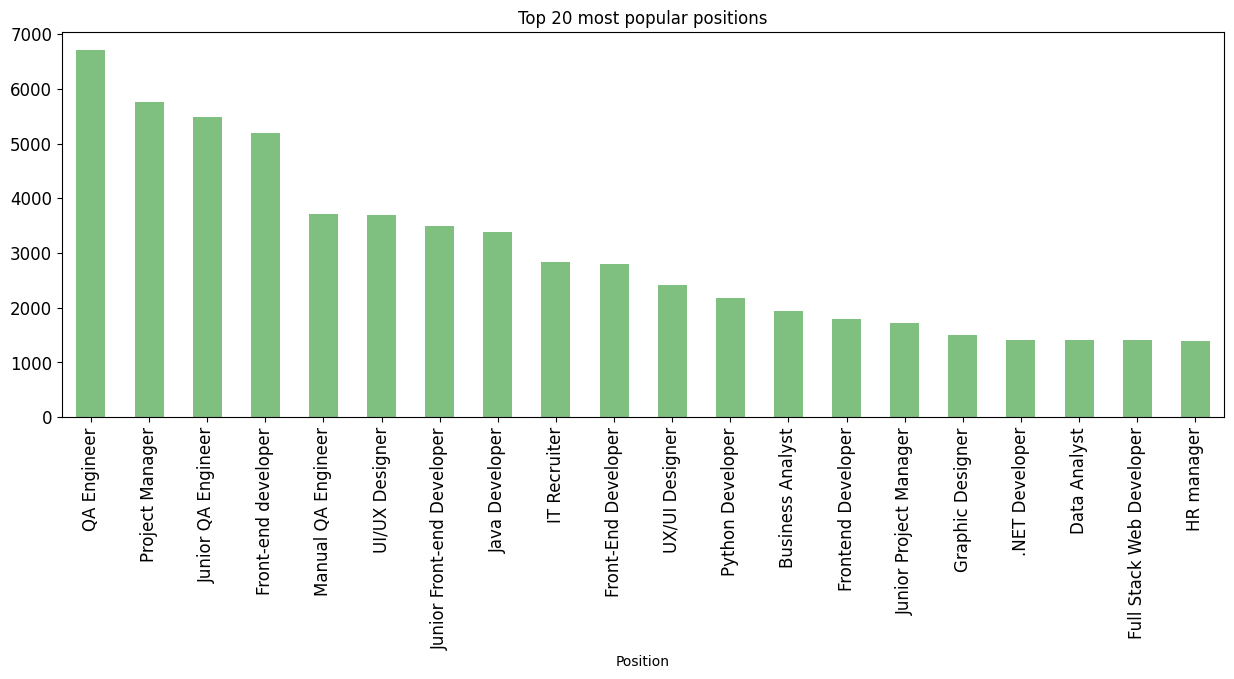

In [13]:
# top 20 most popular positions as a bar chart
df['Position'].value_counts()[:20].plot(kind='bar', 
                                        figsize=(15,5), title='Top 20 most popular positions', 
                                        fontsize=12, color='green', alpha=0.5)


In [14]:
# tail 20 positions
df['Position'].value_counts()[-20:]

Position
Manual Backend QA Engineer                     1
Automation QA Engineer (SDET)                  1
Machine learning engineer / Data Scientist     1
Machine Learning Engineer (Computer Vision)    1
Linux Support Engineer                         1
Linkbuilder/Outreach specialist                1
Linkbuilder/Outreach Specialist                1
Linux Developer                                1
Linux Engineer                                 1
Linux Kernel Developer                         1
Linux Kernel Engineer                          1
Linux Sysadmin                                 1
Machine learning Engineer                      1
Automation QA Python                           1
Linux System Administrator/DevOps              1
Localization Engineer                          1
Low Code Developer                             1
Machine Learning developer                     1
Automation QA (Java)                           1
1C програміст                                  1
Name: count

we can see that the most common position and some of the rarest positions can be really similar due to manual writing of the position titles.

<Axes: title={'center': 'Top 20 most popular positions. English language'}, xlabel='Position'>

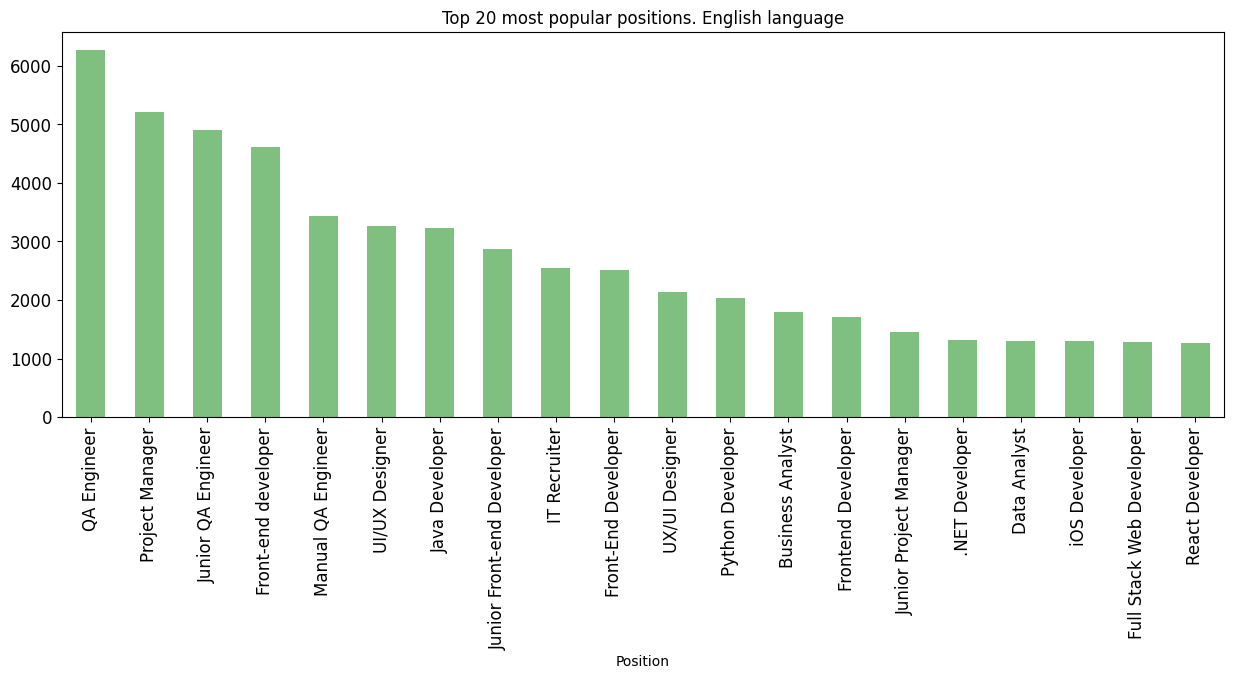

In [15]:
# top 20 most popular positions as a bar chart and show count of each position. English version
df[df['CV_lang']=='en']['Position'].value_counts()[:20].plot(kind='bar', 
                                        figsize=(15,5), title='Top 20 most popular positions. English language', 
                                        fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'Top 20 most popular positions. Ukrainian language'}, xlabel='Position'>

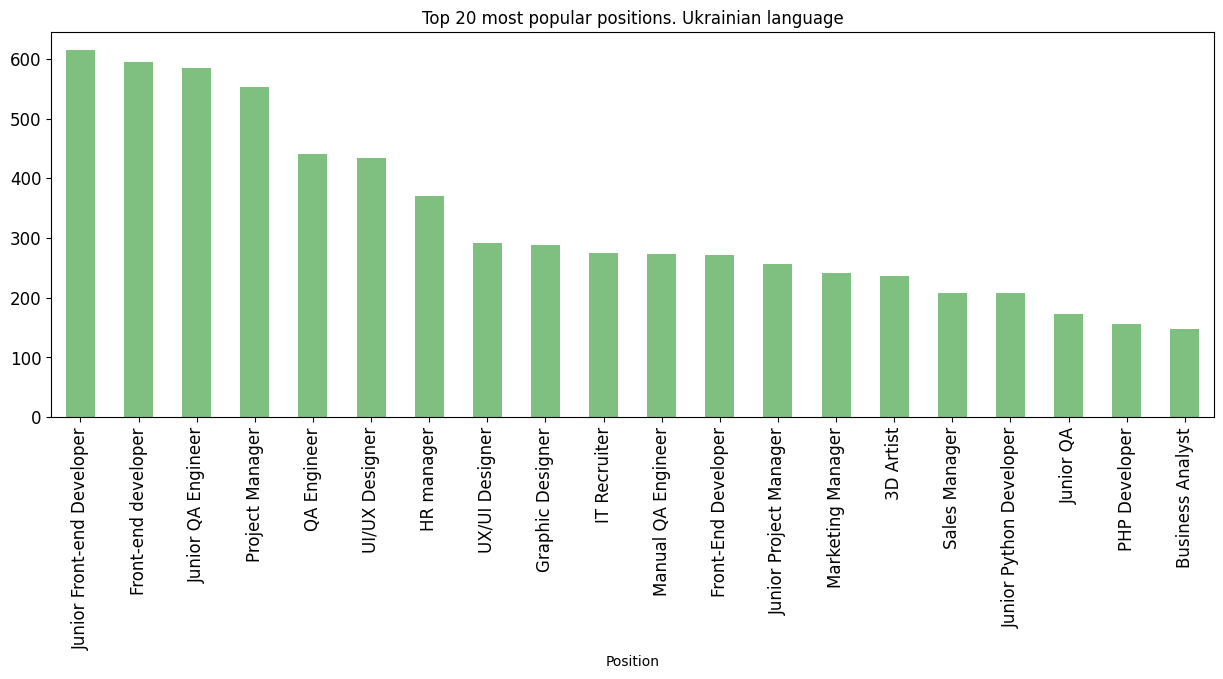

In [16]:
# top 20 most popular positions as a bar chart and show count of each position. English version
df[df['CV_lang']=='uk']['Position'].value_counts()[:20].plot(kind='bar', 
                                        figsize=(15,5), title='Top 20 most popular positions. Ukrainian language', 
                                        fontsize=12, color='green', alpha=0.5)

### Moreinfo column
`manual candidate's info`

In [17]:
# Moreinfo column length statistics
df['Moreinfo'].str.len().describe()

count    130200.000000
mean        657.793571
std         502.082374
min           1.000000
25%         302.000000
50%         501.000000
75%         850.000000
max        2600.000000
Name: Moreinfo, dtype: float64

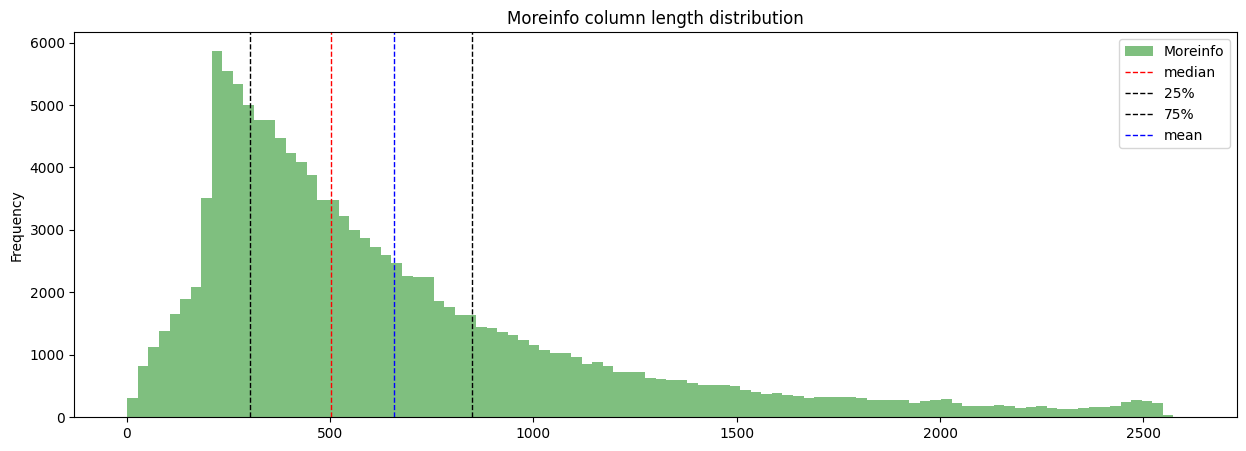

In [18]:
# distribution of Moreinfo column length
hist_with_stat_line(df, 'Moreinfo', 'Moreinfo column length distribution')

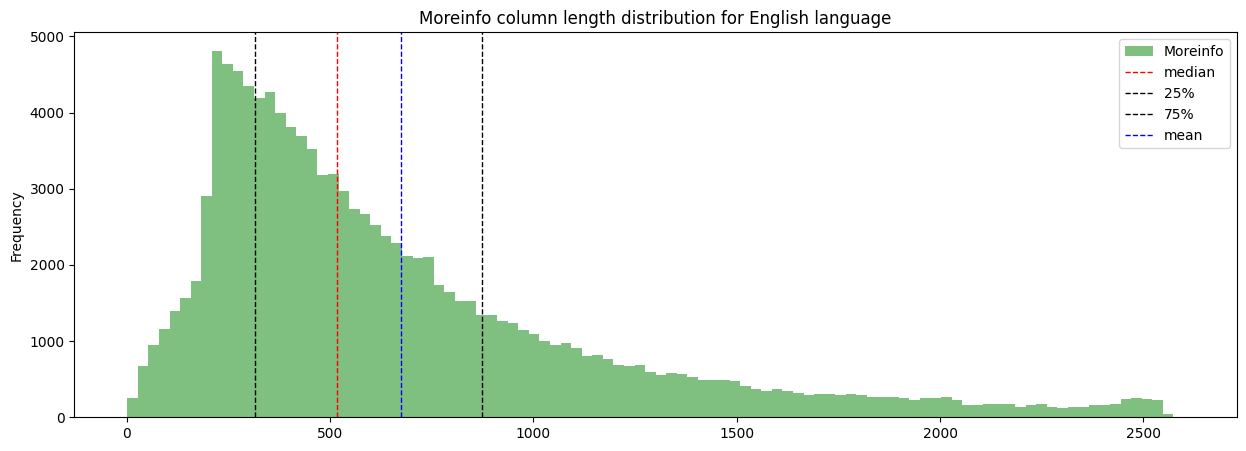

In [19]:
# distribution of Moreinfo column length for English language
hist_with_stat_line(df[df['CV_lang']=='en'], 'Moreinfo', 'Moreinfo column length distribution for English language')

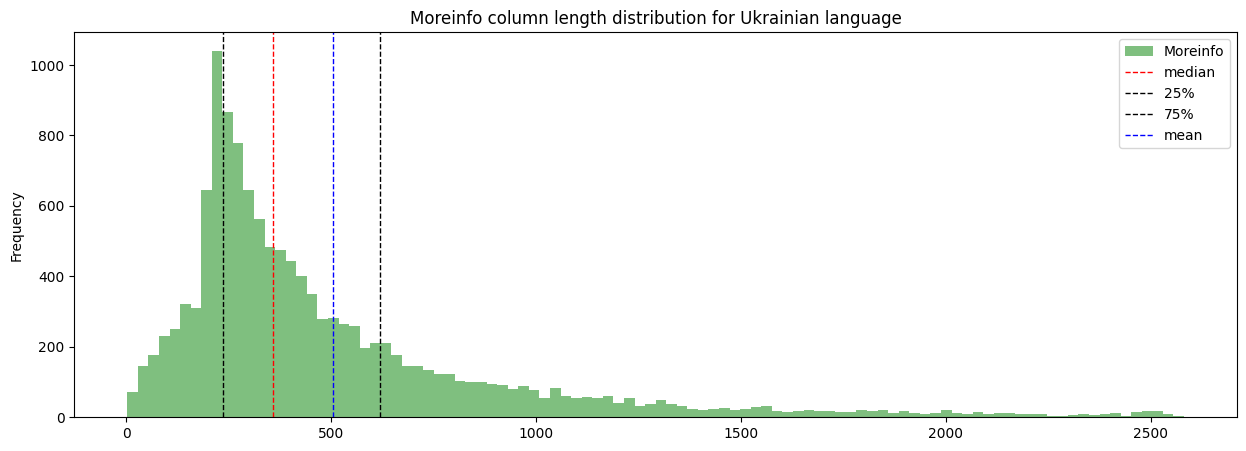

In [20]:
# distribution of Moreinfo column length for English language
hist_with_stat_line(df[df['CV_lang']=='uk'], 'Moreinfo', 'Moreinfo column length distribution for Ukrainian language')

### Looking For column
`manual written what people search`

In [21]:
# Looking For column length statistics
df['Looking For'].str.len().describe()

count    57216.000000
mean       160.121085
std        157.430269
min          1.000000
25%         68.000000
50%        117.000000
75%        199.000000
max       2489.000000
Name: Looking For, dtype: float64

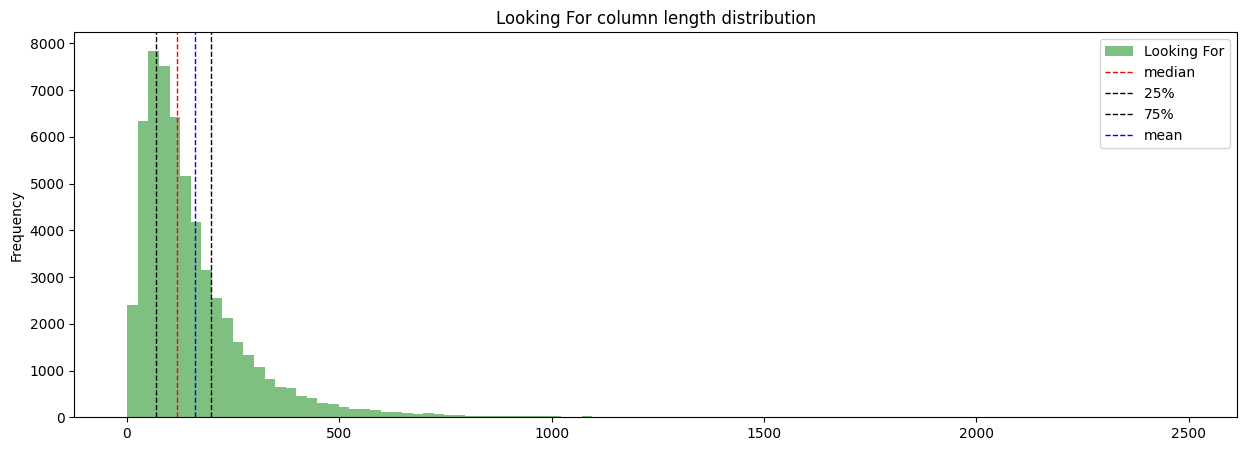

In [22]:
# distribution of Looking For column length
hist_with_stat_line(df, 'Looking For', 'Looking For column length distribution')

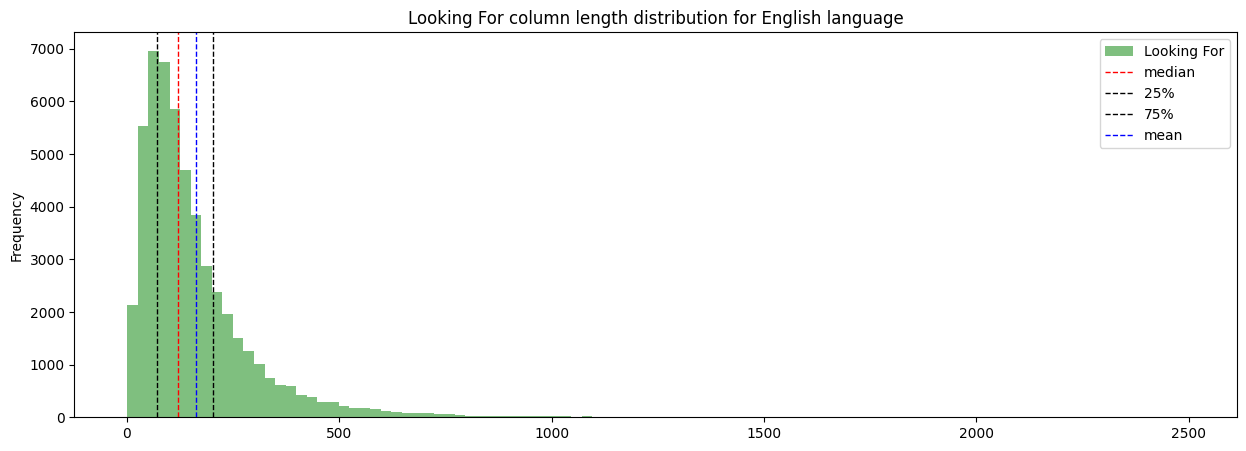

In [23]:
# distribution of Looking For column length for English language
hist_with_stat_line(df[df['CV_lang']=='en'], 'Looking For', 'Looking For column length distribution for English language')

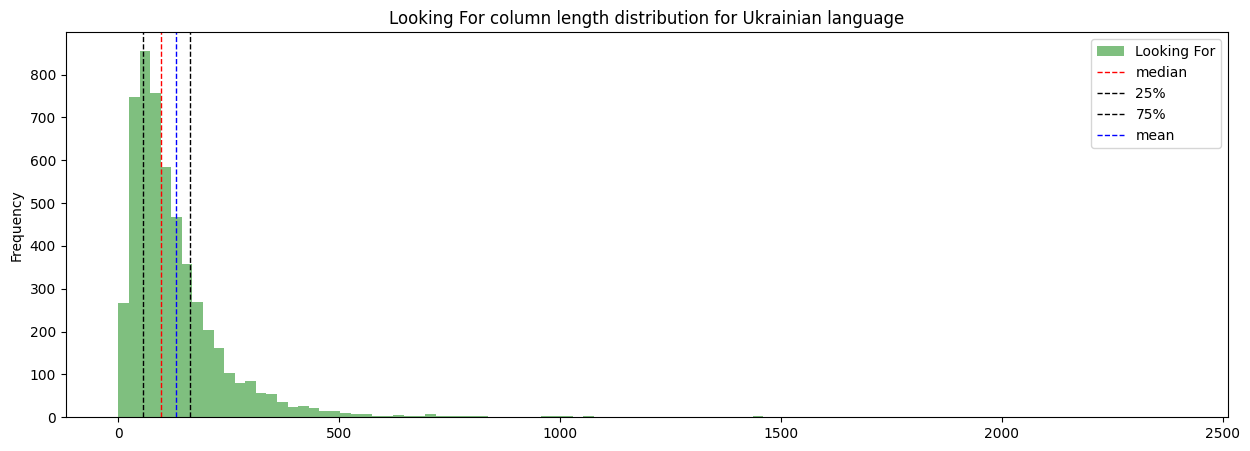

In [24]:
# distribution of Looking For column length for Ukrainian language
hist_with_stat_line(df[df['CV_lang']=='uk'], 'Looking For', 'Looking For column length distribution for Ukrainian language')

### Highlights column
`manual written candidate's highlights`

In [25]:
# Highlights column length statistics
df['Highlights'].str.len().describe()

count    61578.000000
mean       287.333853
std        281.827052
min          1.000000
25%        112.000000
50%        204.000000
75%        360.000000
max       2500.000000
Name: Highlights, dtype: float64

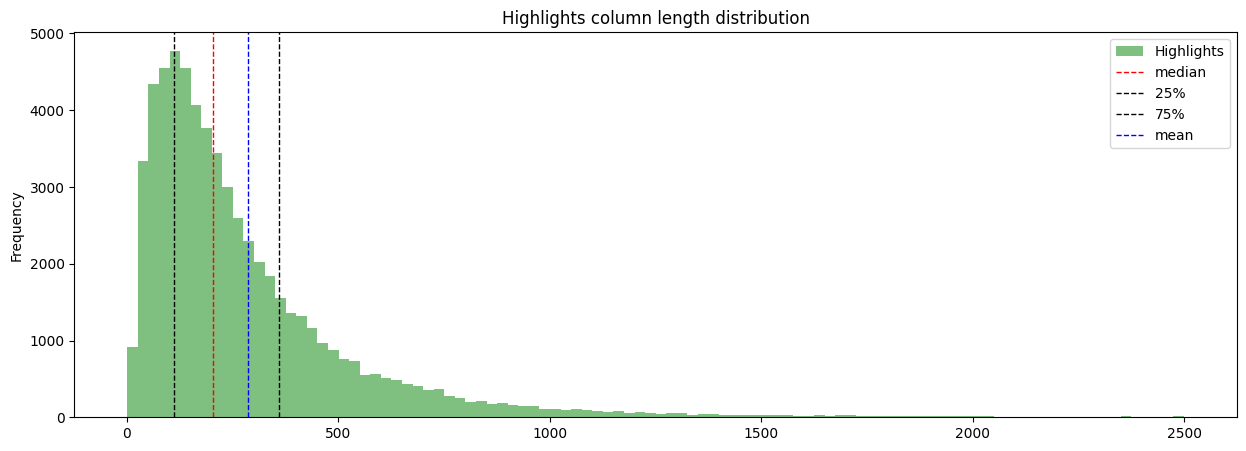

In [26]:
# distribution of Highlights column length
hist_with_stat_line(df, 'Highlights', 'Highlights column length distribution')

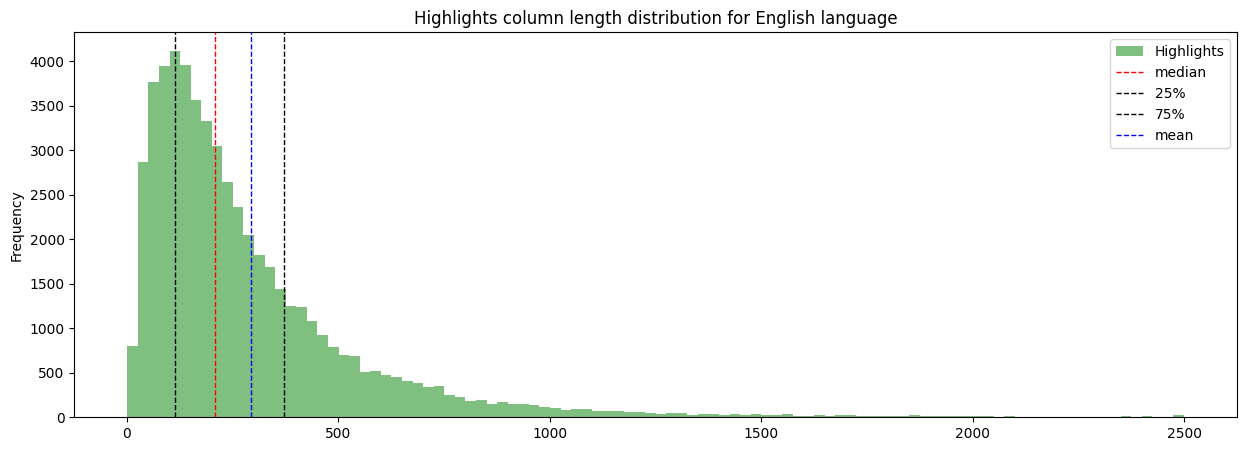

In [27]:
# distribution of Highlights column length for English language
hist_with_stat_line(df[df['CV_lang']=='en'], 'Highlights', 'Highlights column length distribution for English language')

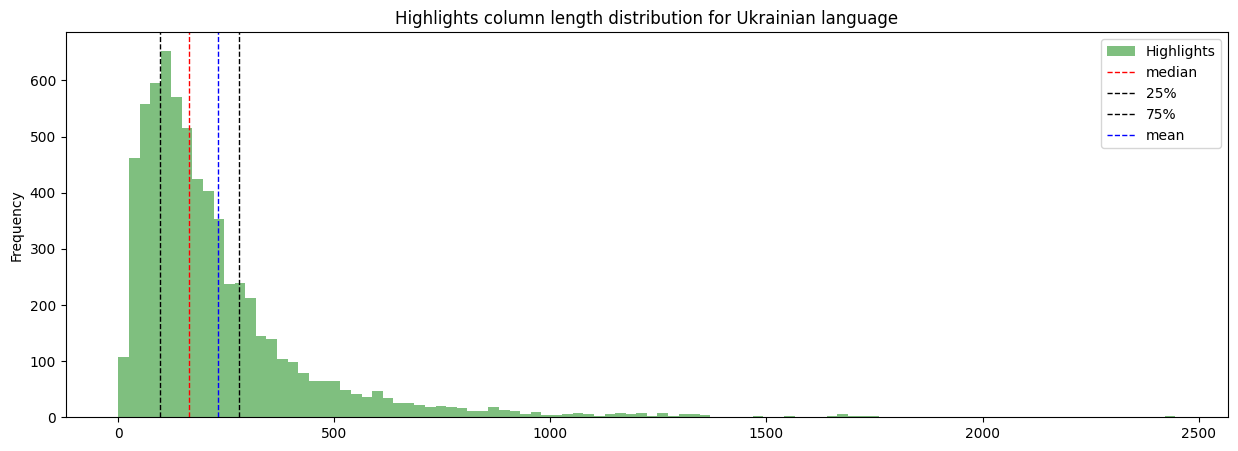

In [28]:
# distribution of Highlights column length for Ukrainian language
hist_with_stat_line(df[df['CV_lang']=='uk'], 'Highlights', 'Highlights column length distribution for Ukrainian language')

## Primary Keyword column
`job profile type`

In [29]:
# unique Primary Keyword count
print("Unique Primary Keyword count:",len(df['Primary Keyword'].unique()))

Unique Primary Keyword count: 42


<Axes: title={'center': 'Top 20 most popular Primary Keywords'}, xlabel='Primary Keyword'>

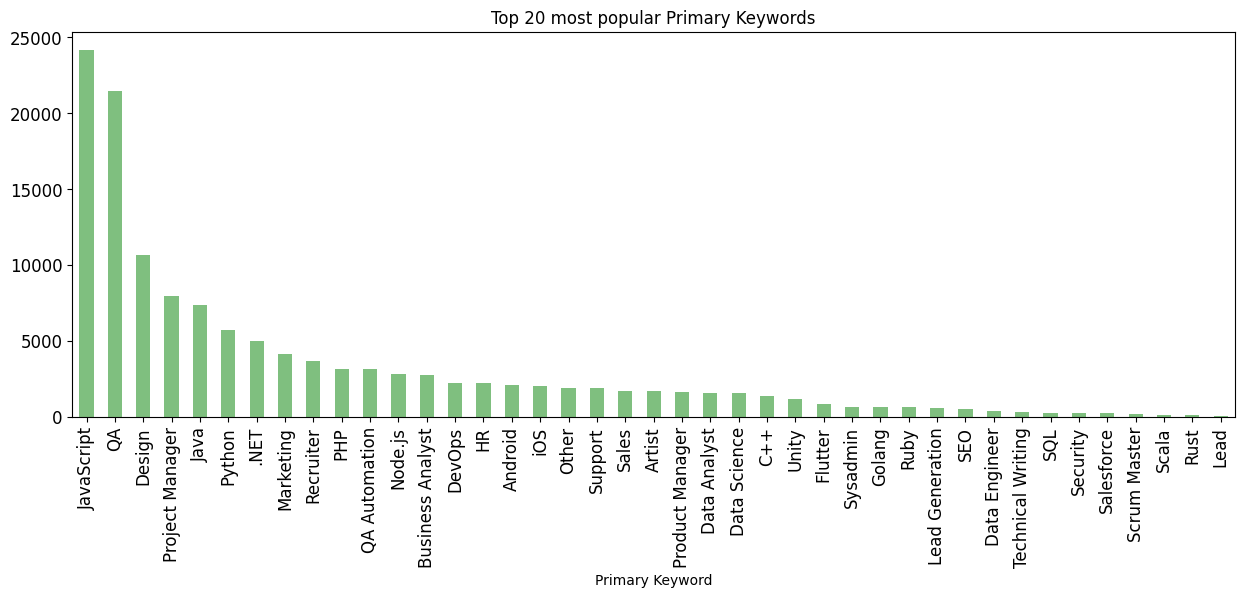

In [30]:
# primary keyword bar chart
df['Primary Keyword'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Top 20 most popular Primary Keywords',
                                            fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'Top 20 most popular Primary Keywords. English language'}, xlabel='Primary Keyword'>

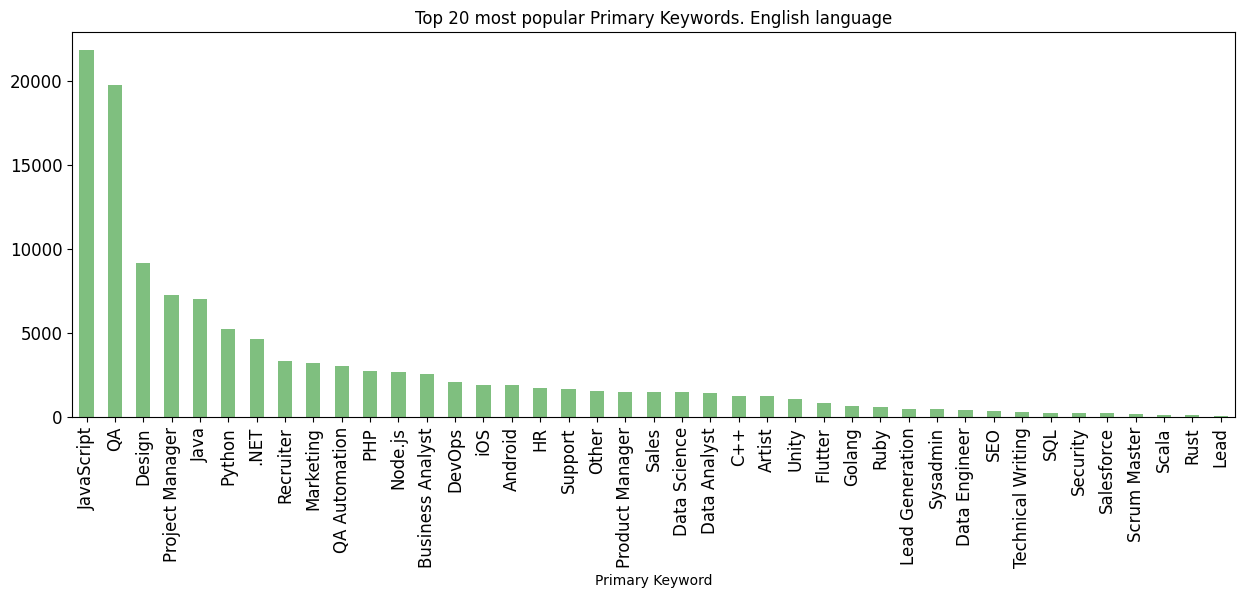

In [31]:
# primary keyword bar chart for English language
df[df['CV_lang']=='en']['Primary Keyword'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Top 20 most popular Primary Keywords. English language',
                                            fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'Top 20 most popular Primary Keywords. Ukrainian language'}, xlabel='Primary Keyword'>

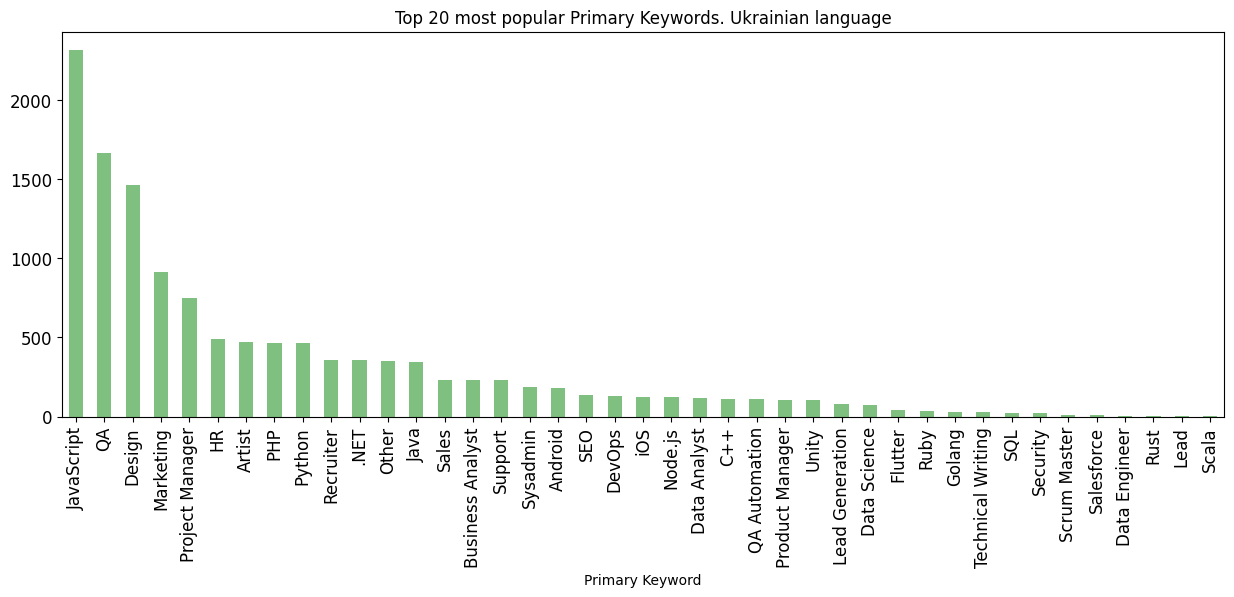

In [32]:
# primary keyword bar chart for Ukrainian language
df[df['CV_lang']=='uk']['Primary Keyword'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Top 20 most popular Primary Keywords. Ukrainian language',
                                            fontsize=12, color='green', alpha=0.5)

### English Level column
`candidate's english level`

In [33]:
# unique English Level count
print("Unique English Level count:",len(df['English Level'].unique()))

Unique English Level count: 8


<Axes: title={'center': 'English Level count'}, xlabel='English Level'>

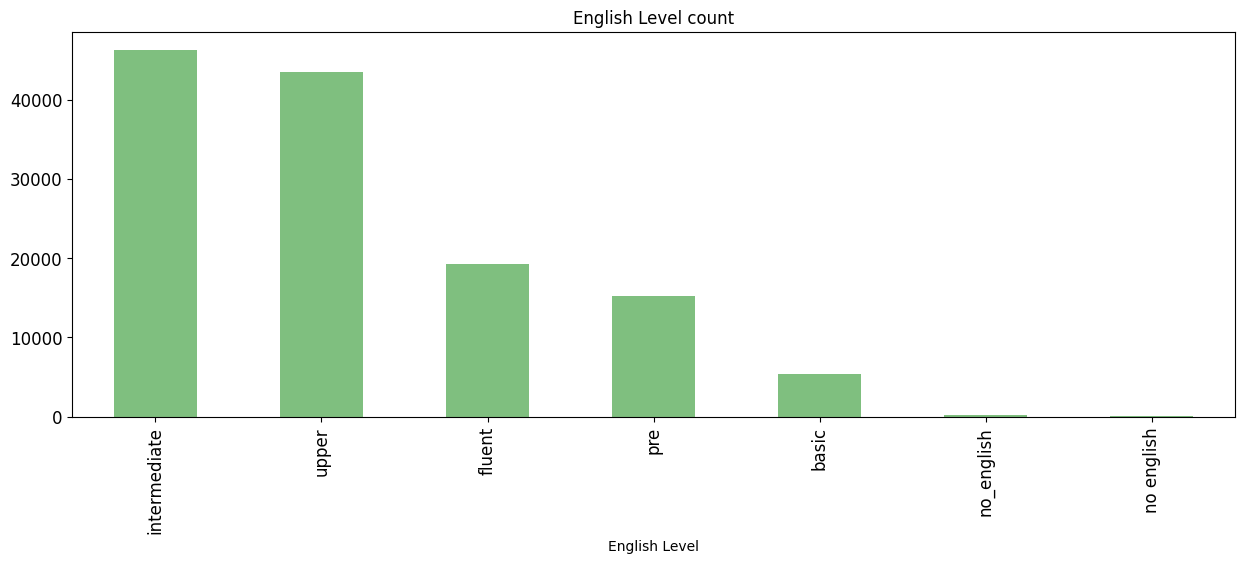

In [34]:
# English Level bar chart
df['English Level'].value_counts().plot(kind='bar',
                                        figsize=(15,5), title='English Level count',
                                        fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'English Level count. English language'}, xlabel='English Level'>

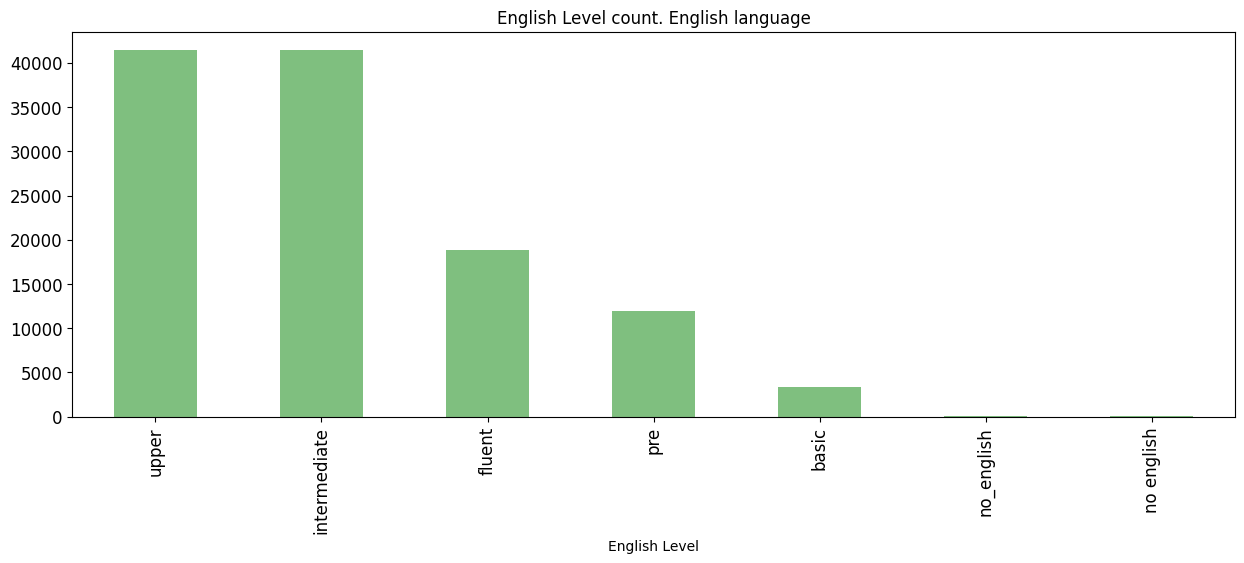

In [35]:
# English Level bar chart for English language
df[df['CV_lang']=='en']['English Level'].value_counts().plot(kind='bar',
                                        figsize=(15,5), title='English Level count. English language',
                                        fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'English Level count. Ukrainian language'}, xlabel='English Level'>

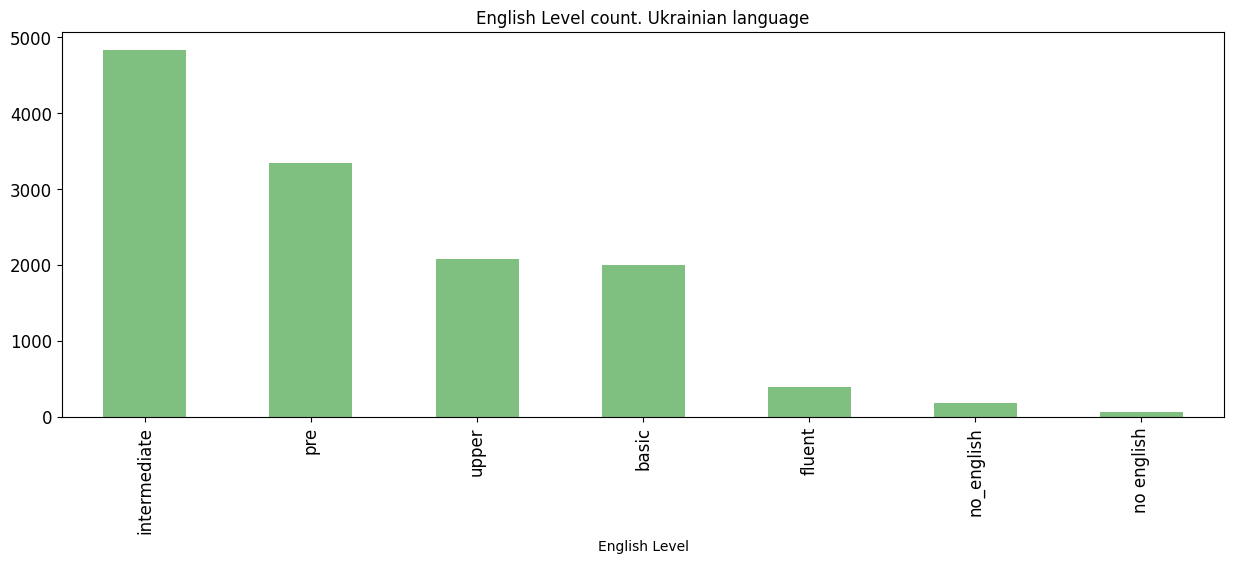

In [36]:
# English Level bar chart for Ukrainian language
df[df['CV_lang']=='uk']['English Level'].value_counts().plot(kind='bar',
                                        figsize=(15,5), title='English Level count. Ukrainian language',
                                        fontsize=12, color='green', alpha=0.5)

### Experience Years column
`candidate's experience years`

In [37]:
# general statistics for Experience Years column
df['Experience Years'].describe()

count    130200.000000
mean          2.021686
std           1.598278
min           0.000000
25%           0.500000
50%           2.000000
75%           3.000000
max           5.000000
Name: Experience Years, dtype: float64

<Axes: title={'center': 'Experience Years count'}, xlabel='Experience Years'>

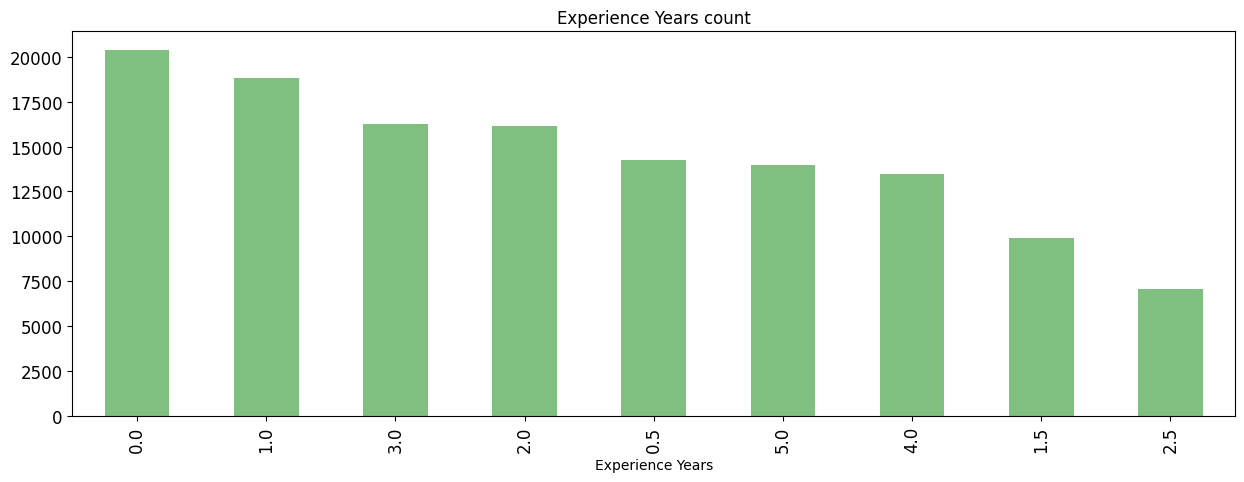

In [38]:
# bar chart for Experience Years column
df['Experience Years'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Experience Years count',
                                            fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'Experience Years count. English language'}, xlabel='Experience Years'>

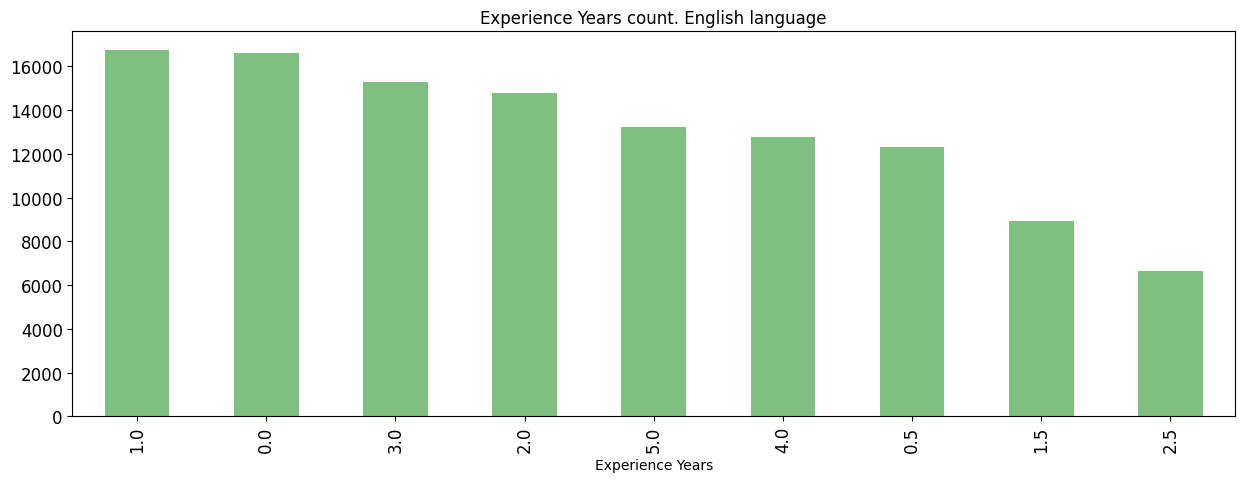

In [39]:
# bar chart for Experience Years column for English language
df[df['CV_lang']=='en']['Experience Years'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Experience Years count. English language',
                                            fontsize=12, color='green', alpha=0.5)

<Axes: title={'center': 'Experience Years count. Ukrainian language'}, xlabel='Experience Years'>

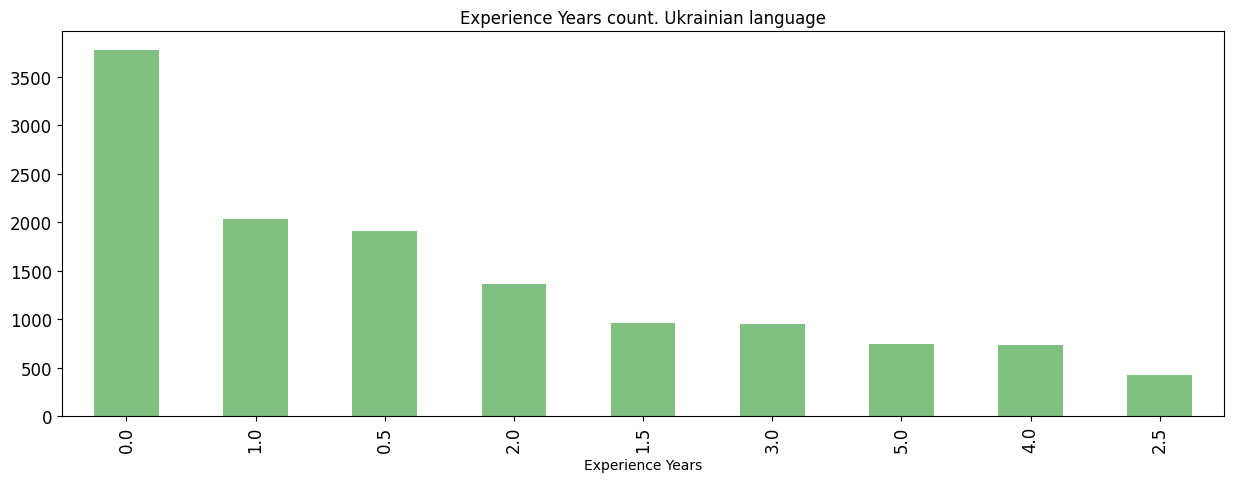

In [40]:
# bar chart for Experience Years column for Ukrainian language
df[df['CV_lang']=='uk']['Experience Years'].value_counts().plot(kind='bar',
                                            figsize=(15,5), title='Experience Years count. Ukrainian language',
                                            fontsize=12, color='green', alpha=0.5)

### CV column
`syntetic created column from: Highlights + Moreinfo + Looking For columns`

In [41]:
# CV column length statistics
df['CV'].str.len().describe()

count    130200.000000
mean        866.052650
std         623.639847
min           7.000000
25%         422.000000
50%         684.000000
75%        1118.000000
max        7372.000000
Name: CV, dtype: float64

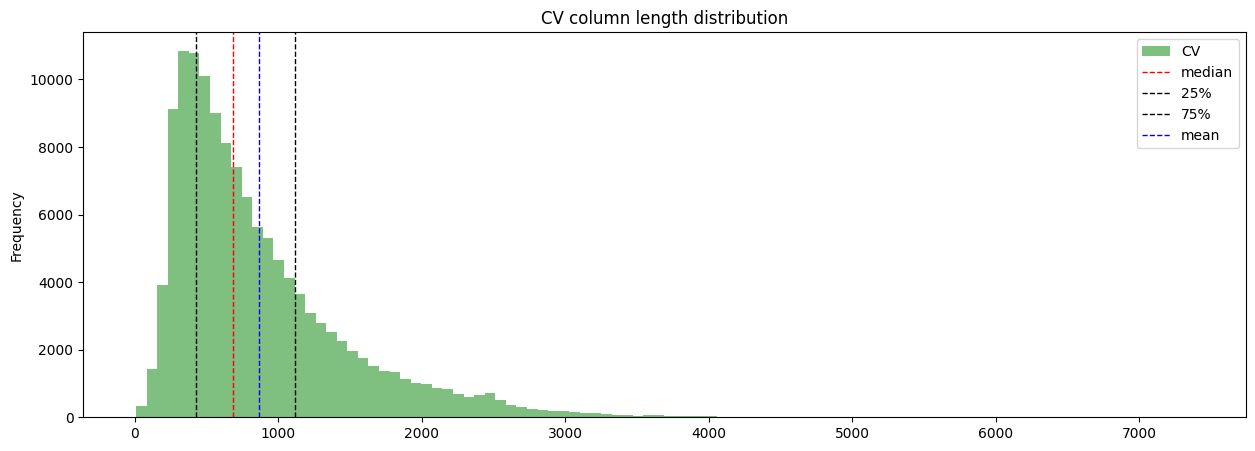

In [42]:
# distribution of CV column length
hist_with_stat_line(df, 'CV', 'CV column length distribution')

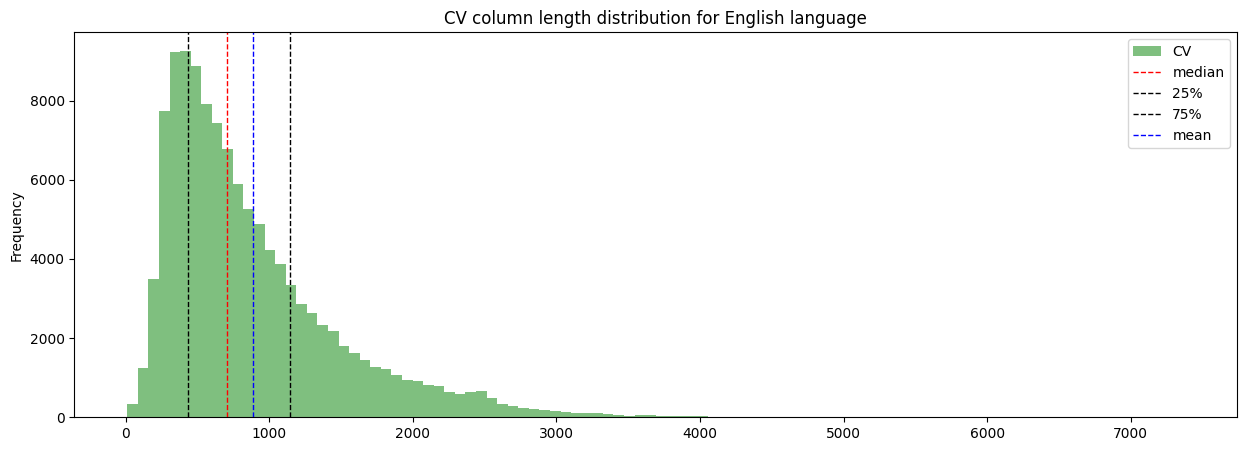

In [43]:
# distribution of CV column length for English language
hist_with_stat_line(df[df['CV_lang']=='en'], 'CV', 'CV column length distribution for English language')

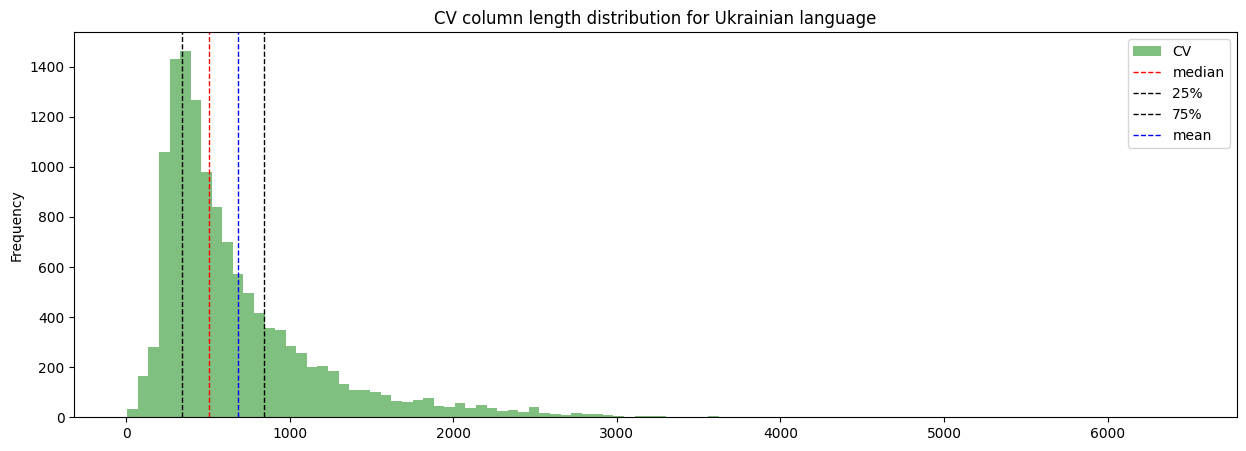

In [44]:
# distribution of CV column length for Ukrainian language
hist_with_stat_line(df[df['CV_lang']=='uk'], 'CV', 'CV column length distribution for Ukrainian language')

### CV_lang column
`syntetic created column from CV column for language detection`

<Axes: title={'center': 'CV_lang column value counts'}, ylabel='count'>

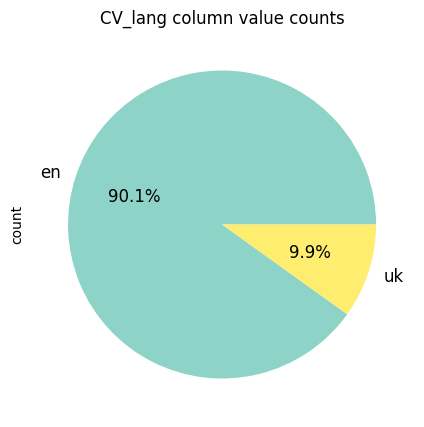

In [45]:
# CV_lang column value counts as a pie chart
df['CV_lang'].value_counts().plot(kind='pie', figsize=(5,5), title='CV_lang column value counts', fontsize=12, autopct='%1.1f%%', colormap='Set3')

### id column
`synthetic created column for identifcation each candidate`

## Morphological analysis of CVs(Ukrainian language for detecting gender features)

In [46]:
morph = pymorphy3.MorphAnalyzer(lang='uk')
morph.parse("працювала")[0].tag.gender

'femn'

In [47]:
morph.parse("працювала")[0].tag.POS

'VERB'

In [48]:
# detect percantage where we have feminitive in Ukrainian CVs

morph = pymorphy3.MorphAnalyzer(lang='uk')

def detect_feminitive(text):
    words = tokenize_uk.tokenize_uk.tokenize_words(text)
    verbs = [morph.parse(word)[0].word for word in words if morph.parse(word)[0].tag.POS == 'VERB']
    femn_verb_len = len([morph.parse(word)[0].tag.gender for word in verbs if morph.parse(word)[0].tag.gender == 'femn'])
    if femn_verb_len == 0 or len(verbs) == 0:
        return 0
    
    gender = femn_verb_len/len(verbs)
    if gender > 0.5:
        print(text)
        print()
    return 1 if gender > 0.5 else 0

count = 0
ukr_cv = df[df['CV_lang'] == 'uk']['CV'].values
for cv_text in tqdm(ukr_cv):
    count+=detect_feminitive(cv_text)
print("Percentage of feminitive in Ukrainian CVs:", count/len(ukr_cv))

  1%|          | 95/12901 [00:00<00:39, 324.12it/s]


Працювала в індустрії казуальних ігор, розробляла персонажів від концепту до кінцевого рендеру. Також працювала над ізометричними проектами та робила для них пропси, ігрові елементи та персонажів. Мала досвід з маркетинговими артами для ігор а також інтерфейсом. Можу використовувати додатковий софт для прискорення роботи



Початківець в галузі 2D artist . 
Проходила курси а академії ARTCRAFT:
1)ArtCraft "Character Design"
5 march, 2019, Kiev
2)ArtCraft "Digitai Drawing"
11 August, 2018, Kiev
3)ArtCraft "Comics Drawing"
27.08.2019
4)ArtCraft " 2D render"
31.03.2023
Мала  досвід у проєктній зайнятості у  створені ілюстрацій для дитячих книжок .



Працюю графічним дизайнером на фрілансі. Розроблювала логотипи для фотографа, продуктових компаній. Також допомагала з бізнес айдентикою (флаєри, візитівки, конверти і т.п.) 
Нешодавно успішно закінчила курс "2d Character Design". Розробила свого персонажа, підібрала кольори, розробила для нього сет емоцій і підготовила його до моделювання ра

  2%|▏         | 195/12901 [00:00<00:41, 307.14it/s]

Закінчила курс "Цифровий малюнок" від ArtCraft у липні 2022 року, де значно вдосконалила базові принципи ілюстрації (колір, світло, композиція, перспектива) та почала малювати на всліпу, а чітко розуміючи, що за чим и як.

Закінчила курс "Графічний дизайн" від Sinergy Lab., де опанувала Photoshop та Illustrator.

Самостійно працювала з InDesign.
Як художник маю досвід лише як фрілансер: створення дитячих розмальовок, стилізованих портретів, картин по номерам. 

Як графічний дизайнер, займалася розробкою логотипів, свторенням паттернів, векторних илюстрацій.
Очікую на продиктивну спрівпрацю та прокачку моїх особистих навичок.

Навчилася працювати в Blender самостійно, по урокам з youtube, за 2 місяці. Перший проєкт (візуалізація двох кімнат) виконала за 2 тижні, другий аналогічний проєкт вже за 4 дні.
Візуалізація дизайну інтер'єру відповідно до дизайн-проєкту та технічного завдання.


Закічила курс "3d графіка для ігор" в школі Artcraft;
Закінчила курси в ArtClub CG Academy Digital Art

  2%|▏         | 258/12901 [00:00<00:41, 303.00it/s]

Покращила навички скульптингу, розгортки та текстурування.
Junior 3d artist
from 11.2021 to 02.2022 (3 months)
Team development of hyper-casual games, Kyiv (IT)

Photographer, retoucher
from 10.2017 to 06.2019 (1 year 8 months)
Freelance, Kyiv (Design)

Voxel Artist
from 04.2022 to 03.2023 (11 months)



Всім привіт! Я ще не маю досвіду роботи в 3 D моделюванні, але завжди відкрита до нових знань та цікавих пропозицій! 
Свій шлях почала рік потому, коли зрозуміла, що 3D моделювання, це дуже цікава тема для мене. Спочатку, я вчила Blender по YouTube уроках, потім пішла на курси, де я відкрила для себе Autodesk Maya. Після курсів, я вирішила закріпити пройдений матеріал та почала займатися індивідуальними уроками, де змогла вивчити програми Substance Painter та Marmoset Toolbag. Зараз маю невеличке портфоліо на Artstation: Kate_Kvassok


В процесі вивчення я зрозуміла цикл створення 3d моделі з нуля, навчилася бути більш уважною. За час самостійного навчання вивчила такі програми як: May

  3%|▎         | 362/12901 [00:01<00:39, 317.11it/s]

Закінчила художню школу де вивчала композицію, теорію кольору, форми, скульптуру, історію мистецтв, живопис та графіку.
Маю досвід роботи в будівельній компанії на посаді інженера виконання робіт. Створювала проекти для будівельних майданчиків цивільного та промислового будівництва. Як 3д художник виконувала моделінг, текстуринг персонажів та об'єктів оточення



Працювала над анімаційним проектом, в якості 3d character artist  «Мавка. Лісова пісня».  Брала участь у розробці персонажів для 4x стратегії в міфологічному, фентезійному сетінгу. Певний проміжок часу і до нині розроблялю персонажів для
The Walking Dead Empires.



Працювала півроку у маркетинговому ангенстві графічним дизайнером, виконувала задачі по створенню креативних постів та історій для інстаграму на різні теми, працювала в команді з іншими дизайнерами, використовувала в основном редактор Adobe Photoshop.
У 2023 році отримала художню вищу освіту. 
Зараз вивчаю 3Д моделювання і бажаю розвиватись у цьому напрямку.




  4%|▍         | 488/12901 [00:01<00:42, 291.68it/s]


Я працювала на посаді project manager в компанії, що продає програми BAS (1C), та виконує розробки згідно потреб клієнтів,(додаткові звіти, таблиці, форми документів) Приймала замовлення від клієнтів, розподіляла роботу між фахівцями, виконувала функцію контролю виконання замовлення та комунікації з клієнтами.



У мене більше ніж 4 роки досвіду роботи у менеджменті, досвід в управлінні процесами продажів, веденні СРМ та забезпеченні високої якості обслуговування клієнтів. Я успішно вирішувала конфліктні ситуації та працювала з проблемними клієнтами. Мої обов'язки також включали складання звітів та пошук кандидатів для партнерської співпраці, вибудовування довготривалих відносин з клієнтами та партнерами, прийманні участі у розробці та корекції скриптів, співпрацю з відділом маркетингу, контроль якості опрацювання лідів відділом продажу.




  5%|▌         | 663/12901 [00:02<00:41, 295.37it/s]


Я працювала Junior Strong Angular Developer 6 місяців (листопад 22 року по сьогодні)
Перед тим проходила стажування 2 місяці, де виконувала різні технічні завдання, які можна знайти на моєму github. 
З квітня 22року по вересень 22року я була на курсах в EPAM по frontend.
Також з травня 22 року по серпень 22 року працювала в Англії у компанії justhhands.on.tv, відповідала за керування базою даних.



У 2023 році пройшла навчання у Choice31, як ASO specialist з пратичними завданнями. Отримала наступні навички: 
Збір ядра ключових слів
Складання метаданих для APP Store та Google Play
Локалізація метаданих 
Аналіз конкурентів
Аналіз роботи додатку та складання плану подальшого просування
Візуальна оптимізація
Складання технічного завдання для покращення додатку

З 2017 по 2023 рр працювала на посаді Контент-менеджер, редактор в Ogorodniki
Наповнення сайту контентом за поставленим планом
Підбір тематики статей та написання подальшого плану розвитку
Аналіз конкурентів
Замовлення контенту. С

  5%|▌         | 694/12901 [00:02<00:45, 270.59it/s]

Створила проекти, які бачу по місту.
Закінчила курс "Графічного дизайну" в Projector з відзнакою.
Брала участь у соціальних проектах.
Створила айдентику для міста, яка перемогла у відборі.
• audience analyses
• meeting clients to identify their needs and liaising regularly with them
• presenting initial design ideas to clients
• full branding & identity package (logo, naming, firm style, pattern, brand book)
• edit and retouch photos
• create printed matter and merch ( prepare layouts for printing, print testing, visualize the final product)
• work with a brand manager, copywriter, SMM specialist to determine strategies and goals for brand development
• create templates for presentations
• develop visual concepts for events
• offer ideas for the design of printed materials and promotional materials in social networks
— чіткі, зрозумілі, налагоджені процеси
— тісна співпраця з стратегами, копірайтерами та маркетологами
— ідейно потужні проекти


Менеджер проєкту, бізнес-аналітик

Створи

  6%|▌         | 773/12901 [00:02<00:50, 240.90it/s]

Мої досягнення - це знання, серед онлайн курсів, які  я пройшла такі :   
 IT fundamentals (EPAM 2022)  
 BA fundamental (Codespace2022 );
 Introdution to  Data Science 2020(Stepik)
Web-design (Photoshop, HTML,CSS) (WAYUP2019)
 Introduction to Blockchain (2018) Нетология
Experience:

-  SMM / Pr/MarketingSMM / Pr/Marketing  - працювала з ART market USA, а саме шукали стилістів/дизайнерів для подальшої колабораціїї з брендом, домовлялась про виставки робів в Art galleries, проводила  рекламіні компанії в Facebook та Instagram з метою розвитку бренду, залучення нової аудиторії
- AMIRA CAPITAL (investing fund)
Sep 2018 - Present · 3 yrs 11 mosSep 2018 - основне завдання було - пошук інформації на англ. ресурсасах, аналіз та подальше написання статей з фінансової тематики
 -  SME manager (4-years working experience as a SME manager, Ukrainian banks )
-   Retail Manager (4-years experience as a retail manager for different banks in Ukraine)



FlawlessGroup
Посада: Business Analyst
Період р

  6%|▋         | 821/12901 [00:02<00:57, 211.36it/s]


Маю 3 роки досвіду роботи у рекламі, де 2 з них працювала на позиції Media Specialist у рекламній агенції. На цій посаді я займалася медіаплануванням, запуском рекламних кампаній Google Search, Google Display, Youtube, Facebook Video & Display для відомих брендів. Також я аналізувала успіхи кампанії у Google Analytics (і також маю досвід роботи з Google Tag Manager), щотижнево звітуючи. Додатково працювала над медіаплануванням, пошуком каналів промо у співпраці зі стратегами у підготовці пропоузалів для нових клієнтів.
Останніх 2 роки я працювала на позиції Account Manager у SaaS. Онбордила mid-size, enterprise клієнтів (збирала вимоги до процесу; будувала модель бізнес-процесу у нашій системі; навчала юзерів користуватися системою). Трекала здоров'я компаній. Збирала вимоги та побажання по функціоналу - описувала user stories. Проводила інтерв'ю з клієнтами. Також маю досвід із написання документації.


Отримала грант на навчання в британському університеті за напрямком Міжнародний Б

  7%|▋         | 870/12901 [00:03<01:03, 188.00it/s]

- брала участь у розробці автоматизації обробки роздрібних замовлень.
- Впровадження системи автоматизації обробки оптових замовлень: ТЗ з автоматизації поділу одного замовлення на замовлення з ПДВ + замовлення без ПДВ
Проходила навчання на курсі Бізнес-аналіз від бізнес-школи Laba

Курс TechMind от IAMPM - теорія та процес розробки, термінологія, запити SQL

Працювала над покращенням бізнес-процесів у торговій компанії відділу 1С.
Робота над цікавими проектами, з можливістю самовдосконалення.

---
Під час проходження курсу виконувала пет-проект (мобільний додаток для нового сервісу пошти) на основі якого тренувалась збирати вимоги, створювати персони , а також user stories та user cases. Навчалась вести необхідні записи по проекту в Jira/Confluence.


- охоплювала як вхідну так і вихідну генерацію потенційних клієнтів, що створило значну рентабельність інвестицій;
- збільшила дохід компанії на 12%;
- змогла зростити кількість замовлень клієнта, що призвело до 10-кратного збільшення ва

  8%|▊         | 989/12901 [00:03<00:47, 252.97it/s]


Написала програму для курсової з програмування для розв'язання системи нелінійних рівнянь на мові С++ з графічним інтерфейсом. Також створила реляційну базу даних у середовищі MS SQL Server на тему "Рецепти". Маю досвід роботи у програмі Cisco Packet Tracer.


Збудувала команду, яка успішно реалізовувала маркетингові проекти, що допомогли досягнути показників фінансового плану
CRM SALESFORCE/Bitrix24
Unisender/Mailchimp
Wordpress/Drupal sites
Crello/Trello/Canva
Photoscape
Facebook business
Google ads/analytics

Останні 3 роки очолювала команду із 3 спеціалістів: SMM/Event manager/Brand manager
Довіри, сміливості і чесності. Marketing all about being honest and creative

Чим особливо пишаюся:
- збільшила відвідуваність ресторанів на 27-30% з моменту впровадження маркетингових інструментів.
- запустила сервіс доставки їжі у стислі терміни (у зв'язку з пандемією був підвищений попит на доставку їжі).
- вивела таргетовану рекламу на якісно новий рівень (співвідношення витрат до продаж – 

  8%|▊         | 1043/12901 [00:03<00:47, 249.84it/s]


Майже 2 роки працювала на посаді контент-менеджера/редактора на сайті Курс України. 
Обов'язки:
- робота із CMS сайту (наповнення сайту, оновлення блоку важливих новин тощо), html;
- написання та редагування новин, переклад (з англійської на українську та російську), рерайт; 
- оформлення матеріалів згідно з вимогами сайту, зокрема рекламних;
- комунікація з користувачами сайту (відповіді на запити у підтримку);
- публікація у Facebook і Тelegram.



Останні три роки працювала на телебаченні. Була головним крієйтором телевізійних проектів і контент-мейкером  соціальних мереж телеканалу. Створювала новинні сюжети, писала пости в соц.мережах та статті для інформаційних сайтів, організовувала зйомки. Є досвід редакторської та копірайтерської роботи. Основним завданням у роботі була організація процесів зйомок та створення контенту. Для виконання поставлених задач використовувала наступні програми: Google docs, Inews, AdobePremier, Mirror, Figma, iMovie, StoryChic, Zoom, Google Presentati

  9%|▊         | 1099/12901 [00:04<00:47, 248.96it/s]


грудень 2021 -   досі 
Креативна агенція Plai Buro
Creative Copywriter
На посад  креативного копірайтера створювала концепції брендів та ідеї для їхнього просування. Працювала з Gulliver, Lviv BookForum, USAID, Укртелеком та іншими.

травень - листопад 2021 
Військовий кур’єр України
Журналіст
На посад  журналіста писала матеріали на військову та соціальну тематику. Опублікувала власний проєкт "(Не) свідоме покоління"

листопад 2020 - квітень 2021 
VGORODE
Редактор стрічки новин
Працювала зі  стрічкою новин. Навчилася писати 14 тисяч символ в за робочий день, швидко перевіряти факти, писати тексти для соціальних мереж редакції.


Маю свій літературний клуб :)
Вчителювала маленьким діткам англійську та німецьку. Створювала контент-план для інстаграм сторінок малого бізнесу. Перекладала промо-тексти для дейтингового сайту.
Ненавиджу монотонну роботу.

Провела стажування 2 новим колегам. Провела адаптацію 7 новим лікарям в команді клініки. Допомогла розробити вказівки для нових співробіт

  9%|▉         | 1159/12901 [00:04<00:42, 273.58it/s]


Працювала HR-Manager в арт-студії. Наймала персонал, митців, працівників та шукала клієнтів. Продавала інсталяції та картини. Мала досвід роботи з CRM системами. Працювала з клієнтською базою та розробляла ескізи через Adobe Photoshop та Corel.

Також працювала віддалено в американській аптеці, де координувала пацієнтів щодо їх лікування. Працювала з різними CRM системами.



Репетитор англійської мови (чер. 2022 - лип. 2023)
Займалась викладанням англійської мови для дітей та дорослих, підготовкою до іспитів ЗНО/НМТ, іспитів у ВНЗ.
Працювала самостійно, тому маю одночасно як менеджерські, так і організаторські навички.

Займалася веденням соціальних мереж студентської ради факультету, відповідала за наповнення контентом та комунікації зі студентами/абітурієнтами. Точно знаю за стресостійкість, комунікабельність та управління проєктами.



Спілкувалась з клієнтами зі США, країн Європи, та з іклієнтами інших країн світу, вирішуючи їхні певні проблеми, труднощі, пов‘язані з використання

  9%|▉         | 1213/12901 [00:04<00:48, 241.94it/s]


Базове розуміння SQL 
Розробляла звіти і дашборди в інструментах
Power BI і Looker Studio, забезпечуючи бізнес-користувачів точною та актуальною
інформацією для ухвалення рішень
Публікація звітів на сайтах SharePoint всередині організації
Написання документації 
Розуміння Data Lake, Data Catalog
Робота з draw.io
Навички створення презентацій
Базове розуміння маркетинг метрик (CPM, CTR, CPC, CPA, ROI)
Розробка дашбордів та репортів у Power BI з використанням DAX

Хард-скіли з розробки програмних продуктів, знання різних технологій, поглиблене знання математики. Софт-скіли роботи в команді, відповідальність, працелюбність, стресостійкість.
Виконувала нескладні завдання на фрілансі такі як парсери. Також  працювала пів року в продуктовій компанії на посаді  python-developer, де відповідала за автоматизацію  різних процесів на мові python.


Вийшла на посаду головного бухгалтера у великій компанії. Для більш ефективної роботи завжди вивчала та втілювала нові інструменти та методи. Моя роб

 10%|▉         | 1289/12901 [00:04<00:56, 205.67it/s]


Працювала в компанї e-commerce на позиції Data analyst, де виконувала задачі по створенню вибірок клієнтів за різними параметрами, аналіз поведінки клієнтів в різних розрізах( sql та excel). Створення та автоматизація звітів за допомогою python , excel.  Вилучення данних з зовнішніх джерел, можлива трансформація та завантаження в Бд. ( sql , python, api). Маю досвід у побудові репортів PowerBI



Розробляла та контролювала систему ведення ефективності роботи
менеджерів з продажу, готувала аналітичні звіти для різних рівнів
керівництва в Power BI - описова та діагностична аналітика, фінансові звіти, 
аналіз ринку - в декількох напрямках компанії, розробляла та контролювала
короткострокові проекти з покращення ведення даних в системі 1С,
організовувала наради по «статус-контролю», брала участь у переговорах з
компаніями-партнерами щодо інструментів оптимізації процесів компанії, 
проводила навчання для користувачів Power BI та CRM систем.




 11%|█         | 1415/12901 [00:05<00:40, 284.31it/s]


• Малювала персонажів
• Займалась розробкою сайтів також пріймала участь у редізайні та розвитку існуючих сайтів (покращення юзабіліті)
• Прототипування, проведення досліджень, проектування, тестування
взаємодії користувача з продуктом
• Створювала інфографіку
• Розробляла дизайн плакатів для метро
• Створювала дизайн ігрових лендінгів
• Дизайн журналу
• Дизайн візиток
• Займалась дизайном для каналів на YouTube
• Дизайн для соцмереж
• Створювала банери
• Дизайн листівок
• Створювала обкладинки для новин
• Створювала інфографіку
• Розробляла спецпроекти (Tilda)
• Дизайн попів, форм заповнення
• Дизайн іконок, креативи
• Дизайн зовнішньої та внутрішньої реклами, фірмових ручок, блокнотів, футболок, чашок ітд
Можливість працювати віддалено



 12%|█▏        | 1533/12901 [00:05<00:50, 223.31it/s]

Провела 6 IT-конференцій (QA Fest, .NET Fest, JS Fest, Embedded Fest)
2 з яких онлайн (DevOps Fest, Java Fest) 
QA Fest найбільша конференція в східній Європі за кількістю учасників (1300 +)
Провела 6 IT-конференцій (QA Fest, .NET Fest, JS Fest, Embedded Fest)
2 з яких онлайн (DevOps Fest, Java Fest) 
QA Fest найбільша конференція в східній Європі за кількістю учасників (1300 +)



Мій кар’єрний шлях я пройшла як фотографиня. Цей досвід надав мені цінний інсайт у сфері візуального маркетингу та його вплив на сприйняття аудиторії. 
У процесі фотозйомки брала до уваги маркетингові цілі клієнта та спрямовувала мою творчість на досягнення цих цілей. Я розуміла, що впливовий візуальний контент є сильним інструментом для просування продуктів та послуг, підвищення брендової свідомості та залучення цільової аудиторії.

Працюючи як фотографиня, почала розвивати свої навички в області маркетингу і захописалася цією сферою. 

Нещодавно закінчила курс «Цифровий маркетинг і електронна комерція від 

 12%|█▏        | 1586/12901 [00:06<00:50, 224.14it/s]


Протягом останнього року я працювала фінансовим аналітиком. Освоїла аналіз фінансових даних частково. Стримуюся до постійного вдосконалення і готова приносити користь майбутній команді.Упродовж мого часу на посаді фінансового аналітика я успішно вивчила різні методи аналізу фінансових даних та приділила особливу увагу роботі з великими обсягами інформації.



ТОВ "СЕРВІС-ТРАК" серпень 2021 - лютий 2022, грудень 2022 - по теперішній час

Самий перший досвід який я отримала в напрямі фінансів та обліку, це робота з первісною бухгалтерією, заборгованністю, звірками з контрагентами, кореспонденція, склад.
Після перерви в кар'єрі відійшла від цих обов'язків та почала працювати з кадрами, заробітною платою, бюджетуванням, плануванням, контролем за оплатами + сам процес оплати.

ФОП Дроздовський Р.В.  серпень-вересень 2022

Була в ролі єдиного бухгалтера, потрапила на процес переходу підприємства до спеціалізованого програмного обліку, розраховувала заробітні плати працівників, отримала змог

 13%|█▎        | 1682/12901 [00:06<00:40, 279.13it/s]

- автоматизувала генерацію web-сторінок, за допомогою Next.js і системи керування вмістом strapi, яку я вивчила для завдання
- закінчила висівший півроку проект, тісно спілкуючись з американськими клієнтами для цього
- переписала анімацію з canvas на JavaScript, для спрощення підтримки
Collaborated on various projects, including bug fixing, markup for landing pages, and rewriting canvas animations to JavaScript for improved support.
Technologies such as React, Mobx, Sass, and Stylus.

Assisted an American client in completing a project that was on hold for an extended period.
Worked with React and Mobx to deliver the required functionalities.
Initiated the development of a new website, which was later discontinued due to COVID-19.

Developed a single-page application (SPA) utilizing React, TypeScript, Next.js, Styled-Components, and AntD.
Responsible for learning Strapi CMS and automating web page generation on Next.js based on admin inputs.
Technologies: React, Redux, TypeScript, Styl

 14%|█▍        | 1861/12901 [00:06<00:34, 323.12it/s]


Завершила стажування в компанії SoftServe (напрямок JavaScript). Також пройшла міні-курс з UI/UX дизайну.
Комерційного досвіду роботи немає.

Completed an internship at SoftServe Academy (JavaScript). Also completed  UI/UX design mini course.
No commercial experience.




 15%|█▍        | 1926/12901 [00:07<00:35, 310.70it/s]

Під час навчання отримала досвід роботи з HTML, CSS, JS, TypeScript, GIT, Figma, React, BootStrap. Більше інформації - у профілі на Git та LinkedIn.
Курс front-end developer в SheCodes. Вивчала HTML, CSS, BootStrap, GIT, React, JS. 
Курс UI/UX Design в Mate Academy. 
Є досвід роботи з Figma, Excel, Word, Maze, Google Forms.




 16%|█▌        | 2054/12901 [00:07<00:36, 297.84it/s]

Написала власноруч з нуля і зарелізила розширення для Coogle Chrome за допомогою Angular Elements (Angular 8)
Познайомилася  із web-програмуванням 6 років тому. З них 4 роки комерційного досвіду з Angular.js, Angular 2+, JavaScript, TypeScript. Брала участь у підтримці і розробці нового функціоналу для проекту, написаного на Angular.js. Також брала участь у написанні проекту на Angular 7. Написала з нуля Google Chrome розширення на TypeScript і Angular 8 (Angular Elements). Розширення пройшло етапи релізу. Крім цього, проводила технічні співбесіди на посаду Junior Front-End developer. Також брала участь у написанні документації по проектам.

Останніх 2,5 роки працюю над продуктовим проектом, фронтова частина якого написана мною з нуля на Angular. Більше ніж пів року також працюю part-time в outsource проекті фронт-енд розробником теж на Angular.
Очікую роботу над проектами, які передбачають складні та різнотипні задачі.

Hard skills
Programming Languages/Technologies
    • Ruby
    • R

 17%|█▋        | 2217/12901 [00:08<00:33, 317.48it/s]

На одному з проектів одноосібно розробляла всю фронтову частину великих сервісів, співпрацюючи з іншими членами команди. Керувала декількома менш досвідченими співробітниками у якості старшого розробника. Маю досвід роботи у закордонній компанії. У вільний від роботи час викладала web-технології підліткам у рамках волонтерської ініціативи CodeClub-Ukraine
У продуктовій компанії розробляла клієнтську частину великого багаторольового web-сервісу продукту на зв'язці технологій React.js та Redux. До того працювала у компанії, що надавала комплексні рішення (від проектування до деплою) для Web, Android та iOS у команді web-розробників.
Для мене важливо, щоб робота захоплювала мене та надавала простір для розвитку та самовираження, а у команді було комфортно працювати. Завжди дотримуюсь заздалегідь встановлених часових меж, намагаючись не доводити до прострочень, оскільки дедлайни негативно впливають на когнітивні здібності.


2013 - некомерційний досвід створення сайтів - hai-nyzhnyk.in.ua,

 18%|█▊        | 2281/12901 [00:08<00:34, 305.29it/s]


Мій комерційний досвід складає 2 роки.
Займалась розробкою рекламних лендінгів, брала участь в розробці онлайн-олімпіади, додавала нові фітчі в існуючі проєкти, розробляла невеличкий інтернет-магазин, розробляла телеграм-бот.
Також є досвід роботи ментором по js в IT курсах.
В роботі використовувала такі технології: HTML, CSS, JS, React, Redux, Node.js, Express , Figma, Jira, Git
Я хотіла б стати частиною прогресивної команди, щоб розвивати свої технічні навички та знання, впроваджуючи складні проєкти та вивчаючи нові технології.

Закінчила школу з золотою медаллю та вступила на бюджет до Інституту міжнародних відносин. Навчалась трьом спеціальностям одночасно (право, переклад з англійської та IT), займаючи на курсі програмування впродовж довгого часу першу позицію в рейтингу.
Упродовж 2021 року навчалась в комп'ютерній академії ITStep. Вивчала основи теорії алгоритмів та структур даних
і об'єктно-орієнтоване програмування з використанням мови С++. Цієї весни вирішила змінити напрям н

 19%|█▉        | 2478/12901 [00:09<00:35, 294.62it/s]


Добрий день.

3 роки працювала з системою bpm'online (Creatio):
- налаштовувала сайти під задачі клієнта
- автоматизовувала бізнес-процеси за допомогою low Code інструментів, java script, BPMN 2.0
- брала участь в стенд-ап мітингах, ретроспективах, sprint review з командою R&D на базі Agile
- ставила задачі команді розробників та безпосередньо була виконавцем поставлених бізнес-задач щодо налаштування сайту (робота з Jira, TortoiseSVN)

На сьогоднійшній день я майже півтора року являюсь студентом Epam на курсі Front-end. Отримала знання з таких основних технологій, як TypeScript, JavaScript, SASS, React, Angular. На Git-hub маю виконані навчальні проекти.

Бажаю розвиватись у напрямку Front-End developer та досягати поставлених цілей.
Цікавить робота з фреймворком Angular.


Закінчила 1річні курси фуллстак, проходила стажування фуллстак. Робила верстку форм з фронту зв'язувала отримання данних з форми с бекендом. База даних була postgress. Проект не комерційний. Навчальний




 20%|██        | 2584/12901 [00:09<00:31, 326.46it/s]

На даний момент я пройшла різні курси, вивчала теорію на різних сайтах, дивилася відео по HTML, CSS, JS, Bootstrap, jQuery, SASS, і зараз трохи почала вивчати React.
Мною були закінчені курси:
- Prog.academy - Front-end
- FreeCodeCamp - Responsive Web Design, JavaScript Algorithms and Data Structures, Front End Development Libraries
- Foxminded - Front-end development (React) (у процесі проходження)




 21%|██        | 2681/12901 [00:09<00:35, 290.25it/s]

Вивчала декілька мов (С++, С#) зупинила свій вибір на JavaScript. Подобається його універсальність. 
React, Redux, NodeJS
PET-проекти (github - OksanaGerasymenko)
HotelsBooking - fullstack додаток (React/Redux + NodeJS)
fast-company - проект на React з використанням Redux
2 сумісних командних проекта - один на JavaScript, інший - React/Redux, була активним учасником команди і тімлідом


Закінчила курс Front-End Pro у комп'ютерній школі Hillel.
Під час проходження курсу оволоділа знаннями написання коду на JavaScript, освоїла основні принципи роботи з бібліотекою React та ознайомилась з основами Node.js. Також серед освоєних знань є: принципи ООП. робота с DOM та REST API.
Досвіду роботи ще не маю, окрім вирішення домашніх завдань під час проходження курсу Front-End Pro у комп'ютерній школі Hillel.
Шукаю свою першу компанію для успішної роботи.



 22%|██▏       | 2807/12901 [00:10<00:33, 304.46it/s]


Я закінчила курс Full Stack Developer від GoIT.
Комерційного досвіду поки не маю.
Під час навчання на курсах  приймала участь у командних проєктах зі створення веб-додатків.
Самостійно розробила проекти невеличкої соціальної мережі (фронт і бек частини), а також веб-додатка телефонної книги (фронт і бек частини).
З кодом можна ознайомитись на GitHub, всі посилання в резюме



Full stack розробник в компанії Sigma, працювала 8 місяців в команді на внутрішньому проекті, значно покращила свій code style. Працювала віддалено тому маю гарні навички по плануванню власного часу та самодисципліні


Швидко опанувала HTML, CSS в командному проекті допомагала шукати недоліки Тімліду.
В наявності 2 проекти, які робила під час навчання - перший особистий, другий командний.

Перший проект - це двосторінковий сайт з адаптивною версткою, технологією ВЕМ, та використанням SASS  i mobile first.

Другий проект - командний, виконувала роль Скрам майстра та розробника футера.




 22%|██▏       | 2868/12901 [00:10<00:36, 275.89it/s]

Інтеграція платіжних систем з можливістю автоматичного зняття коштів. Можливість управління та контролю з CRM. Створення статистики і системи контролю по платежам.
Займалася написанням і інтеграцією CRM системи. Також займалася інтеграцією платежів (Liqpay, Portmone, GPay) і API-сервісів (Esputnik, Freshdesk). Брала участь в проєктуванні і створенні аналітики і статистики. Створила статистику і "health check" систему для контролю платежів.

Також займалася підтримкою і впровадженням нових фіч в існуючі проекти, оптимізацією запитів в БД, написання нових модулів.

В ідеалі хотіла б займатись фулстак розробкою, але готова займатись і тільки бекендом. В пріоритеті популярні фреймворки Laravel, Symfony, Vue, React.
Продуктова компанія, яка розробляє новий проєкт, або підтримка і розробка нового функціоналу існуючого проєкту з використанням сучасного фреймворку і орієнтацією на якісний код. Невелика команда, з відпрацьованими процесами організації роботи.

Створила сайти на Instant cms, Wor

 23%|██▎       | 2985/12901 [00:10<00:35, 276.26it/s]


11 місяців працювала на польському телебаченні.

Працювала як графічний дизайнер.
Робила дизайни для різних соц. мереж.
Створювала візитки, плакати і тд до друку.
Розробляла дизайн сценографії для програми.
Монтувала відео, а також створювала моушн графіку.
Розробляла дизайн для мерчу.

А також займалася фрілансерською роботою.

Ведення соц. мереж (інстаграму найчастіше).
Створення обкладинок для ютуб каналів.
Оформлення плакатів для друку.
Монтаж відео для соц. мереж та ютуб.
Створення різноманітних ілюстрацій.



2016 - 2019 займалась дизайном упакувань для ламп і їх підготовкою до друку
2019 працювала у невеликій дизайн студії, займалась розробкою візитівок, флаєрів, банерів, плакатів, меню, т.д. Також готувала матеріали до друку, робила верстку каталогів.
з грудня 2019 працюю на фрілансі графічним дизайнером (брендинг, розробка лого) і ілюстратором (ілюстрації під анімацію).


Відкрила власну справу в свої неповні 22р
2019 Дизайн-студія Gram. Стажування 2 місяці. Дизайн та редагув

 24%|██▎       | 3040/12901 [00:11<00:43, 226.33it/s]

Викладач англійської та німецької мов у ліцеї, координатор у Рекрутинговому агентстві
Викладач англійської та німецької мов у ліцеї, координатор у Рекрутинговому агентстві, працювала рекрутером у фріланс-проектах та помічником Digital marketing Manager. Хотіла б стати частиною динамічної та сучасної команди кваліфікованих спеціалістів у галузі Людські ресурси.
Dating

klopotenko розробила дизайн для Євробачення 2023

Колаборації
Створення ілюстрацій для пінів mriya_pin
Лімітована колекція пінів для підтримки благодійних фондів, притулків для 
тварин.

Співпраця з «Світанок» Зустрічай Світанок з Мрією!
На пакуванні соку ви можете побачити мою ілюстрацію.

Ілюстрація для обкладинки благодійної книги «How to install a puppy» 
Birgit H. Hilsbos. Кошти з продажу цього видання будуть передані для 
закупівлі гуманітарної допомоги для України
Графічний дизайнер Ілюстратор
«mitte»Розробила персонажів та сезоних ілюстрацій, сформувала стиль 
бренду, оновила брендбук та оформила ведення instagram

 24%|██▍       | 3118/12901 [00:11<00:41, 238.21it/s]


Ілюстратор, фрілансер
2020 - тепер. час
Створюю векторні ілюстрації для фотобанків (безшовні патерни, іллюстрації для анімації, шаблони та фони для соціальних  мереж)

Фотограф, фрілансер
2007 - 2022
Портретна фотографія, lookbook, каталог, кампейн, редакційна зйомка для електронних видань

Графічний дизайнер, MIG Studio, Київ
2014 - 2015
квіт. - верес.2017
Створювала макети для типографічної продукції (флаєри, буклети, брошури) 
Створювала дизайн і макети для сувенірної продукції (футболки, чашки, гравіювання, тощо)

Головне управління Пенсійного фонди України в Донецькій області, головний спеціаліст
2012- 2014
працювала із письмовими зверненнями громадян, вела особистий прийом, готувала роз‘яснювальні матеріали для публікації на сайті Пенсійного фонду



КУРС ГРАФІЧНОГО ДИЗАЙНУ DOTLI
06.2022-08.2022

Малювала ілюстрації та графічні елементи для блогу криптогаманця Funcwallet
Працювала з агенцією з продажу нерухомості на фрілансі
Створила гемблінговий відеокреатив
09.2022-11.2022

Пр

 25%|██▍       | 3172/12901 [00:11<00:39, 249.42it/s]


Працювала у відділі маркетингу
Створювала дизайн для соціальних мереж (Instagram, Facebook, YouTube тощо),  рекламно-поліграфічної продукції, POS-матеріалів, брендбуків та презентацій.
Впроваджувала нові дизайн рішення, не порушуючи основну концепцію бренду, допомагала у створенні лендінгів, проводила аналіз конкурентів.
Хочу і надалі розвиватися у сфері дизайну та вдосконалювати свої навички.



Працювала у поліграфії, на посаді дизайнера, два місяці. Після цього, вийшла у фріланс, проходила курси, і виконувала разові проєкти. Розробляла логотипи, банери, візитівки, сайти, а також малювала ілюстрації на графічному планшеті. Зараз хочу знайти роботу на постійній основі



Працювали графічним дизайнером на типографії, робила макети під офсетний друк, верстала книги і журнали. Працювала на фріланс біржі, робила логотипи, фірмовий стиль. Створювала дизайн для метафоричних карт.

Woked as a graphic designer at a printing house, made models for offset printing, typesetting books and magazi

 25%|██▌       | 3252/12901 [00:12<00:46, 206.61it/s]

Отримала червоний диплом за професією графічного дизайнера/художник-конструктор, навчилася вправно володіти різними графічними програмами
Я проходила практику від коледжу, робила логотипи, поліграфію, візуалізацію і проектування виробу, в фотошопі виконувала різні колажі



Графічний дизайнер в типографії.
Створювала дизайн для:
- брошур, листівок, рекламних банерів, вивісок, наклейок, візиток та іншої поліграфії;
Розробляла та редагувала логотипи.
Підготовляла матеріали до друку.
Спілкувалась та узгоджувала макети з замовниками.

Графічний дизайнер на фрілансі
- розробляла банери для сайтів;
- креативів та сторіс для соціальних мереж;
- редагування фотографій;
- створення різноманітної поліграфічної продукції;
- малювання векторних ілюстрацій.
Не маю досвіду роботи з відео та анімацією.

> Розробила та реалізувала SMM & Content стратегію для консалтингової компанії. Підвищила впізнаваність компанії в мережі. 
> Розробила та реалізувала SMM & Content стратегію для IT-продукту (HR-напря

 26%|██▌       | 3319/12901 [00:12<00:46, 206.09it/s]


06.2022 по нині
Медична сестра | Клініка ревматології проф. Рекалова
Обов'язки:
Повний комплекс роботи маніпуляційної медсетри ревматологічної клініки
Досягнення:
Пройшла міжнародний курс для медсестер.
Саме тут отримала досвід роботи з імунобіологічною терапією.
Отримала досвід роботи з рандомізованим, плацебо-контрольованим, подвійним сліпим клінічним дослідженням.

10.2021 по 01.2022
Продавець-консультант | Eldorado
Обов'язки:
Консультація клієнтів, виконання всіх етапів продажу.
Досягнення:
Була прикладом для підражання по WOW-сервісу.
З перших днів змогла виконати плани продажу.

06.2020 по 07.2021 
Медична сестра | Клініка Святого Миколая
Обов'язки:
Повний комплекс роботи добової медсетри хірургічного відділення.
Досягнення:
Вміння прихилити до себе людину робило мене улюбленою медсестрою у пацієнтів.
Отримання досвіду у хірургічному відділенні.
Навчилась забору крові вакутайнером.
Мала досвід роботи з хіміотерапією, порт-системами, ламінарною шафою.

06.2018 по 06.2020
Медична 

 26%|██▌       | 3371/12901 [00:12<00:40, 232.59it/s]


SocialTech
HR Coordinator 
- Створювала форми для ревʼю (28 форм);
- Розробила форми для збору фідбеку по процесу ревʼю для менеджерів та співробітниках, запустила
та створила звіти за результатами.
- Зробила графік ревʼю на рік по всім командам (в форматі екселя та календаря в гугл);
- Внесла ініціативу і створила шаблон рекомендаційного листа (отримала позитивний фідбек від
менеджерів);
- Запустила понад 25 циклів ревʼю (індивідуальні та командні);
- Аналізувала форми онбордингу та екзіт інтерв‘ю;
- та багато іншої операційної роботи.

IT Enterprise
Junior IT recruiter м. Києв
Мала відповідальність за повний курс рекрутингу спеціалістів;
Одночасно в роботі було більше за 10 вакансій, 4/6 з яких мали статус підвищеного пріоритету.
Процент успішних наймів ( пройшли випробувальний термін) - 63%.
Пропонувала й супроводжувала ідеї для покращення процесу рекрутингу та адаптації
працівників.
Наймала наступних спеціалств: Customer Support, Onboarding manager, Retention manager,
Account mana

 26%|██▋       | 3417/12901 [00:12<00:46, 203.25it/s]


Дитячий табір, психолог.
- планувала та організовувала психологічний супровід
- проводила активні форми діяльності, що спрямовані на задоволення духовних та інтелектуальних потреб учнів
- проводила інструктаж учнів с безпеки праці 
Офіс менеджер.
- забезпечення життєдіяльності офісу
- складання розкладів (загальне та на кожного співробітника)
- підготовка службових записок та інших внутрішніх документів 
- введення ділового листування


Закінчила академічний ліцей iз золотою медаллю. Була президенткою школи
ДОСВІД РОБОТИ 
  
 американський проект ALP 
(3ears.com) 
• Займалась пошуком та додаванням контенту на сайт. 
• Вела переписки з викладачами, школами,   та ютуб-блогерами для надання дозволу щодо контенту, питань та інших моментів.
Створення позитивної робочої атмосфери, підтримки командної співпраці та розвитку позитивної корпоративної культури. Захиcт прав працівників і забезпечування рівних можливостей для всіх. Участь у стратегічному плануванні, сприяння поліпшенню робочого се

 27%|██▋       | 3459/12901 [00:12<00:46, 201.42it/s]


За освітою я магістр психології. Але мої організаційні навички вже багато років приводять мене до організаційної діяльності. Я маю досвід роботи менеджером у дитячому центрі, де я виконувала обов'язки адміністратора, психолога, HR та event-менеджера. Також я працювала офіс-менеджером в IT-компанії, де виконувала великий перелік організаторських задач. Після того почалась моя декретна відпустка. Впродовж всього описаного періоду я продовжувала організовувати різноманітні заходи. Наразі я впевнено бажаю рухатись у напрямку event-менеджменту і тому зацікавлена у відповідних вакансіях.



Комунікабельна. Дуже бажаю працювати рекрутером. Ввічлива, неконфліктна, працелббна, пунктуальна. Працювала з людьми. Мала досвід роботи рекрутером, шукала людям роботу, відписувала на емейли, англійською, починала  працювати з  CRm систнмою.   Рівень англійської B1 .


Під час роботи на телебаченні була номінована на телевізійну премію Телетріумф, професійну премію «Кожен спроможен», неодноразово відзна

 27%|██▋       | 3502/12901 [00:13<00:47, 198.38it/s]


Менеджер з персоналу
•Створення відділу HR.
•Формування основ корпоративної культури разом із власником компанії та Топ-менеджментом компанії, керувала її розвитком.
•Брала участь у прийнятті та впровадженні рішень щодо питань прийому, підвищення, звільнення працівників.
•Аналіз роботи спеціалістів, виявлення слабких ланок в робочому процесі.
•Пошук та підбір персоналу (складання вакансії, розміщення вакансії на сайтах, інформаційних платформах, проведення телефонного скринінгу, анкетування, проведення співбесід, отримання зворотного зв'язку від кандидата та закриття угод).
•Адаптація нових працівників.
•Створення необхідних умов розвитку та задоволення потреб кожного співробітника.
•Спостереження за ринком праці. Володіла інформацією щодо ситуації з кадрами, зрізом середньої заробітної плати з усіх необхідних посад на ринку.
•Створення кадрового резерву
•Упорядкування внутрішніх інструкцій, правил внутрішньої поведінки.
•Створення та ведення чек-листів з прийому, звільнення, введення

 28%|██▊       | 3577/12901 [00:13<00:42, 217.07it/s]

Кар'єрний зріст, отримання нових навичок
Підтримання співпраці з іноземними партнерами 
Введення web-сайту з продажу взуття в інтернет магазині 
Відповідала на запитання клієнтів і оперативно вирішувала проблеми з обслуговуванням
Формування рахунків та контроль розрахунку з перевізниками


Hr – manager/Recruiter 
IMC company (не витримали воєнного стану)
01.2022 – 03.2022 (3 місяці)

Систематизувала спілкування з кандидатами завдяки прописаним діючим скриптам; проводила не менше 6 співбесід з другого робочого дня; щоденно виводила на навчання близько 4 кандидатів; працевлаштувала 10 осіб за останніх 2 тижні; почала запровадження корпоративної культури (пошук: курсів для розвитку кожного співробітника, психолога та запровадження щонедільних тимбілдингів)

Recruiter/ Менеджер по роботі та підтримки клієнтів 
AlvikBud (construction company)
02.2021 – 09.2021 (8 місяців) 
Успішно відкрила офіс за 10 днів (пошук, оренда, ремонт, облаштування); закрила адміністративні вакансії за 3 тижні (бу

 28%|██▊       | 3624/12901 [00:13<00:41, 221.36it/s]

Закінчила курси «HR-management”, школи A-Level, маю сертифікат, готова приміряти набуті знання в компанії.
Підтримувала атмосферу в команді, завдяки якій колеги залишалися в команді якнайдовше.
Робила офіс комфортним та затишним.
Вносила багато новинок та проводила незабутні корпоративи.
- проведение onboarding, для новых сотрудников компании;
- 1x1 meeting;
- вирішення адміністративних питань;
- підтримка життєдіяльності офісу;
- ведення обліків відвідування, лікарняних, відпускних;
- організація корпоративів та тимбілдингів для команди 60чол;
 - свята та привітання співробітників;
 - спілкування, турбота та підтримання теплої атмосфери в команді;
 - ведення фінансової звітності;
 - облік та закупівля техніки.



Професійний досвід:

Логіст, Мастертранс, Київ:

- Здійснювала комунікацію з клієнтами та займалася продажем послуг на сайтах Lardi Trans та Della.

Менеджер з обслуговування корпоративних клієнтів, ПриватБанк, Суми:

- Працювала з холодною базою клієнтів та проводила консул

 28%|██▊       | 3668/12901 [00:14<00:46, 196.68it/s]


Я працювала Hr віддалено, о компанії яка займається аудитом. І ми підбирали персонал для різних українських компаній. Це були вакансії менеджерів, і керівників. Використовувала сайти джобс. 
Також працювала в офісі в фінансово аналітичній компанії, там я підбирала також персонал менеджерів. І була на фрілансі, це я підбирала промоутерів



Я працювала у різноманітніх проектах, перший досвід HR менеджменту здобувала у батька, він володів конторою, що займалася 3D моделюванням й я з 18 років вчилася та відбирала до нього співробітників. Також після працювала HR менеджером у компаніі, що займалася фінансовою аналітикою, та відбирала до них продажників та саме аналітиків. Після перейшла на рекрутинг, та шукала сама кандидатів, що володіли потрібними мені навичками. Зараз, поки що, працюю у сфері піару та розважального бізнесу. Набираю персонал у Європі у різноманітні паби, готелі, ресторани та провожу онлайн співбесіди.



6 років досвіду в HR/Recruitment, 2 роки в ІТ.
 Досвід повного цик

 29%|██▉       | 3722/12901 [00:14<00:39, 233.48it/s]


2 роки досвіду роботи з ілюстрацією. 
В більшості малювала афіші для подій від таких проєктів, як «Леся Квартиринка».
Працювала з розкадровками для музичних кліпів.

4 роки досвіду роботи з живописом.
Писала картини олійними фарбами в стилі «реалізм».



Досвід роботи в книжковій іллюстрації 2 роки. Працювала на фрілансі з видавництвами із США та Європи та авторами, які публікуються на AMAZON. Спеціалізуюся на дитячих іллюстраціях.
За два роки проілюструвала три книги із серії "The Great Alphabet Hunt" by Paula Curtis-Taylorson, 5 книжок для авторів, що публікуються на Amazon, малювала дитячі розмальовки, робила обкладинки для книжок та малювала іллюстрації для комерційних цілей.


З нуля за місяць створила готовий продукт - стікерпак (друкована версія).
Зробила мобільну демо версію сайту kleynodwatches (зі збереженням корпоративної стилістики).
Художник-ілюстратор - Фріланс
 (з жовтня 2022 р.)
•Створення растрових ілюстрацій 
•Розробка та створення стікерпаків
•Підготовка макетів до 

 29%|██▉       | 3780/12901 [00:14<00:35, 258.67it/s]


На даний момент я розробила 2 додатки для вдосконалення вмінь та знань. В них я використовувала такі технології, як: UIKit, Swift, REST API, MVC, Cocoa Pods, Autolayout. Бажаю розвиватися у напрямку вивчення Multithreading, SOLID, GCD, Notification, payment system.
Розробка ігор

Успішно запущено та масштабовано під моїм
керівництвом більше 20 проектів, деякі отримали
нагороди Awwwards: Ощадбанк, Guzema Fine Jewelry,
Nutricia club, мобільний додаток RadioPlayer, КМКФ
“Молодість”, Shashlikyan, 11 Mirrors, OKKO і Fishka, Svitla
Systems, Oberig Jewelry, Santehrai, GigaCloud, Octagon,
Zeus, Mahno, Vestfrost, Porcelain, Бізнес-школа МІМ,
Міністерство охорони здоров’я, Міністерство фінансів
України, Архіматика та ін.

Також працювала в команді над розробкою та
впровадженням нового функціоналу в проектах для:
Novus, Дія.Освіта, Дія.Бізнес, Toyota і Lexus, Artwinery,
Touchlight, Ковальська, благодійний проект "Річ у тім",
Газзбут, DIM, Zorallabs, Йе-енергія, Altcom, TPG і Travellist,
TAXLINK,

 30%|███       | 3882/12901 [00:14<00:38, 232.35it/s]

Обробляла по 40+ кандидатів за день. Вела одночасне листування з 40-50 кандидатами. Організувала свою роботу, що сприяло ефективному найму нових співробітників. Набрала команду графічних дизайнерів для роботи в офіс та на ремоут, кожного адаптувала і ввела в роботу (20+ спеціалістів різного рівня)
IT recruiter 
квітень 2023-липень 2023
Основні обов‘язки
-Пошук,залучення та підбір фахівців
-Активний пошук кандидатів через соц.мережі та інші ресурси
-Консультування кандидатів з питань кар‘єрного зростання та перспектив у компанії
-Організація та проведення інтерв‘ю з кандидатами
-Адаптація кожного кандидата в робоче середовище
-Підтримка на всіх етапах підбору та в процесі роботи
-Ведення бази даних кандидатів
-Аналіз та оцінка ефективності використовуваних каналів пошуку та підбору кандидатів
-Звітність щодо процесу підбору та результатів роботи



Recruiter
CURRENCY COM (Financial Services)  July 2021 — May 2022

Закриття вакансій різного рівня (Middle Python Developer, Back Office Off

 31%|███       | 3959/12901 [00:15<00:37, 238.99it/s]


Маю 1,5 роки досвіду на позиції ІТ рекрутера. Останнє місце роботи — одна з найбільших українських продуктових компаній.

Виконувала такі задачі:
- Пошук кандидатів за вимогами замовника
- Проводила CV скринінг, пре-скрін, та організація технічних інтерв'ю
- Робота з активними та пасивними кандидатами
- Співпраця з Hiring Managers 
- Публікація та розповсюдження вакансії на різних медіа-платформах
- Написання листів та фідбеку для кандидатів
- Внесення інформації в рекрутингову базу.



Маю досвід роботи не в IT, але успішно завершила курси HR Generalist в IT, тому з практики знаю особливості цієї сфери.
Маю досвід рекрутингу повного циклу:
Впродовж двох років підбирала працівників одразу на 2 нові філії закладу (від кухаря до керівника філії). Розміщувала вакансії, розглядала резюме, проводила/організовувала співбесіди, займалась оформленням та адаптацією.
Маю досвід роботи з колективом:
Працюючи помічником керівника відповідала за корпоративні подарунки, організацію тренінгів, тімбі

 31%|███▏      | 4040/12901 [00:15<00:35, 248.28it/s]

Працюючи менеджером з розвитку проектів у ПП "НВПП "Спаринг-Віст Центр" впорядкувала документацію відділу та добилася успішної реалізації проектів.
На посаді консультанта відділу продажу Групі компаній Well Bud основне досягнення це успішне закриття угоди та виконання планів продаж.
Пройшла курси на платформі Genius Space "Професія HR-manager"
ПП "НВПП "Спаринг-Віст Центр"
Менеджер з розвитку проектів з 05.2018 по 11.2019 
Займалась оформленням відряджень, налагодженням комунікації з іншими відділами, проведення нарад, планування та ведення проектів, ведення та розробка технічної (ТУ, ТЗ) та експлуатаційної документацій.

БК "Ріел"
Офіс-менеджер з 11.2019 по 03.2020 
Зустріч клієнтів, організація роботи офісу, робота з документами.
Менеджер відділу продажу з 03.2020 по 11.2021
Вхідні та вихідні дзвінки клієнтам, робота з СRM системою, продаж зустрічі.

Група компаній Well Bud
Консультант відділу продажу з 11.2021 по нині 
Вхідні та вихідні дзвінки клієнтам; робота з СRM системою; прове

 32%|███▏      | 4094/12901 [00:15<00:34, 255.45it/s]

Успішно пройшла курси IT рекрутер.
Успішно закінчила курси по ІТ рекрутингу та освоїла навички  пошуку кандидатів у Linkedin, Djinni, Dou ін.) ,ознайомилася з техніками пошуку кандидатів (X-Ray Search, boolean search), покращила навики підготовки та проведення інтерв’ю.
Сподіваюсь знайти роботу з постійний розвитком у сфері рекрутингу.


Я рекрутер з досвідом майже 2 роки роботи в IT. Працювала з технічними та не технічними вакансіями. Маю навички роботи з різними платформами та інструментами пошуку. Виконувала весь цикл рекрутинг процесів, зокрема- ресерч, проведення співбесід та інше.


Сертифікат Trainee Java Developer від GeekHub
Java for Web курс від GeekHub, розробка випускного проекту з використанням Spring Boot, Spring MVC, JQuery, FreeMarker, PostgreSQL. Робота з базою даних відбувалася за допомогою Spring JDBC, авторизація і автентифікація - Spring Security.
Back-end розробка на Java.



 33%|███▎      | 4259/12901 [00:16<00:34, 252.09it/s]


Участь в написанні web-додатку с використанням вже иснуючої БД (раніше використовувалась разом с десктопним додатком)  для обліку використовуваних пристроїв на залізниці з метою своєчасного обслуговування та контролю виконання робіт ревізорським апаратом.



В березні-липні 2018 розробляла Single Page Applications на AngularJS в компанії Siemens в Ерлянгені.

В вересні 2018 - лютому 2019 займалася фронтенд-розробкою сайту https://www.homedoc.com.ua/ для виклику лікарів. Сайт написаний на ReactJS + Redux. 

Крім того впродовж навчання в університеті я робила декілька проектів із візуалізації. Наприклад, на ReactJS:
- візуалізація рівня народжуваності та смертності у світі https://yarynakorduba.github.io/world-birth-rate-vis
- візуалізація змін народжуваності в Україні https://yarynakorduba.github.io/ua-population-vis
на d3.js:
- візуалізація рівня народжуваності у світі https://yarynakorduba.github.io/

Зараз мені цікаво поглиблювати знання у функціональному програмуванні та ReactJS та

 33%|███▎      | 4321/12901 [00:16<00:31, 270.00it/s]


Працювала з ReactJS та маю пет-проекти на github. Закінчила курси Beetroot Academy за напрямком "Фронтенд-розробник". 
Також маю базові знання  VueJs (вивчала в межах курсів та зробила на ньому фінальний проект).
Бажаю і далі розвиватися як фронтенд-розробник.


Під час повтомаштабного вторгнення самостійно вивела бізнес на конкурентний рівень
Остання посада менеджер рісейл шоуруму.
В мої обовʼязки входила комунікація з клієнтами 24/7 в онлайн/офлайн форматі.
Постійний розвиток бізнесу, залучення інфлюєнсерів, ведення сторінки в інстаграм
Очікую на вакансію junior affiliate manager / junior media buyer



 34%|███▍      | 4449/12901 [00:16<00:28, 295.35it/s]


Маю 1 рік досвіду у бізнес-аналізі в сфері логістики, за цей час здобула досвід виявлення та аналізу вимог, управління їхнім життєвим циклом. Будувала з командою проекти як з "нуля" так і підключалась на етапі підтримки. Останні проекти:
- впровадження електронної Е-ТТН;
- впровадження мікросервіса календаря доставки;
- інтеграція з TMS системою.


Дрібні ігри на С#, дипломна робота, в якій я створила мобільний додаток на психологічну тематику
Виконувала учбові  проекти та курсові на .NET, а також дипломну роботу на Java з використанням СУБД SQLite 
 Використовувала мови програмування та технології:
-  С#, С, С++, Java 
- MySQL, SQLite, ASP.NET, ADO.NET
Хочу займатися .NET розробкою



 35%|███▌      | 4543/12901 [00:17<00:28, 291.58it/s]

В 16 років керувала українським журналом, була правою рукою засновника. Розробила контент план для одної з найбільших команд з тріатлону в Україні( team 404).
Second drawing teacher in the art studio D16
Responsibilities:
- help in organizing and conducting a drawing class with children 6-12
years old
- supervision of children
- consulting in the process of drawing
6 months
Photo, makeup model
- worked as a freelance model
- worked on tfp terms
- worked as a makeup model
From 2019 to the present day
Office manager, assistant SMM manager in the Team404 triathlon team
Responsibilities:
- taking an inventory
- purchase of necessary household items and services for the office
- development of a content plan
- participation in determining the advertising strategy of the swimming team
- participation in the organization of competitions
- participation in the shooting of video content for social networks
6 months
Supervisor and decorator in 1898 art space
Responsibilities:
- supervision of ch

 37%|███▋      | 4775/12901 [00:17<00:24, 330.45it/s]

Закінчила два курси: Основи програмування та веб-розробки: Frontend, JavaScript, HTML 5, CSS 3, Bootstrap 5.3, GitHub та Програмування на JavaScript, Frontend, ECMAScript-2023, Vue.js, SPA/PWA, Serverless App
Декілька місяців працювала з зарубіжною компанією Sitvel Technologies. Займалась версткою сторінок сайту, використовувала такі знання: HTML, CSS, Bootstrap 5, Адаптивність для різних пристроїв, Figma.




 38%|███▊      | 4841/12901 [00:18<00:26, 302.67it/s]

Особисті якості: відповідальність, цілеспрямованність, антикризове реагування, самонавчання, формування команди та алгоритмів взаємодії,управління проектом, ділове спілкування, прийняття рішень та критичне мислення, організованість, багатозадачність, прийняття ризиків
З 2013 року займала посаду менеджера.
Напрямок - внутрішньопортове експедирування та митне оформлення.

Досвід
ТОВ "Турбо логістик" (Липень 2020 – Грудень 2022) Оперативний менеджер.
ПП "Кота логістик" (Листопад 2017 - Червень 2020) Оперативний менеджер.
Група компаній ТОВ "Юни-Ламан Шиппінг" (Листопад 2015 - Жовтень 2017)
Фахівець імпортного відділу з документації, підвищення до оперативного менеджера: розрахунок доходів, витрат, прибутковості кейсу; супровід та адміністрування лоту від прийняття в обровку до відправлення.
ТОВ-фірма "Мультиконт, Одеса" (Лютий 2013 - Червень 2015)
Фахівець імпортного відділу з документації, координація взаємодії експедиторів та брокерів, спілкування з клієнтом.


Студентка 2 курсу Харківс

 38%|███▊      | 4906/12901 [00:18<00:27, 295.66it/s]

Пройшла на етап співбесіди в межах проєкту стажування 2022 року в MacPaw. І хоча на проєкт не потрапила, отримала безцінний досвід і справді пишаюсь ним. Для тестового завдання використовувала такі технології Next.js, TS, Axios, emotion.js.

Долучилася до літньої менторської програми від Inscience та ООН Жінки для світчерок "Будь" ( менторство проходило в межах самосвіти, нетворкінгу та формування roadmap початку кар'єри в новій галузі) - червень-серпень 2022.
Коротке стажування на проєкті Dokazovi.info (TS, MaterialUI, Redux). В межах стажування в основному займалася самоосвітою, багфіксингом, вчилася працювати командою в GitHub) - липень-серпень 2022.


Успішно закінчила курс RS School  JavaScript/FrontEnd course EN Stage 1-3.
Виконала завдання Book Shop(JS), Сar Racing(asynchronous JS), Project management app(Angular)
Навчальні проекти в рамках курсів:
RS School  JavaScript/FrontEnd course Stage 0
RS School  JavaScript/FrontEnd course EN Stage 1-2
RS School  JavaScript/FrontEnd cour

 39%|███▉      | 5047/12901 [00:18<00:24, 322.67it/s]

Завершила React Online Marathon у Softserve IT Academy (з середнім балом 87%). Також успішно завершила HTML5\CSS3\JavaScript Fundamentals course у Softserve IT Academy.
Під час навчання у Softserve IT Academy, працювала над командним проектом: сайтом інтернет-магазину товарів для тварин з використанням технологій HTML, CSS, JavaScript. (Сайт було стилізовано за принципами адаптивної верстки). Працювала також над самостійним проектом-резюме, написаним за допомогою React.



Проходила курси "основи web-програмування" в 2016 році, також проходила курси в 2020/21 роках  від Mate Academy по Frontend , вивчала HTML & CSS, JavaScript, Basic React, Basic TypeScript.
Комерційного досвіду як такого не маю.




 40%|████      | 5185/12901 [00:19<00:25, 301.66it/s]


Я завершила курс по Front End в EPAM. В рамках цього курсу брала участь в розробці веб додатку для підбору домашніх улюбленців. Технології: React, Redux, Typescript + інші лібки.



For more than a year, I have been working as a graphic designer at the Yapomoga charity organization as a volunteer.
I made a new screen design for Yapomogabox, design documents and presentations, prepare stickers for plotter cutting, etc.

I also took a Graphic Design course at Projector, where I learned to create logos and corporate style, work with composition, colors and typography.

Вже понад рік я працюю графічним дизайнером у благодійній організації «Япомога» як волонтер.
Зробила редизайн екрана для Япомогабоксу, оформлювала документи та презентації, візуали в соцмережі, готувала стікери для плотерної порізки тощо.

Також я пройшла курс Graphic Design в Projektor, де навчилася створювати логотипи та фірмовий стиль, працювати з композицією, кольорами та типографікою.




 41%|████      | 5248/12901 [00:19<00:26, 293.45it/s]

За пів року виросла від адміністратора до заступника директора студії для дітей. 
Успішно розвивала магазин товарів Hand Made
Закінчила курс "Основи програмування" від ITEA
Закінчила курс “Розробка мобільних додатків під IOS” від SkillUp
Брала участь у менторській програмі Woman Who Code
Виконувала різні задачі, які охоплювали розробку мобільних інтерфейсів, з використанням API, JSON, Firebase, CoreData, використовувала CocoaPods
Розвиватись в професії як IOS Devepoler


Працювала 2 роки iOS розробником у компанії Embrox solutions. Працювала як одна на проекті так і в команді. Більшість проектів були додатки які підтримували комунікацію із девайсами. В основному розробляла проекти з архітектурою MVVM + Combine.



Gazer Limited (1 рік)
Junior Python developer by Gazer Limited(0.5 років)
Розробка парсера великої кількості інтернет-магазинів, структурування інформації, автоматичне оповіщення про порушення цін на продукцію в інтернет-магазинах, за місяць проходила актуалізація більше 1 мі

 42%|████▏     | 5418/12901 [00:20<00:28, 261.72it/s]


2020-2022 - працювала копірайтером (віддалено). Писала SEO-тексти. Добре знайома з важливістю дедлайнів.
Пройшла курс "Manual QA Engineer", де здобула необхідні теоретичні знання і практичні навички для роботи тестувальником.
Очікую знайти компанію, яка шукає перспективного і вмотивованого Junior Manual QA Engineer без досвіду.

Закінчила школу на відмінно, навчаюсь на бюджеті в Київському національному університеті ім. Тараса Шевченка, закінчила 1 курс.
Я студентка, закінчила перший курс маркетингу в Київському національному університеті ім. Тараса Шевченка. Я постійно навчаюся та вдосконалюю свої навички. 3 місяці я працювала у волонтерському проєкті як копірайтер для Telegram-каналу та частково вела Instagram сторінку. Також маю досвід роботи з Google Analitics та TGStat. В університеті проходила окремий предмет, де вчилась працювати з Microsoft Office, самостійно вивчала Figma, Canva, Adobe Photoshop, Adobe After Effects.




 43%|████▎     | 5540/12901 [00:20<00:26, 273.35it/s]


Закінчила 4й курс за спеціальністю 121- Інженерія ПЗ, комерційного досвіду роботи не маю. Розробляла desktop- та web-додатки для дипломної та курсових робіт.Найдовше працювала з технологіями .NET. Ці роботи виконані з використанням WPF, WinForms, ASP.NET Web Pages, ADO.NET /Enity Framework. Також працювала з такими мовами як C++, Java, Python та PHP.
Найбільш зацікавлена в back-end розробці, можу, але значно менш єфективно, працювати з front-end частиною.


Я закінчила Львівський національний університет імені Івана Франка у напрямку комп'ютерних наук магістр.
 Працювала з .Net MVC і MS SQL Server. По прикладу створювала Model і View для інформаційних панелів і також створювала для них stored prosedure по прикладу, але в більшості помагала переносити дані з одного проекту на інший, бо вони були дуже подібні, писала мердж скрипт для перекладу з одної мови на іншу, виправляла баги і робила маленькі таски.
Проект був по створенню корпоративного сайту на .Net Core Razor page, де дані збер

 44%|████▎     | 5638/12901 [00:20<00:26, 272.78it/s]


8 місяців досвіду у компанії Booknet | IT
08.2021 — 05.2022

Контекст
 - постійний пошук найкращих фраз для оголошень (дивилась на CTR, на лексики 
 конкурентів, контролювала проходження модерації оголошень, оскаржувала 
 результати перевірок)
 - постійний аналіз ефективності ключових слів, додавання мінус слів
 - масштабувала успішні кампанії змінюючи стратегії призначення ставок та додаючи ключові слова
проводила експерименти зі стратегіями призначення ставок на підвищення 
 - відсотка отриманих показів за обмеженої ціни за клік

Медійна мережа
 - запускала багато різних кампаній на ремаркетинг
 - запускала багато різних кампаній на аудиторії наших прямих та не прямих конкурентів (на відвідувачів їхніх сайтів, встановлених додатків)
 - запускала кампанії на спеціальні сегменти
 - запускала кампанії на сегменти за інтересами
 - створювала та запускала кампанії у медійній мережі зі спеціальним фідом


Самостійно запустила рекламу в Google Adwords та Ads Manager (Facebook); отримала се

 44%|████▍     | 5716/12901 [00:21<00:33, 213.59it/s]

Створення власного бізнесу.
____________________________________________________________                                            
                                                PROFILE

Протягом 2019 – 2021 року у сфері юриспруденції займала виконавчу, а згодом організаційну роль. Після року практики, зрозуміла, що цікавить особистісний розвиток у підприємницькій діяльності. Заснувала власну підприємницьку діяльність, організовувала договірну діяльність різноманітних бізнесів. Оскільки, моя юридична діяльність полягала в організації процесів щодо Об’єктів права інтелектуальної власності (програмне забезпечення, сайти), то я і зацікавилась ІТ-бізнесом. Маючи певний обсяг знань у менеджменті пройшла курс Project management. Зрозуміла, що є бажання розвиватися, як Project management в IT сфері.
____________________________________________________________
                                             EXPERIENCE

§ Березень – Грудень 2020 рік ( 10 місяців) - LAW FIRM.

У підпорядкуванні 

 45%|████▍     | 5760/12901 [00:21<00:35, 199.25it/s]

Разом з командою реалізувала проект по створенню хмарної інфраструктури. 

Під час початку карантину приймала участь в переводі компанії на віддалену роботу. 

Пройшла курси: 

DMINISTERING SYSTEM CENTER CONFIGURATION MANAGER
Microsoft Official Course 20703-1

ROUTING AND SWITCHING ESSENTIALS
CCNA Routing and Switching

JUNIOR PROJECT MANAGER
Laba 
 
А також прослухала курс Product-менеджер від Laba.
З 2018 року і до сьогодні працювала за технічним напрямком, була інженером інфраструктури в телекомі, працювала в технічній підтримці хмарного провайдера  де мала наступні обов'язки:налаштування фізичного обладнання, створення внутрішньої мережі для компанії та замовників, написання скриптів розмов з клієнтами, аналіз ринку конкурентів та потенційних партнерів, створення графіків роботи команди та розподілення задач в технічній структурі. В телекомі займаюсь адмініструванням додаткових сервісів в мережі GSM. До початку роботи в технічному напрямку мала досвід роботи в диспетчерському центр

 45%|████▍     | 5803/12901 [00:21<00:34, 204.47it/s]


Маю досвід продажів у соціальних мережах.
Брала участь в організації студентських конференцій.
Маю досвід волонтерства у проведенні виставок у Мистецькому Арсеналі.
 Брала участь в освітньому проекті «Кращі з Укртелекомом».
Працювала менеджером з розвитку та просування бренду.



Маю досвід роботи:
- в банківській сфері : керувала відділом, контролювала роботу працівників, здійснювала планування роботи підрозділу. Проводила економічний аналіз для клієнтів банку, розраховуючи можливості залучення ресурсів.
- в сфері торгівлі: комунікація та взаємодія із клієнтами, постачальниками, працівниками компанії. Також проведення презентацій, навчання та оцінка персоналу.


Автоматизувала процеси та налаштувала внутрішню роботу між відділами. Керувала командою. Навчилась приймати самостійні рішення та працювати в режимі багатозадачності.
Маю досвід у введенні документації проекту, організації роботи команди. Тісно співпрацювала з командою продажів, а саме підготовлювала презентації для клієнтів 

 45%|████▌     | 5865/12901 [00:22<00:36, 191.67it/s]


Починала я з графічного дизайну, створювала логотипи. Також маю досвід у веб дизайні.
Три роки працювала у поліграфіїї де працювала з графічними елементами, спілкувалася з клієнтами та слідкувала за процесомб, викладала маеріали до сайту. 
Як рік я діючий project manager у компанії з кібер безбеки. Мої обовязки це комунікація з клієнтами та виконавцями, слідкування за термінами та документацією.



Працювала з двома командами. Проводила комунікацію та звітність з клієнтською стороною. Церемонії з командою. Ризик менеджмент. Фасилітація. Планування. Метрики.



Працювала на прсаді full stack developer 1 рік часу в компанії pozitiff. До того закінчила курси Full Stack Developer в binary Studio
Закінчила курси Product mindset in SoftServe



Працювала офіціантом та старшим офіціантом в ресторані, контролювала роботу в залі, керувала та допомагала з адаптацією нового персоналу, комунікувала з клієнтами, навчилась керувати робочим часов в загружені моменти роботи. Пройшла курси "Online Ukr

 46%|████▌     | 5940/12901 [00:22<00:30, 230.93it/s]


Я тільки закінчила курс Project Manager, тому не маю досвіду роботи у цій сфері, але я дуже зацікавлена. Працюю 7 років у сфері освіти та навчання. Остання моя посада - менеджер з навчання персоналу. Просувала продукт, навчала персонал по продукту компанії( в середньому за місяць від 50- 120 людей), створювала навчальні проекти, проводила презентації (на 100 осіб). Маю досвід з B2C та B2B продажами. Створювала навчальний контент, проводила вебінари. Також, маю досвід HR. Працювала 1,5 роки HR на курсах при IT компанії.



2 роки вчилас в UnitFactory, де вчила С, проходила курс по Django. 3 роки викладала програмування(Python, HTML/CSS, Processing) в альтернативній школі.
Мої очікування - маленька продуктова компанія, де я зможу внести значний вклад.


Вивчала Python 1 рік, знайома із Django framework, створювала сайт для бібліотеки та сайт для особистого блогу. Паралельно проходила курси «Основи WEB UI розробки 2022» Lviv IT School. Наразі завершила 6 місячний курс від Google “IT підт

 47%|████▋     | 6029/12901 [00:22<00:25, 269.85it/s]


- Закінчила перший курс університету НТУ "ХПІ" на відмінно за фахом Software Developer. За рік навчання опанувала навички роботи з C, C++, ООП, Linux, Git, покращила знання про алгоритми, структури даних, роботу з пам'яттю і т.д.
- Закінчила курс Introduction to CS "CS50" у Гарвардському університеті, де освоїла такі навички, як: C, HTML, Git, CSS, JS, Python, Flask, SQL. Як фінальний проект презентувала веб-додаток для менеджингу Анки-карток. Для створення програми використовувала такі технології, як HTML, CSS, JS, Python, Flask, SQL, Git.
- Протягом двох місяців брала участь у Ucode Connect Marathon C від Інноваційного кампусу, де протягом усього навчання освоїла роботу та покращила свої навички у C, Git, Unix. Наприкінці проекту разом зі своєю командою представила гру-платформер, написану на C із використанням бібліотеки Raylib.
- Закінчила курс від Amazon AWS Cloud Practitioner Essentials, де детально ознайомилася із загальними принципами хмарних обчислень, а також сервісів, безпе

 48%|████▊     | 6154/12901 [00:23<00:21, 307.44it/s]

Здала офіційний кембріджський екзамен з англійської мови на рівень C2 Proficiency.

I passed Cambridge English test on C2 level.
Українською:
    Пройшла інтернатуру в компанії Meduzzen та зробила сайт про квізи з використанням FastApi, Redis and PostgeSQL.
    Закінчую гарвардський курс "CS50's Web Programming with Python and JavaScript",
створюючи сайт на базі Django DRF, Python та Javascript (Вже зроблені вебсайти аукціон, пошта та соціальна мережа).
    Закінчила EPAM курс "Front-End Self-Paced Online Program", з детальним розглядом HTML, CSS, Javacript та Git.
    Пройшла гарвардський курс "CS50: Introduction to computer science". Зробила сайт про настільні ігри з використанням Flask, Python та SQLite.

Непов'язане: маю ступінь бакалавра з хімії.

In English:
    I have finished internship in the company Meduzzen and made a website about quizzes using FastApi, Redis and PostgeSQL.
    I am finishing Harvard course "CS50's Web Programming with Python and JavaScript",
developing web

 48%|████▊     | 6246/12901 [00:23<00:23, 289.18it/s]


Закінчила курси QA manual. Вивчила знання типів, рівнів тестування ПЗ, методики розробки тестів;які бувають 
аналізи вимог і тестування документації; отримала досвід роботи управління дефектами в системах відстеження дефектів (jira);
здобула досвід з створення та виконання тестів і чек-листів;
тестування настільних/веб/мобільних додатків;
отримала знання з основ веб-технологій: http/https, html, css; клієнт-серверної архітектури;
вчилась працювати  з базами даних (mysql) та написанню sql запитів;
тестування веб-сервісу, тестування API.


Закінчила курси «Базовий модуль тестування» QALight.
Дисципліни:
Тестування ПЗ – 50 годин
Практичний SQL – 32 години
Основи UNIX та мережі – 30 годин
Web-сервери та Web-сервіси – 6 годин
Основи навантажувального тестування з JMeter – 6 годин
Навички: 
- розуміння методів та принципів тестування, життєвого циклу проекту;
- навички написання тестової документації (Test Case, Checklist, Bag Report);
- знання клієнт-серверної архітектури, протоколи (IP/TC

 49%|████▉     | 6316/12901 [00:23<00:22, 291.79it/s]

Отримала сертифікат по тестувальнику ПЗ, набравши достатню кількість балів. Під час карантину намагаюсь знайти віддалене навчання і не загубити придбану знання.
Проходила курси по тестувальнику ПЗ у QaTestLab, де тестувала сайт, гру, мобільну програму вручу, знаходила баги, складала баг-репорти та складала тест-плани, виконувала тести, слухала лекції; та курсы frontend developer у SkillUp.
Не хочу нічим не займатися.


Проходила практику як тестувальник близько двох місяців у ІТ-компанії. Перевіряла декілька щойно створених сайтів на наявність багів та писала баг репорти на англійській мові. Почала знайомство з Trello та маю уявлення про роботу з Jira. Також отримала там невеликий досвід з підбору кандидатів до нашого офісу.


У процесі навчання виконувала багато різноманітних завдань (тестування, написання позитивних та негативних тест кейсів, юз кейсів, баг репортів і тд)
Успішно пройшла та завершіла курс QA у компанії GoIT, де виконувала досить велику кількість завдань.



1 рік вер

 50%|████▉     | 6424/12901 [00:24<00:19, 333.79it/s]

два роки мала своє веган кафе, потім ще рік волонтерила і годувала людей)
працюючи волонтеркою, вивчилася на курсах на мануальну тестувальницю та у вільний від готування час тестувала мобільні ігри та додатки
Right now I working in the German product team with Android/iOS app + web app (BO).
I testing manually all the processes, create testing documentation and try to launch my own testing framework.
Extra 5 symbols
no Dating, no Support, no PM
only testing


Trainee manual QA
Сайт Lardi-trans.com
Листопад 2021-Лютий 2022 р.

Проводила функціональне тестування сайту – перевіряла сайт з точки зору користувача, шукала баги  і оцінювала функціональність продукту. Складала тест-кейси та чек-листи, виконувала їх прогін. Складала звіти про виявлені помилки.


Знання методологій тестування, SQL, HTML, Jira, Confluense, Postman, Fiddler, Selenium IDE, CSS.
Банк"Універсал" спеціаліст з дебіторської заборгованості, займалася поверненням проблемних кредитів,  банк "Столиця" провідний спеціаліст в

 50%|█████     | 6491/12901 [00:24<00:22, 289.19it/s]


Влітку пройшла відбір на курс QA Manual в Beetroot Academy, де брала участь в некомерційному проєкті. Там вивчила теорію та методологію тестування, писала тест-кейси, працювала з реальними продуктами, заводила баги у баг-трекінгову систему. По закінченню курсу отримала сертифікат.
Також працювала в офісі помічником ФОП. Займалася веденням справ, кореспонденцією, укладала договори з клієнтами, проводила розрахунки, складала товари. Основним завданням було - подавати тендери та брати участь в аукціонах на Офіційному майданчику Prozorro Zakupki.ua. Досвід - 8 місяців.
Після магістратури працювала старшим інспектором з кадрів у медичному коледжі, де вела справи викладачів, приймала на роботу фахівців, звільняла з роботи, брала участь у засіданнях ради та конференціях. Досвід - 3 місяці.
Упродовж навчання у виші та по закінченню працювала у сфері обслуговування - готельно-ресторанний бізнес у країнах: Німеччина, Швейцарія, Україна. Досвід - 1 рік.
Мені важливо працювати в гарному колективі

 51%|█████     | 6550/12901 [00:24<00:22, 276.20it/s]

Закінчила університет. 
Пройшла курси по веб-дизайну, а також курс Software testing від SkillUp.
Займалась розробкою дизайнів для лендінгів за допомогою таких технологій: Figma, Adobe Photoshop та Axure. 
Створювала логотипи в Adobe Illustrator та CorelDraw. 
Оброблювала та редагувала фото в GIMP 2 та Adobe Photoshop.
Займалась розробкою дизайнів для презентацій за допомогою Adobe Photoshop, Adobe Illustrator та Microsoft PowerPoint.
Розроблювала технічні карти для тортів в Adobe Photoshop.
Створювала дизайн для комерційних пропозицій led-моніторів та шаблонів засобами Adobe Photoshop та Microsoft Word.
Відмальовувала вектор з jpg та png в Adobe Illustrator.
Займалась розробкою іконок в Adobe Illustrator.
Створювала візитні картки за допомогою Adobe Illustrator.
Редагувала pdf документи за допомогою PDF-XChange Editor.
Всі проекти створювались з нуля. Більшість з них були одноразовими фрілансовими замовленнями. 
В компанії Organica працювала над двома проектами по створенню дизайну сай

 51%|█████     | 6606/12901 [00:24<00:22, 276.03it/s]

Написала та виграла проект "Громадського бюджету 2017" в м.Біла Церква.
Курси: 
тестувальників QA START UP - QA BASE+Technology (січень-квітень 2021), 
 SoloLearn -SQL ( травень 2021), 
марафон HTML GoIt (червень 2021).


Робота:
Фріланс (2013-2021) - збір баз даних, копірайтінг.
Пенсійний Фонд України м.Біла Церква - інспектор з призначення пенсій (2005-2013).
Офіційне працевлаштування,перевага  віддаленій роботі.

Закінчила курс QA. Отримала базові знання з SQL, HTML, CSS, API. Мала практичні заняття в Jira, Postman.
Мала досвід в компанії TestTeamNow на позиції QA Trainee. Створювала документацію: check-list, test-case, bag report. Тестувала Web додаток интернет магазин (Аптека). Це був цікавий досвід.



Мала досвід проходженння стажування в одеській компанії на позиції Manual QA Engineer протягом 4,5 місяців. Працювала над проектом BookMe для полегшення та зручності бронювання кімнат для перемовин. Тестування проводила на двох платформах:  Android та iOS.


Пройшла успішно курси т

 52%|█████▏    | 6721/12901 [00:25<00:22, 271.59it/s]


Описувала баг-репорти в системі обліку помилок Mantis Bug Tracker. Складала тестову документацію (чеклісти, тест-кейси, тест-плани).


Виконувала задачі тестувальника продукту Вчасно.КЕП за власною ініціативою, що значно пришвидшило розробку.
Останнє місце роботи в успішному стартапі Вчасно.КЕП. Була на позиції адміністратора реєстрації. Оскільки долучилась до проєкту на стадії "зародження",  виконувала різні задачі. Одні з ключових це:
Активна участь у розробці технічної сторони продукту:
- фіксація багів у клієнта та передача у відділ розробки у вигляді зрозумілого опису з наповненням - скріни, відео, посилання;
- розуміння роботи в тестовому середовищі, для відпрацювання роботи продукту;
- запис скрінкастів по роботі системи кабінету користувача або адміністративної системи у випадку змін в цих системах;
- загальне розуміння технічної роботи системи адміністрування та кабінету користувача. 
На даний момент проходжу курс QA.


-	тестування API;
-	тестування back-end Internet магазин

 53%|█████▎    | 6778/12901 [00:25<00:22, 273.28it/s]

Досить швидко навчаюсь нової інформації. Уважна до деталей.
Була дуже корисна як QA Tester для перевірки справної роботи телеграм боту для волонтерів одного з міст в Харківській області.
Приймала участь у тестуванні телеграм боту (замовлення ліків та гуманітарної допомоги) для волонтерів.
Тестувала сайт онлайн-школи.



При проходжені курсу тестування програмного забезбечення виконувала наступні задачі в рамках курсу:
Функціональне тестування веб проекту (інтернет магазин)
Тестування веб проекту на відповідність дизайну Тестування мобільного додатку (планувальник задач/ календар)
Тестування ігор (Steam - Ball at Work, Firestone Idle RPG)
Локалізаційне тестування проектів і додатків



Пройшла онлайн курс за напрямком QA від компанії QATestlab, під час якого тестувався реальний сайт. Здобула досвід написання чек-листів, тест-кейсів та баг-репортів, навчилась працювати з Mantis та Test Rail. Проводила функціональне тестування, GUI тестування, кросбраузерне тестування, тестування мобільни

 53%|█████▎    | 6842/12901 [00:25<00:20, 291.03it/s]

Придбала навичку сліпого друку українською мовою, завершила курс з тестування,набула досвіду в роботі та спілкуванні з людьми із різних вікових категорій
Тестування сайтів, веб додатків, мобільних додатків, функціональне тестування, також займалась статичним тестуванням документації (Специфікація, ТЗ); протягом курса GoIT працювала з базами SQL, заводила супровідну документацію до тестування: баг репорти, тест плани, чек листи, працювала з такими додатками як Jira, TestRail. Маю за ціль розвиватись у напрямку автоматизованого тестування та розробки.


Тестувала ігри для дітей, web-сайти та оформляла тестову доументацію (створювала тест-кейси для перевірки та оформляла баг-рапорти на знайдені баги)
Тестувала API за допомогою програми Postman та вивчала коди, які може повертати сервер (200ok, 201 та ін.), а так же практикувала написання прости SQL-запитів для тестування Бази даних (Наприклад, для того щоб вивести на екран все, що містить в собі таблиця Бази даних потрібно написати наступ

 54%|█████▎    | 6927/12901 [00:25<00:24, 243.39it/s]


Працювала рекрутером в ALEXANDRA
IDMA 07/2021 - 10/2021
На цьому місці роботи:
Здійснювала пошук кандидатів на job-сайтах, в соціальних мережах, телеграм-каналах;
Проводила первинне інтерв'ю;
Проводила колективні співбесіди;
Організовувала onboarding;
Мала обов'язки офіс-менеджера (слідкувала за порядком в офісі).

Працювала менеджером з підбору персоналу в КА "Персонал" 11/2021 - 03/2022
На цьому місці роботи:
Вивчала профіль кандидата;
Здійснювала пошук кандидатів на job-сайтах, в соціальних мережах, телеграм-каналах та
професійних групах в соц. мережах;
Встановлювала контакт з кандидатом, проводила первинне інтерв'ю;
Просувала компанію через корпоративний сайт (маю досвід написання новин);
Активно брала участь по вдосконаленню та просуванню онлайн-проєкту "HR-вулик"


Вмію спілкуватися з людьми. Одночасно виконувати пару завдань.
Працювала менеджером в доставці квітів.
Консультувала клієнтів, щодо вибору букета (майже одночасно по телефону та в месенджерах).
Приймала, підтверджувал

 54%|█████▍    | 7006/12901 [00:26<00:24, 237.83it/s]

Отримала сертифікат про завершення курсу UI/UX (Logos IT Academy), окрім цього проходила безкоштовний марафон від GoIT "Основи HTML, CSS"
Більше 5-ти років працювала у сфері освіти - викладала українську та англійську мову. Протягом декретної відпустки продовжувала викладати онлайн та освоїла нову професію. Завершила курс по UI/UX, де розробляла додаток для доставки їжі (проводила дослідження, створювала User Persona & Story, CJM, Task Flow, IA), а також робила дашборди, постери.
Хочу якнайшвидше розпочати! Готова працювати асистентом дизайнера чи стажуватись, щоб набратись досвіду

Впевнене володіння Figma, створення UI/UX design, Wireframes, Hero Screen, CJM
Закінчила курс з Web-design 
Створила проєкти на базі курсу та самостійно 
1. Сайт парфумів - проведено тестування, CJM, Wireframes
2. Сайт з продажу квітів - Wireframes, CJM
Аналіз користувачів та конкурентів



Закінчила курс по UI/UX design в Logos IT Academy. Під час курсу опанувала базові навички в створенні: User Flow, User

 55%|█████▍    | 7054/12901 [00:26<00:26, 221.11it/s]

Збільшила прибуток компанії на 5% після юзабіліті тестування логіки сайту.
Працювала Junior UI/UX Дизайнеров в Nustay (Київ) в команді зі старшим дизайнером. Розробляла мудборди, мок-апи, вайрфрейми, редизайн єлементів сторінок, оновлювала гайдлайни. Tакож є досвід роботи QA і тестування UI/UX сторін веб-сайтів. Працювала UX дизайнером в TemplateMonster, розробляла вайр-фрейми для різноманітних сфер бізнесу.
Порно-сайти

Успішно закінчені курси "Web design basic" та "UI/UX Design Pro" у айті-школі Hillel (обидва курси закінчені з оцінкою "Exellent" та з першим місцем в рейтингу учнів). Після кожного курсу був захист дипломних проектів, з якими я успішно справилася. Отримала грант на навчання за програмою "IT Genertion" та закінчила курс "Web design" від школи "A-Level".
Працюючи у школі англійської мови була відповідальна за роведення індивідуальних занять для дітей від 6 до 15 років, складання навчальних планів та домашніх завдань, складання звітів щодо відвідування та оплати занять.


 55%|█████▌    | 7109/12901 [00:26<00:23, 242.64it/s]

Наша гра на гейм-джемі посіла 22 місце по Україні. 
Пройшла курси Unity Developer у HeadLight School. 
Маю диплом з відзнакою про закінчення художньої школи. 
З восьмого класу приймала участь у олімпіадах з програмування (чотири роки підряд). 
З дев'ятого класу приймала участь у Малій Академії Наук (три роки підряд). Сумарно захистила п'ять наукових робіт, в одній з яких досліджувала власний роман-повість.
Розробляла 2D піксельний платформер. Малювала спрайти до нього самостійно.
Також самостійно розробляла 3D шутер у зомбі-апокаліпсисі. 
Найголовнішою роботою на даний момент є гра для гейм-джему 2023. Це міжнародний конкурс для гейм девелоперів, у якому команда має розробити гру на задану тему за тиждень. Гра нашої команди посіла 22 місце по Україні. Я приймала участь у написані коду та виконувала всю роботу з UI, включаючи відмальовку спрайтів. З самою грою можна ознайомитись на сайті гейм-джему, назва гри - Roots of evil.



Зараз навчаюся в Харківському університеті на 3 курсі на с

 56%|█████▌    | 7172/12901 [00:26<00:21, 268.41it/s]

Протягом кар'єрного шляху спробувала себе у трьох сферах.
Розвинула скілли пошуку інформації та комунікації з людьми. 
Зробила понад тисячу дзвінків до клієнтів та пошукачів. Написала 100+ листів

Працювала з:
- Google Docs
- Ahrefs
- Tabidoo
- DocuSign
- система Just-Link-It
Аутріч-спеціаліст в "Just-Link-It" (з вересня 2022)
Обов'язки:
- пошук та аналіз сайтів для розміщення (Ahrefs)
- формування списку контактів (Google Sheets)
- створення шаблонів холодних листів
- листування з партнерами
- побудова довготривалих відносин

Рекрутер в "Dutchstar" & "GoWorks" (3 місяці)
В мої обов'язки входило:
- підбір лінійного персоналу
- скрінінг резюме
- створення та розміщення вакансій на джоб-сайтах та в соціальних мережах
- проведення попереднього інтерв'ю
- призначення HR інтерв'ю
- супровід кандидатів під час повного циклу рекрутингу
- пошук та комунікація з агентствами з працевлаштування

Комплектувальник замовлень в "Сільпо" (8 місяців)
В мої обов'язки входило:
- спілкування з клієнтами (

 56%|█████▋    | 7265/12901 [00:27<00:19, 296.58it/s]


Працювала SEO спеціалістом, приймала участь  в створенні семантичного ядра, займалася аудитом сайтів, внутрішньою оптимізацією, та зовнішнім просуванням мануально. Є досвід роботи зі штучним інтелектом, завдяки котрому створювала контент за заданим ключам, та вказаними анкроми.


Закінчила курси SkillUP за спеціалізацією Quality Assurance. Маю базові навички володіння SQL, HTML, CSS. Працювала в текстовому редакторі Sublime Text 3 та програмі POSTMAN. Вносила тестову документацію в багтрекінгові системи JIRA та Trello.
Тестувала українські та іноземні сайти та додатки зі складанням документації (тест-план, чек-лист, тест-кейс, баг-репорт).


Закінчила курси по QA, які тривали 2 місяці. Отримала сертифікат. 
26.01.2021. закінчила курси "SQL для аналітики". Отримала диплом
I am Working QA manual tester from march 2020.
• Manual software testing
• Analyzing software, requirements and creating the appropriate test documentation (Test Plan, Test Cases)
• Raising the defect reports using JI

 57%|█████▋    | 7370/12901 [00:27<00:17, 314.77it/s]

Закінчила курс "Тестування ПЗ" від компанії QATestLab;
Закінчила курс "ISTQB Foundation Level 2023 Complete Training" на платформі Udemy.
Закінчила курс "SQL для начинающих: с нуля до сертификата Oracle" на платформі Udemy.

Completed course "Software testing" 
(in Ukrainian) provided by QATestLab;
Completed course "ISTQB Foundation Level 2023 Complete Training" on Udemy
Completed course "SQL for Beginners: from Zero to Oracle Certificate"
Вивчала тестування на курсах компанії QATestLab, під час яких мала змогу практикуватися у створенні тест-кейсів, тестових наборів, чек-листів та баг-репортів. Створила більше 50 баг-репортів.

Studied testing at the course provided by QATestLab company during which practiced in creating test cases, test suits, checklists and defect reports. Created more than 50 defect reports.


На попередніх місцях роботи (не у сфері IT) очолювала групи від 2 до 4 співробітників, впровадила ефективні навики роботи з офісними програмами, оптимізувала час на виконання

 58%|█████▊    | 7435/12901 [00:27<00:17, 312.46it/s]

1. Від ідеї до реалізації запустила проекти з ідентифікації, відкриття рахунку, актуалізації даних (банківська сфера)
2. Автоматизувала проекти над якими працювала, тим самим скоротила час регресійного тестування більш ніж удвічі (автоматизація на Java та на Cypress)
На даний момент працюю тестувальником програмного забезпечення. Тестую веб та пишу автотести на Java з використанням фрейморка selenide. Маю досвід роботи системним аналітиком та працювала в продуктовим менеджером на регуляторному проекті, пов'язаним з ідентифікацією,  відкритям рахунків юридичним особам та ФОП.


Особистим досягненням вважаю переведення компанії з однієї версії ПЗ на іншу та налаштуванні деяких бізнес-процесів у компанії. Завдяки програмісту 1с та прийнятим мною рішенням вважаю цей проект успішно виконаним.
На даний момент я вивчаю усі премудрості професії manual QA. На попередній роботі я займалася розвитком компанії в інтернеті. Була відповідальна за створення сайту, ведення інтернет-магазину на Opencar

 58%|█████▊    | 7509/12901 [00:28<00:18, 294.94it/s]

In the past I was a teacher, now I am a QA engineer. I like to study and achieve, in my opinion, unrealistic goals. Is it possible to completely change the profession? Yes! I did it and I'm not going to stop!
Я займаюсь тестуванням протягом 6-ти місяців. За цей період тестувала Web-додатки (форми реєстрації та входу в систему тощо);  частково мобільні (IOS/Android) пов'язані з арендою машин. Для тестування мобільного додатку (відстежування трафіку) використовувала інструмент Charles. Також тестувала API за допомогою Postman. Працювала з тестовою документацією (тестові кейси, чеклисти, тест-плани, баг-репорти). Під час командної роботи нерідко виконувала роль ліда для організації процесу тестування певних форм командою. 

I have been testing for 6 months. During this period I tested Web-applications (forms of registration and login, etc.); partially mobile (iOS / Android) related to car rental. I used the Charles tool to test the mobile application (traffic tracking). I also tested the 

 59%|█████▊    | 7568/12901 [00:28<00:23, 231.09it/s]

Знайшла теми та написала статті, які принесли високий трафік на блог. Вдало виконувала сео-оптимізацію блогів.
Керувала редизайном сайтів блогів.
I'm a web content writer and manager with a demonstrated history of working in the information technology and services industry. Skilled in research, web content writing, creative writing, and social media. Experienced writer in English, Ukrainian and Russian languages.

Search Engine Optimization Copywriter - Jun 2017 – Jun 2018
Marketing Copywriter - Jun 2018 – Oct 2018
Web Content Manager - Oct 2018 – Dec 2019
Team Lead of owned media - Jan 2020 – Present
Чітка і зрозуміла організація у команді та чітко поставлені задачі.
Відкритість до ініціатив з моєї сторони та підтримка.
Аргументованість критики.

Вивела Лінкедін акаунт компанії з 300 фоловерів до 1000 за півроку часу. Збільшила впізнаваність бренду в мережі за допомогою особливого та унікального стилю ведення соц мереж та контент менеджменту сайту. Організувала два потужних відео-фідб

 59%|█████▉    | 7615/12901 [00:28<00:27, 191.46it/s]

1. Відновила роботу facebook-сторінки фірми 
2. Допомагала при запуску нової версії сайту 
3. Проводила навчання та презтації для партнерів
4. Організувала роботу поліграфічної фірми (з нуля):
- знайшла та налагодила роботу з постачальниками
- створила базу клієнтів
- налагодила роботу з підрядниками
ДОСВІД РОБОТИ: 

-	адміністрування сторінки фірми на facebook.com та istagram.com;
-	адміністрування сайту;
-	переклад та правки презентацій, каталогів, буклетів;
-	розробка додаткових та інформаційних матеріалів: плакати, інформаційні листівки, календарі;
-	реклама в друкованих виданнях (іміджеві і тематичні макети)
-	ведення бібліотеки реклами в пресі;
-	налаштування реклами на facebook.com; 
-	підготовка стенду та робота на міжнародній виставці (München, Німеччина);
-	інформаційна розсилка для німецьких оптиків.
-	ведення каналу YouTube;
-	організація і проведення програм лояльності: адміністрування електронної бази учасників, контроль за процесом виконання умов, надання консультацій і 

 59%|█████▉    | 7656/12901 [00:28<00:29, 178.69it/s]


Мала досвід роботи у діджитал-агенції, де працювала із SEO налагтуванням контент матеріалів. Також працювала на позиції бренд-менеджера у кондитерській компанії, де займалася побудовою, плануванням та розробкю маркетингової стратегії для кожного продукту категорії. Маю досвід у роботі із SMM та розробкою маркетингової стратегії для освітніх курсів ІТ-компанії.



Маркетинг та контент менеджер з досвідом роботи понад 3 роки. Працюючи в медіа та маркетингу накопила широкі навички в створенні контенту для компанії, просуванні її іміджу в соціальних мережах. Працюючи, як в малих, так і великих командах, здобула хороші комунікативні та лідерські здібності.  
Основні навички: створення контенту, планування та організація робочих процесів, розробка стратегії розвитку.
Персональні якості: високо організована та орієнтована на результат, креативна, самокритична та готова до змін.



Маю 2-річний досвід в СММ та створенні креативного контенту. У 2022 році відповідала за промо проєкту каналу Укр

 60%|█████▉    | 7699/12901 [00:29<00:27, 192.15it/s]

Працювала з такими брендами як: Avalon, Galicia, UACulture та багатьма регіонально відомими у Львові.
Останні три роки працювала в креативному агентстві "Beans agency". Була на посаді старшого копірайтера та проджект менеджера. Основі функції, які закривала:
- створення рекламних кампаній, бренд-стратегій
- креативний копірайтинг (створення історій для рекламних роликів, радіо, слогани, неймінги, копілайни, тексти для соцмереж, сайтів), відповідала за всі тексти, які виходили з нашої агенції у світ
- робота з інфлюенсерами
- брала участь у знімальному процесі рекламних роликів та менеджила постпродакшн
- представляла продукт клієнтам, формувала логіку презентації 
- робота з підрядниками
- менеджмент дизайнера.



Перший досвід роботи - Content Writer в EnglishGo, де я створювала різноманітний контент для сторінки школи англійської мови, писала статті для блогу, підтримувала комунікацію з клієнтами. Слідкувала за сторінкою в інстаграмі, блогом школи, поштою та ютуб-каналом, де публікув

 60%|██████    | 7772/12901 [00:29<00:22, 225.82it/s]


Створювала бізнес-план, приймала участь у бізнес-симуляції з розробки проекту з 0, де працювала у таких департаментах: закупівлі, продажу, логістики, планування та фінансового контролінгу, управління персоналом тощо.
Створювала лендінг та налаштовувала web-аналітику, також працювала з Google Ads та Facebook Ads, створювала чат-бот та email-розсилку.
Проходила практику на платформі підприємства "Епіцентр-К".
Проте все це відбувалось на базі університету.

Волонтерська діяльність (до 24 лютого 2022 року):
- iForum 2021 - зустріч та супровід гостей форуму;
- Atlas Weekend 2021 - eco-волонтер;
- Ліга Майстрів 2021 - зустріч та супровід гостей

Волонтерська діяльність (після 24 лютого 2022 року):
- iForum 2023 - зустріч та супровід гостей форуму.



Я була менеджером з продажу на фірмі, що займалася ЗЗР. Паралельно з цим була SMM спеціалістом в цій же компанії. Вела соціальні мережі та  виконувала продаж онлайн. 
Досвід роботи 1,5 роки


Працювала з польською компанією, залишилась дуже вра

 61%|██████    | 7846/12901 [00:29<00:24, 208.37it/s]


Досвід роботи понад рік, працювала як фрілансер з різними проектами у сфері таргету у Фейсбук/Інстаграм.
У своїй роботі я проводила аналіз конкурентів, розробляла рекламну  стратегію в залежності від цілей та задач, писала текст та робила банери (у проектах, де не було копірайтера та дизайнера), безпосередньо запускала рекламу та слідкувала за показниками, складала звіти. На основі аналізу реклаамних кампаній - оптимізувала та масштабувала, робила прпозиції щодо змін у кампаніях для досягнення кращого результату. 
Працювала у такиї сферах як інфобізнес, e-comm, офлайн.
Також є досвід у сторенні атоворонок та чат-ботів, надалі розвиваюсь у цьому напрямку.
Хотіла б розвиватись та працювати разом з командою та у команді.
Швидко навчаюсь, готова постійно навчатись та отримувати знання, яких мені не вистачає.



Професійні навички: 
взаємодія зі СМІ, пошук та залучення клієнтів, комунікація з клієнтами, медіа планування рекламної кампанії, робота з CRM Мегаплан.

Досягнення на останньому м

 61%|██████    | 7901/12901 [00:30<00:21, 230.75it/s]

Web/mob- testing, cross browser testing, BD, end-to-end+ functional+ regression+mobile testing, UI testing, Front/Back testing, Jira, BR, TC, ChL.Test API, logs, figma, swagger, fiddler, dashboard, DevTools.
Front/Back Web+mob testing, UI testing, API testing, тестування платіжних систем, тестування різних видів замовлень, брала участь в проекті введення пРРО Check Box для онлайн магазина. Тестування зі сторони бази даних (Bitrix, Bagisto). Проєкт по запуску сайту з нуля. Проєкт "Двохстадійна оплата". Проєкт Marketplace. Робота з xml, JSON файлами, логами(Bitrix, Kibana,Laravel), макетами у Figma.




 62%|██████▏   | 8045/12901 [00:30<00:19, 254.48it/s]

- Досвід з аутомотів проектом, підготування машини на виставку CES-2020
- Створення додатку зі складною бізнес логікою з нуля.
- Нагорода Rookie of the Year в компанії Grid Dynamics.
1.5 ріки досвіду роботи на аутомотів проекті. Використовувала чисту Java, систему контролю Git(Gerrit), Jira. Займалася сапортом існуючого проекту і розробкою компонентів для нового проекту.

1 рік досвіду на проекті де я як один розробник робила додаток з нуля на Kotlin, в додатку була логіка повʼязана з передачою даних по блютуз, і геолокацією.

Майже рік досвіду на e-commerce проекті. Займалась інтегруванням бібліотеки клієнта у вже існуючий проект, працювала з інтегруванням deferred payments(Alipay, WeChat)
Очікую проект на Kotlin, роботу у дружньому колективію


Працювала над такими проектами: рекламні ігрові ролики (маркетингові креативи), анімаційні ролики та ілюстрації у власному графічному стилі, анімаційні музичні ролики (від ідеї до реалізації), дизайн та анімація логотипів та інших елементів фі

 63%|██████▎   | 8114/12901 [00:30<00:15, 300.31it/s]

Створювала графіку для найкращих розслідувачів країни з Слідство ІНФО та Донбас.Реалії. Змонтувала award-winning курс про екологію для "Дії". Одна з перших в країні робила анімаційні версії друкованих обкладинок для журналу НВ. Виробляла класні сюжети, соцпроекти, заставки та реклами у найкоротший строк і за стислих фінансових умов, але завжди незмінно високої якості.
Створювала анімації для передач, сюжетів від поп-апів та титрів до заставок та анімаційних експлейнерів. Маю великий досвід у відео- фотозйомці подій, інтерв’ю, оглядів, розслідувань, документальних фільмів, тест-драйвів, бекстейджів, вокс-попів тощо. 
Розробляла дизайн інфографіки, плакатів, банерів, обкладинок для відео. 
Організовувала процес створення рекламних та віральних відео для соцмереж, писала сценарії, робила розкадровки, зйомки, постпродакшн.
Працювала здебільшого у новинних офісах: Радіо Свобода, НВ, VoxUkraine, Hromadske, Слідство ІНФО та ін.. На фрилансі створювала спільні проекти із "Дія", Binotel, Альфа-

 64%|██████▍   | 8307/12901 [00:31<00:17, 267.83it/s]

Більше 12 років працюю у коучінгу, що допомагає розкривати потенціал людей

З 2022 року НЛП практик
Більше 10 років працювала у косметичній компанії Mary Kay. Самостійно створила команду з 30 людей одночасно. Проводила навчання та презентації з продукції. Працювала з командою, організовувала заходи для них. Також проводила зустрічі 1:1

Зараз працюю на себе, маю більше 20 клієнтів на коучінг сесії та НЛП сесії



-  Керувала повним циклом процесу управління талантами.
- Вела-супроводжувала-підтримувала співробітників компанії.
- Проводила підбір персоналу ( 6-8 закритих вакансій/міс.).
- Проводила регулярні/дисциплінарні зустрічі 1 to 1.
- Планувала та сприяла процесу оцінювання та встановлення цілей для працівників.
-Допомагала в розробці PDP для співробітників.
-Постійно співпрацювала з керівництвом і працівниками для покращення робочих відносин.
- Проводила опитування та HR-дослідження з подальшим
аналізом та наданням рекомендацій.
- Супроводжувала та автоматизовувала HR-процеси.

П

 66%|██████▌   | 8470/12901 [00:32<00:15, 278.21it/s]

Пишаюсь успішним проходженням курсу Front-end SPD-University, та курсу PHP Advanced, умінням доводити справу до кінця.
Успішно закінчила 6-ти місячний курс Front-end від SPD-University та отримала знання у таких модулях: Js & Environment, Advanced HTML, React, Node.js, Software Engineering. Після чого навчалась в Internship SPD-University протягом 2-х місяців. Де працювала в команді з іншими React Developers над проектом SPD-baraholka marketplace, де покращила свої soft skills, та здобула безцінний досвід від командної роботи. 
У 2022 році закінчила 6-ти місячний курс "PHP Advanced" від компанії Visual Craft. Після завершення курсу "PHP Advanced" Visual Craft я успішно пройшла два етапи співбесіди і 24 лютого мав бути мій перший робочий день, але почалася війна.
Я бачу значний прогрес у своєму професійному розвитку з моменту, як я почала вивчати програмування і зараз, після закінчення ще одного курсу. Мені подобається розвиватися і вивчати нові технології, створювати цікаві та корисні 

 66%|██████▌   | 8525/12901 [00:32<00:17, 246.71it/s]


- налаштовувала та оптимізувала рекламу в Google;
- займалась написанням оголошень і створенням розширень;
- налаштовувала таргетинг;
- створювала медійні оголошення;
- коригувала й оптимізувала ставки;
- працювала з типами відповідності ключових слів;
- додавала нові оголошення для А/Б-тестів;
- створювала звіти по кампаніях;



Editor at Inter Media Group (online weblog)
За моєю участю було створенно два інтернет видання "Change" та "KidsPlace". Матеріали, що були написанні мною та під моїм керівництвом дозволили підняти рівень зацікавленності на 200%.
Крім того, я вела соціальні мережі Instagram та Facebook сайту. Допомогала у навчанні нових співробітників.

Липень 2018 - Листопад 2018
Journalist in Clutch.ua
Робота на новинній стрічці, виїзд на інтерв'ю, заходи та у відрядження. Написання релизів, інтерв'ю та репортажів для рекламодавців.

Листопад 2018 - Червень 2020
Manager at the ZLODEI agency
Спеціалізувалася на роботі з інфлюєнсерами, великими блогерами мільйониками та лідера

 66%|██████▋   | 8575/12901 [00:32<00:20, 209.14it/s]

Product Marketing Manager
Head of Product
Керувала лінійкою освітніх продуктів компанії. За період роботи запустила два з основних продуктів лінійки.
Збільшила прибуток з продукту +100%, зі збереженням маржинальності продукта. Зменшила вартість ліда за рахунок запуску лід-магнітів. Організовувала та проводила продаючі вебінари. Будувала вебінарні та контентні воронки.
Розраховувала Unit економіку продуктів. Проводила аналіз ринку та конкурентів. Запровадила відстеження та покращення метрик задоволенності продуктом. Проводила CastDev, опитування та тестування студентів. Керувала командою продактів в якості тім-ліда. 


Digital Marketing Manager
Вела соціальні сторінки компанії (створення контент плану, постановка ТЗ підрядникам, контроль роботи менеджера з продажів, написання скриптів продажів). За час роботи кількість підписників збільшена в 2 рази органічним шляхом. 
Працювала з підрядниками з таргетованої та пошукової реклами. За результатами вдалося збільшити у 1,5 рази кількість ві

 67%|██████▋   | 8637/12901 [00:32<00:22, 185.93it/s]


Відповідала за запуск та просування навчальних продуктів.
Розробила 12 лендингів для франшиз клієнтів.
Розробила перший український трендбук про франчайзинг.
Залучила інвесторів через Facebook Ads для клієнтів компанії. 
Запустила 40+ рекламних кампаній.
Створила та реалізувала базову стратегію просування для франшиз клієнтів.
Вела соціальні сторінки компанії та збільшила залученість клієнтів через Instagram.
Зібрала аналітику ринку франшиз за 2022 рік.
Точно не хочу самостійно налаштовувати рекламні кампанії.

Збільшувала ефективність роботи команд через мотивацію та налагодження процесів. Збільшувала середній чек, та загалом дохідність ресторанів
10 років присвятила ресторанному бізнесу, останні 5 - на керівних позиціях. Хоч прямого досвіду на посаді менеджера проектів у мене немає, проте ось навики, які я набула в ресторанній сфері, та вважаю, що вони допоможуть мені на даній посаді.

1. Управління проектами: координування запуску нових локацій, співпраця з підрядниками(майстрами, 

 67%|██████▋   | 8680/12901 [00:33<00:23, 181.17it/s]


4 роки досвіду роботи в маркетингу, 3 роки на посаді бренд-менеджера та IT проджект-менеджера. Керувала міжнародними брендами, запускала новий бренд, створювала та керувала маркетинговими та dev-командами. Працювала у французькій IT-компанії з іноземними клієнтами. Маю досвід роботи в SMM та розробці SMM-стратегій для брендів. Шукаю нові кар’єрні можливості в IT або маркетингу, готова до нових викликів і напрямків бізнесу. Розгляну remote-вакансії.

4 years experience in marketing, 3 years as a brand manager and project manager. Managed international brands, launched a new brand, created and managed marketing/dev teams. Worked in a French IT company with foreign clients. I highly experienced in SMM and building SMM strategies for e-commerce brands. Looking for new career opportunities in IT or marketing, ready for new challenges and business lines.


Завжди приношу нові рішення в роботу команду, якими раніше не користувалися або вважали непотрібними. Чудово вмію налаготиди розуміння т

 68%|██████▊   | 8728/12901 [00:33<00:20, 201.53it/s]


I worked for one year at the Telovox company, which cooperated with the American market.  I held the position of a technical support agent, communicated a lot with Americans, offered various services to the company, and took appointments.  Also, 4-5 other people worked under my supervision, they made calls, I helped solve various difficulties and submitted reports on the work performed for the day.  I am currently looking for a remote job with a flexible schedule.  I quickly learn new things and am ready for difficulties.

Раніше я працювала рік в компанії Telovox, яка співпрацювала з Американським ринком. Займала посаду оператора технічної підтримки, спілкувалася з американцями, пропонувала різні послуги, вела записи на прийоми. Також під моїм керівництвом завжди працювало 4-5 людей, вони здійснювали дзвінки, а я в свою чергу допомагала вирішувати різні складнощі і вкінці кожного дня подавала звіти виконаної роботи. Зараз я шукаю віддалену роботу з гнучким графіком, швидко вчуся всьо

 68%|██████▊   | 8811/12901 [00:33<00:21, 186.09it/s]

- майже 2,5 роки досвіду в
організації івентів та відеозйомок;
- організація івентів для близько 1000 осіб;
- робота в команді близько 50 осіб;
- участь в організації зйомок  для таких компаній, як Hitachi,
SoftServe, Rodynna Kovbaska та інших;
- участь в організації вечірок Night Ambassadors, відомих на всю Україну;
Була лінійним продюсером в відео агентстві та івент менеджером в івент агентстві. 

AND ACTION (Відео агентство, Львів)
Лінійний продюсер, Асистент керівника
• брала участь в зйомках як
- лінійний продюсер
- аккаунт менеджер
- кастинг менеджер та кастинг координатор
- локейшен менеджер та логіст
- асистент художника-постановника та реквізитора
- асистент стиліста
- адміністратор майданчика
• допомагала в організації внутрішніх подій компанії;
• проводила соцопитування - інтерв'ю;
• шукала та наповнювала базу підрядників, блогерів, акторів,
локацій і т.д.;

Night Ambassadors (Івент агентство, Львів)
Івент менеджер
• шукала локації для івентів;
• виготовляла та купувала деко

 69%|██████▊   | 8868/12901 [00:34<00:23, 171.30it/s]

Пройшла шлях від позиції оператора підтримки до операційного директора за 2 роки.
Створила CRM-систему для потреб бізнесу - проектування, прототипування, реалізація разом з командою програмістів і обкатка на користувачах. 
Півтора року повністю відповідала за бюджет компанії і розподілення коштів.
За 4 місяця вивела старптап з декількома людьми в команді і обігом компанії 50 тис $ до повноцінної команди з обігом компанії 130 тис $.
Досвід роботи на керівних посадах загалом 2,5 роки. За 2 роки дійшла від менеджера технічної підтримки до операційного директора.

Є досвід на таких посадах: Керівник технічної підтримки клієнтів, Продакт-менеджер бізнесової платформи, Операційний директор 2-х IT-компаній, Керівний проекту в сфері інфобізнесу, а також методист онлайн-курсів. 

Запускала проекти в інфобізнесу з доходом до 30 тис $. 

Розробила власну СRM-систему під вимоги партнерського бізнесу. Є навички прототипування користувацьких інтерфейсів в Moqups та Figma, базові знання UX/UI дизайну

 69%|██████▉   | 8927/12901 [00:34<00:22, 180.14it/s]

Маю досвід керування командою, прийняття рішень, вирішення конфліктів, планування роботи, складання графіків і контроль за виконанням. Розуміюся на витратах, розрахунках і документах.
Керуюсь принципом , що в команді має бути довіра і повага, тому всі питання вирушуємо одразу без обговорення "за спиною".
Віддаю перевагу передбачити і запобігти проблемі, аніж потім "розгрібати" , це вдається за рахунок аналізу і прорахунку ситуацій.
Курувала магазином ЄВА: налагоджувала всі процеси, розробляла графіки роботи, збирала і навчала команду, вирішувала конфліктні ситуації з покупцями та попереджала виникненню проблем в колективі. Слідкувала за дотриманням плану роботи та виконанням плану продажів. Проводила інвентаризації. 
Керувала бухгалтерським підрозділом на виробничому підприємстві: управлінський облік, щомісячна інвентаризація, пошук та навчання нових співробітників
звітність , введення документів в 1С , розрахунок і виплата заробітної плати, складання листів та запитів до контрагентів 

 70%|██████▉   | 8967/12901 [00:34<00:21, 183.06it/s]

З 2006 року працюю у різних проєктах, у т. ч. з розробки ПЗ, як у складі проєктної команди, так і менеджером. 
Також у 2023 році успішно закінчила навчання у бізнес-школі LABA з курсу «Проджект-менеджмент в ІТ». 
В даний час проходжу навчання від Ягелонського університету Кракова з англійської мови на рівень В2. 
Готова опанувати ті навички, котрих не вистачатиме
Менеджер проєкту / фінансовий менеджер у Фін-тех компанії:
•	Вела проєкти з автоматизації звірок за провайдерами платіжних шлюзів
•	Координувала роботу платіжних шлюзів від підключення до аналітики та звітності

Сертифікований рієлтор в Асоціації фахівців з нерухомості України:
•	Керувала проєктами з продажу нерухомості, у т.ч. з комерційними клієнтами (забудовники, власники складських і промислових будівель) 
•	Адмініструвала навчальні програм для рієлторів 

Провідний бізнес-аналітик / менеджер проєктів в ІТ Альфа-банк Україна:
•	Вела 1-2 фазні проєкти з розробки банківського ПЗ
•	Робила збір, аналіз і опис бізнес-вимог
•	Бр

 70%|██████▉   | 9025/12901 [00:35<00:21, 183.77it/s]

Маю 10 річний досвід управлінця в банку та аутсорсинговій компані, де запустила більш як 15 проектів, та валовий прибуток регіону зріз у 3 рази. 
Під час роботи в банку знизила плинність персоналу  з 120 до 40 % в рік.
Пройшла сертифікацію та проводила тренінги  для Junior керівників Банку за 2ма програмами: 
«Ми-команда», «Разом сильніше».
Навчила понад 100 співробітників компанії.
Останні 2 роки працюю  в аутсорсинговій HR компанії. 
Основні обов’язки: 
Управління роботою регіональних офісів у регіоні, в т ч бюджетування та керування командою.
Коордінація підбору та оформлення персоналу у регіоні. 
Робота з HRM системою внутрішньої розробки та Bitrix24.
Розвиток регіону (зростання присутності на ринку), стратегічне планування. 

По 2020 рік на протязі 10 років працювала в банку та дійшла до позиції Керівник управління дистанційних В2С продажів з позиції оператора Колл центра. 

Запускала аутсорсингові контактні центри з «0».
Оптимізувала процеси для підвищення ефективності дистанційн

 70%|███████   | 9068/12901 [00:35<00:19, 194.43it/s]


Працювала офіс-менеджером у маркетингової агенстві, виконувала задачі по договорами та сематичним ядрам. Працювала з программами olpposition та seokon.



Працювала проджект менеджером на різних проектах, з різними технологіями та рвзними по кількості людей, командами. Працювала переважно з замовниками з німецькомовних країн: Німеччина, Австрія, Швейцарія. Керувала процесами  розробки, дизайну, налаштування СЕО і т.д
Збирала вимоги, писала документацію до проекту.



Працювала проектним менеджером в компанії SoftGroup 1,5 роки.
Після того на фрілансі займалась веб розробкою на Wordpress і менеджментом проектів.

Віддалено співпрацювала з такими компаніями в частині веб розробки і менеджменту:
YouShallThrive - digital agency, USA (Sep 2020 - Feb 2022)
Hana Clode Marketing - marketing company, UK (Aug 2019 - Sep 2022)
Marquer Le Futur - branding agency, Switzerland (Apr 2020 - 2022)


Створення власного бізнес-проекту. Запуск освітньої програми для одніє громадської організації з кількі

 71%|███████   | 9127/12901 [00:35<00:20, 185.70it/s]

Працювала копірайтером для ФаворитТехно
Работала помічницею керівника (допомагала з пошуком людей, які б орендували офіси, шукала та структурована інформацію щодо великих постачальників сиру з Закарпаття, домовлялася з ними про співпацівництво,  робила емейл та телеграмм розсилки, робила фото та текст контент для соцмереж, створювала сайти на платформах WordPress та Weblium, розраховувала витрати та прибутки компанії, проводила та організовувала івенти, вмію працювати з інтегроматом та робити чат-ботів у телеграммі, робила відеомонтаж для соцмереж)
Хочу працювати на результат, а не на час роботи (бажано)


Розробка маркетингових та комунікаційних концепцій, фірмовий поліграфічний та рекламний супровід компанії, створення брендбука компанії, корпоративних заходів, організація семінарів та конференцій, пошук агентів для компанії.
Успішно займалася Marketing research (дослідження ринку, аналіз конкурентного середовища, дослідження споживачів, торгової марки, оцінка каналів дистрибуції) та

 71%|███████   | 9188/12901 [00:35<00:19, 194.80it/s]

Soft Skills: 
-лідерство
-навички комунікації
-гнучкість
-мобільність
-логічне мислення
-вміння концентруватись

Hard Skills:
-SDLC
-Agile,Scrum,Canban,Waterfall 
-risk,people,team managements
Я закінчила курси Project Management в ITEA з найвищим сертифікатом(100/100).
Створила свій pet project на базі використаних знань,в якому прописала всі ключові стадії проєкту.
Нещодавно пройшла speaking course в Englishhub на рівні B1-B2.



Я працювала 2 роки вчителем англійської мови. Навчала і дітей, і підлітків, і дорослих. Свої уроки я готувала заздалегідь і наповнювала різними цікавими та творчими завданнями та інформацією відповідно до уподобань учнів.
I was working for 2 years as English teacher. I was teaching kids, teenagers and adults as well. I was preparing my lessons in advance and fullfilling it with different interesting and creative tasks and information accordong to student's preferences.
Оскільки нещодавно закінчила курси по Project Management, хочу отримати цікавиий досвід та

 72%|███████▏  | 9339/12901 [00:36<00:13, 261.66it/s]

Чемпіонка світу з шахів у складі збірної України
Підтримка існуючого проекту, виправлення багів. Працювала в команді з 3 розробників та самостійно. Брала участь у плануванні спринтів.
Python, Django
JUnit;
XML, HTML,CSS;

БД: MySQL; JDBC
SVK: Git; 
Среды разработки: pycharm
ОС: Ubuntu, Windows.
SVK: Git; 
Среды разработки: Eclipse; 
ОС: Ubuntu, Windows.
Професійне зростання, різноманітні проекти для здобуття нового досвіду.


Займалась розробкою телеграм-бота выкористовуючи pyTelegramBot та веб версію на django
Писала інтерфейс для передачі даних, зібраних дроном під час польоту за допомогою мови JavaScript 
Розробляла гру рівня тетрису
Займалась написанням front-end для месенджера




 73%|███████▎  | 9482/12901 [00:36<00:10, 334.44it/s]


10 місяців реального досвіду роботу тестувальницею у команді. End-to-end тестування web-додатку у різних браузерах (Chrome, Firefox), Smoke/Regression тестування, тестування API за допомогою Swagger-а та Postman-а. Організація роботи через Jira, Confluence та плагін Zephyr. 

з 11.2022	
NDA
Тестувальник програмного забеспечення
Великий web-додаток із клієнт-серверною архітектурою, responsive дизайном, автентифікацією користувачів і складною бізнес логікою. Працювала у команді з 5 людей під керівництвом 
Обов’язки:
	Тестування web-додатку та REST API
	Поточне тестування по окремих задачах
	Написання Тест кейсів
	Організація тестування через Zephyr
	Виконання регресії по кожній версії продукта
	Створення багів в Jira
	Створення документації у Confluence:
	звіти по Спрінтах
	описи версії
	звіти про тестування
	описи по Ретроспективам



Закінчила курси з Тестування ПЗ. Маю намір будувати кар'єру в ІТ-сфері. Навчаючись на курсі, практикувала відразу свої навички на практиці. Часто писала 

 74%|███████▍  | 9551/12901 [00:37<00:10, 317.28it/s]


Успішно закінчила курси QA Engineer в IT School GoIT. Протягом курсу вправно виконала всі домашні завдання та прийняла участь у студентському проекті, в якому працювала за Scrum методологією та виконувала такі завдання: опрацювання документації, створення чек листів, написання тест кейсів, тестування застосунку, заведення баг репортів, ретест застосунку. 

Маю досвід 6+місяців у комерційному проекті MedicApp. MedicApp - це веб аплікація медичної клініки, яка дозволяє користувачеві зареєструватися, додавати та редагувати свої дані, переглядати інформацію на сайті, робити запис до лікаря та інше. На цьому проекті я працювала в Скрам команді, брала участь у щоденних мітінгах, демо та рестоспективі; працювала з Jira, як з таск-трекінговою та баг-трекінговою системою; проводила аналіз документації та писала тест кейси, чек листи, баг репорти; працювала з Постманом та Свагером; перевіряла базу даних, за допомогою простих запитів; проводила різні види тестування як функціональне та і нефункц

 75%|███████▍  | 9648/12901 [00:37<00:11, 293.91it/s]

Успішно завершила курс "Основи тестування програмного забезпечення", Тренінговий центр QATestLab 2022р.
Здобуті навички:
Введення в тестування
Тестування веб-проєктів
Тест-дизайн
Тестування мобільних додатків
Тестування ігор
Підходи функціонального тестування
Життєвий цикл тестування ПЗ
Бухгалтер (у ФОП), part-time
4 роки досвіду
ведення касової документації;
нарахування та виплата заробітної плати;
ведення і подача звітності.
Спеціалізовані програми:
1С: Бухгалтерія (8.2), 1С: Підприємство (7.7), M.E.Doc, MS Office
Сервіси подачі електронної звітності: 
Соната, Фрі-Звіт


Мала досвід менторства в HTML, CSS. Розробляла уроки та викладала у школі програмування.
Досвід бізнес-аналітики в ІТ, створення прототипів для веб сайтів, тестування технічної документації.
Тестування веб-сайтів від школи QATestLab в якості практичного досвіду під час навчання.
Досвід роботи WEB QA Engineer в компанії "G5 Games":
* Робота в Jira (заведення багів, робота з тасками, саб-тасками).
* Робота в Confluence

 75%|███████▌  | 9707/12901 [00:37<00:12, 265.98it/s]


Займалась тестуванням сайтів,та мобільних додатків (продова версія,та після релізна). Написання чек листів, тест кейсів, фіксація та оформлення баг репортів у Jira. Праця у команді, менторинг учасників, організація праці команди тестувльників і розподілення обов'язків.



Займалася мануальним тестуванням веб-сайтів та окремих плагінів, переважно працювала із "чорною" та "сірою" скринями, тестувала дизайн, функціонал з використанням адмінки.
На моєму досвіді як інтернет-магазини, так і складні конфігуратори продукції з широким набіром доповнюваного функціоналу


Закінчила Донецький національний університет імені В. Стуса зі спеціальності "Прикладна математика". В своїх роботах, а саме в бакалаврській та магістерській, здійснювала тестування програмного забезпечення. Проходила курси в QATestLab.
Закінчила Донецький національний університет імені В. Стуса зі спеціальності "Прикладна математика". В своїх роботах, а саме в бакалаврській та магістерській, здійснювала тестування програмного 

 76%|███████▌  | 9795/12901 [00:37<00:11, 276.90it/s]


Мій досвід

QA Engineer Poster
Дніпро, Україна – (січень 2019 - травень 2022)

- Формування внутрішніх процессів для напісання тестової документації
- Робота з клієнтськими проблемами
- Фікси данних клієнтів за допомогою SQL запитів
- Відтворення та пошук першопричин багів
- Створення задач на основі аналізу багів
- Працювала з методоголіями Agile SCRUM та LeSS
- Тестування API (Postman)
- Аналіз та ревью вимог
- Тестування бізнес-логіки
- Тестування CRM системи
- Проведення та участь у UX/Product review мітингах
- Комунікація з зовнішніми експертами
- Тестування обладнання
- Написання тест-кейсів, чек-листів, звітів о тестуванні, баг-репортів
- Тестування передплати застовунків
- Написання вимог для нових функцій
- Сумісна валідація та проробка деталей задач с PM/PO
- Тестування сайту та його локалізацій
- Тестування мобільних додатків (iOS, Andriod)
- Опис роботи нового функціоналу та поповнення внутрішньої бази знань
- Підготовка матеріалів для онбордінгу нових фіч
- Презентація пр

 76%|███████▋  | 9851/12901 [00:38<00:11, 269.72it/s]


Працювала 3 роки у компанії на неповний робочий день. Тестувала веб та мобайл додаток. Створювала баг репорти, тест кейси, чек лісти. Також займалась тех підтримкою сайту. Використовувала техніки тест дизайну, регресійне тестування, UI. Бажаю розвиватися до AQA



Працювала в банківській системі, на проекті арешти. Виконувала тестування функцій, та процедур. Зокрема тестувала процедури для накладання арештів, видалення, перевідкриття, закриття. Потім працювала в інтеграційній команді. Тестувала методи,адаптери, мікросервіси. Працювала з такими застосунками,як Rebbit,Vault, Soap, Jenkins,Bitbaket, Jirra, Confluens, Testrail.



Працювала над складанням тест кейсів та баг репортів для «Клініка здоров‘я» та клініки «Валео», також під час служби в Державній прикордонній службі під час впровадження нового програмного забезпечення писала баг репорти, та надавала пропозиції щодо удосконалення програм
Стабільність, гарний робочий ритм, та вдосконалення навичок.

Курс Професія тестувальник - Q

 77%|███████▋  | 9978/12901 [00:38<00:10, 290.07it/s]

Під час навчання на курсі "QA/QC тестувальник програмного забезпечення" від TOMMY University освоїла загальну теорію та методології роботи тестувальником, метрики та оцінювання роботи в команді, оформлення тестової документації, підходи, типи, види, принципи і вимоги до тестування, основи роботи з АРІ, Json, Fiddler, Postman, SQL, Selenium та мобільного тестування.
Ще не маю досвіду роботу у цій сфері, але пройшла потужне інформативне навчання на курсі "QA/QC тестувальник програмного забезпечення" від TOMMY University


закінчила курс тестувальника ПО від онлайн школи Tommy
досвід роботи відсутній




 78%|███████▊  | 10111/12901 [00:39<00:10, 275.72it/s]

Отримала практичні навички  на фірмі "Hardsoft" де основним стеком технологій  з якими працювала були  React.js.Закінчила курси front-end developer, навчалась в коледжі в напрямку "Комп'ютерні науки",продовжила навчання в ЗУНУ за напрямком  "Комп'ютерна інженерія"
Отримала практичні навички  на фірмі "Hardsoft" де основним стеком технологій  з якими працювала були  React.js. Також працювала на фрілансі і виконувала проекти в команді з back-end developer. На даний момент покращую свої знання разом із ментором



Beginer React Native Developer червень 2021 - серпень 2021
Devsteam.mobi, Хмельницький
Допрацювання додатку, додання нового функціоналу, рефакторінг коду й виправлення багів та помилок. Розробка велася на React Native Expo одразу на обидві платформи(Android/IOS).

Junior React Native Developer жовтень 2021 - травень 2022
Reus Mobile, Київ
Розробка додатку під наглядом ментора, його допрацювання й додавання нового функціоналу. Рефакторинг коду, виправлення багів та помилок, касто

 79%|███████▉  | 10170/12901 [00:39<00:10, 270.52it/s]


• більше 10 років досвіду у HR-сфері (7 років у сфері HoReCa, керувала командою з 50-80 спеціалістів)
• більше 4 років IT рекрутером
• 1 рік на позиції Team Lead
• більше 100 найманих спеціалістів в IT та діджитал-маркетингу



Маю досвід роботи Researcher 7 місяців.
Займалась пошуком ІТ кандидатів: PHP developer, Java/JavaScript developer, DevOps engineer та інші.
Для пошуку використовувала Linkedin, Booling search, X-ray, DOU, Djinni.
Працювала з програмами Trello і Notion.
Займалась розміщенням вакансій на різних ресурсах, робила скрінінг профілів кандидатів та їх СV.
Бажаю отримувати новий досвід та знання в цій сфері.

Looking for PHP, Java, JavaScript Developers in Europe and JavaScript Developers, DevOps Engineer, Media buyer in Ukraine.
Creating attractive messages.
Knowledge Trello and Notion.
Posting job offers, screening profiles.
Skills other search channels: Linkedin, Djinni, Stack Overflow, X-ray, Boolean search, job boards.


Двічі перемагала на міжнародних конкурсах пу

 79%|███████▉  | 10226/12901 [00:39<00:10, 253.92it/s]

Робила результативні продажі на вхідних дзвінках від клієнтів ( 80% з яких не задоволені своїми послугами ) 

Тричі ставала кращим менеджером з продажу послуг компанії.
За рік вивела  двічі свою філію на перше місце в рейтингу.
2 роки досвіду продаж телекомунікаційних послуг ( виросла за час роботи з консультанта - до першої категорії спеціаліста, а також займалась навчанням персоналу та підтримкою на початку роботи консультантів ) +  3 роки досвіду на посаді менеджера з продажу послуг ( 2 роки з яких - директор одної з філій , а також провідний менеджер компанії )
Можливість бути корисною за рахунок свого досвіду у сфері продажу та набутих комунікаційних і управлінських знань та вмінь.


8 років працювала в центральному офісі компанії Il Molino, була на посаді директора служби доставки, а останні 4 роки на посаді customer experience (робила аналітику і статистику щодо якості наданих послуг для 20ти різних локацій).
Ще останні два роки паралельно працювала в рітейлі, український монобр

 80%|███████▉  | 10281/12901 [00:39<00:10, 246.66it/s]


Досвід роботи на таких посадах: менеджер з продажів 2 роки [ працювала в інстаграм-магазині бренду одягу та бренду взуття], контент менеджер 1 рік [ також на платформі інстаграм: створювала контент, планувала стрічку, обробка та монтаж фото та відео],  lead generator 1 рік [ рекрутингова компанія: пошук потенційних клієнтів, комунікація з ними].


Купила через Прозорро автобус для хокейної команди за 10 млн. грн.
Продала послугу казахському мільярдеру та його бізнесу.
Займалася пошуком клієнтів, утому числі на європейському, американському ринках. Займалася підготовкою презентацій, ТЗ. Роботала в Canva, Notion, CRM-системах. Готувала договори, рахунки. Працювала в Linkedin. Брала активну участь в переговорах. Вмію консультувати. Проводила підготовку менеджерів (наставництво). Впевнений користувач MS Office та сервісів Google.
Крім того, маю добре розвинені софт-скіли.



КМІС(Київський міжнародний інститут соціології) (травень 2019 — липень 2019)
Оператор колл центру
В мої обов'язки в

 80%|████████  | 10334/12901 [00:39<00:11, 217.30it/s]


Менеджер з продажу та адміністратор школи (Онлайн-школа португальскої мови Portugeasy від _darina_dib) (грудень-червень 2023) Спілкувалася з потенційними клієнтами, робила розсилки, оформлювала розстрочки. Займалася впорядкування людей на курсі, керувала навчальним процесом та роботою платформи.

Менеджер з продажу та адміністратор курсу (Сторіз Академія Юлі Суліми _juli.summer22 потік 6) Взаємодіяла з спікерами, кураторами та студентами курсу. Слідкувала за платформою та тех частиною курсу, контролювала вихід уроків, вирішувала питання та проблеми студентів з платформою, навчанням та зворотнім зв'язком. Обробляла заявки клієнтів, працювала з холодною та теплою аудиторією, оформлювала розстрочки та посилання на оплати.

Sales manager and administrator ( Portuguese language school by _darina_dib) (December-June 2023) Communicated with potential clients, sent newsletters, and arranged instalments. I was responsible for organising people on the course, managing the learning process and t

 81%|████████  | 10414/12901 [00:40<00:10, 227.62it/s]

Запуск кількох кампаній з лідогенерації з нуля, розширення бази ресурсів для пошуку лідів. З некомерційного: успішна організація трьох дитячих таборів та фандрейзинг фестивалю на 1000 учасників.
Протягом останнього року займалась пошуком клієнтів для рекрутингової платформи, вела комунікацію з ними на перших етапах продажів, вносила дані в CRM-систему. Також займалась запуском та тестуванням кампаній з лідогенерації через Linkedin та Email.
Останні 4 роки займаюсь організацією дитячих таборів в ГО "Пласт", за цей період складала бюджети, меню та програму; вдосконалила навички роботи в команді та тайм-менеджменту.
Хочу розвиватись у напрямку бізнес-аналізу та проектного менеджменту


Freelance artist&architect (05.2021-till now) 
Пройшла усі етапи комунікації з замовниками. Здобула навички тайм-менеджменту. Реалізувала низку проектів. 

Architect/Landscape Architect/3d-visualiser (08.2019-03.2022) - ZincoUa, VPOLEDESIGN, TopGip
Успішно створила та реалізувала декілька ландшафтних проект

 82%|████████▏ | 10516/12901 [00:40<00:10, 232.92it/s]

На сайті easytravel я відповідала і за SEO, і, зі своєї ініціативи, за SMM: youtube and telegram. Зростання трафіку з 0 до 7 тисяч з органічного пошуку за рік.

В агенстві Idea Digital Agency я пройшла з власної ініціативи курси Google Data Studio, створила шаблон та переконала перейти на таку форму звітності агенство. 
Також я була першопроходцем в аналізі access лог файлів та комплексному розбору структурованних даних.

Я - адміністратор SEO space on Quora q/searchengineoptimisation, де наразі 191K учасників.

Я засновниця і власниця групи TECH SEO на Linkedin  Пишаюсь тим, що група за півтора року виросла до 3K спеціалістів з усього світу. А також задоволена тим, що група стала якісним каналом обміну досвідом та новинами індустрії в США та Європі.

Пишаюсь публікаціями на польському, канадському, американському виданнях.
Idea digital agency – SEO specialist
(March 2020–Present)

Responsibilities: 

• Identify and meet customers' SEO needs.
• Conduct technical SEO B2B and B2C sites a

 82%|████████▏ | 10565/12901 [00:40<00:10, 228.35it/s]

З моїх досягнень роботи з проектами – зростання кількості заявок на підшефному проекті від SEO у 1,7 рази на рік. Завдяки залученню трафіку з контекстної реклами та роботі над конверсією сайту збільшився обсяг продажів клієнта по одній із товарних груп у 4,3 рази за 3 місяці.
Інтернет-маркетолог та менеджер з просування комерційних проектів з 2018 року. Почала свою кар'єру в Інтернет у 2016 році з посади SEO-фахівця.

З 2019 року співпрацювала з рекламним агентством ВебПроекти з налаштування та ведення контекстної реклами, розробки стратегії просування клієнтів.

Зона відповідальності: зростання трафіку та збільшення каналів залучення клієнтів у 6 інтернет-магазинах, збільшення показників конверсії магазинів. Основне завдання – зростання прибутковості роботи інтернет-магазинів. 
Завдання:
Збільшення кількості цільових відвідувачів магазинів. Розвиток каналів залучення клієнтів.
Збільшення показників конверсії посадкових сторінок, середнього чека покупки.
Аналітика показників роботи інт

 82%|████████▏ | 10639/12901 [00:41<00:10, 206.68it/s]


Останні два роки була SMM Lead. Займалась розробкою та реалізації стратегії для соціальних мереж, управлінням бюджетами для smm, роботою з блогерами, організацією зйомок та ефірів. До цього займалась створенням контенту для сторінок, запуском таргетованої реклами та комунікацією з постачальниками.



Підсумок досвіду:

Ведення блогу для _kipishna.baba (фріланс) (2022 – сьогодні)

- планування контенту, Сторінка “під ключ”, підготовка профілю, Робота з цільовими аудиторіями, аналіз конкурентів;
- Підготовка контент-плану для соц. мереж та їх наповнення;
- запуск та аналіз таргетованої реклами;
- Розробка тональності й візуальної стилістики;
- Організація фотосесій та/або постановка ТЗ на фото та відео матеріали.
- Аналіз ефективності роботи, створення конверсій й подальша аналітика.

Контент-менеджер у «Білий Халат» ( 8 лютого 2023 - 18 липня 2023)

Наповнення сайту:
- Написання описів, написання SEO текстів, переклад і рерайт старого тексту з доведенням унікальності і читабельності до

 83%|████████▎ | 10692/12901 [00:41<00:09, 225.75it/s]


Я працюваласа журналістом-відомонтажером у інформаційному агентстві Кий-інфо | 
з січня 2022- липень 2023. За цей час я навчилась аналізувати інформацію, знімати та монтувати відео у професійних програмах, інтерв'ювання. У липні я закінчила курси по SMM від Projector.  
Мої Hard Skils:
Аналіз ЦА та конкурентів
Розробка стратегіі та контент - плану.
Налаштування таргетованої реклами.
Працювала у Figma та Canva.
Ознайомлена з Adobe Photoshop та Adobe AE.
Я б не хотіла роботи роботу дизайнера.


Мала досвід роботі у якості голови інформаційного департаменту громадської органіхазації " Шоста Влада". У мої завдання входило : написання та редагування цікавих та інформаційних постів про діяльність організації, із метою популяризації ГО. 
Також працювала у інформаційному департаменті Міністерства юстиціх України, де в мої обов'язки входила. організація та привернення уваги до івентів та реалізація проєктів.
 Мала досвід роботи у продуктовій ІТ-компанії у ролі PR-менеджера
Менеджер із продажу,

 84%|████████▎ | 10780/12901 [00:41<00:08, 264.66it/s]


Працювала в платіжному сервісі, консультувала клієнтів стосовно онлайн оплат, відповідала на дзвінки, чати, пошту.
Продажі не цікавлять

Маю навик стресостійкості
Маю досвід в сфері обслуговування закордоном 
Супроводжувала туристів та виступала у ролі гіда під час екскурсій, шопінгу. Зустрічала в аеропорту та надавала інформацію про екскурсійні послуги туроператора під час дороги в готель


На протязі року була у то 10 співробітників у  команді . Вже з 1 місяця працювала на рівні з тими хто вже давно у команді
Маю досвід роботи у арбітражі трафіку , досвід більше року. Займалась арбітражем трафіку у казино . Працювала у команді . 
Завжди виконувала план. Одночасно працювала на двох вакансіях , знаходила нових робітників + арбітраж трафіку. Займалась навчанням новачків
Шукаю віддалену роботу з стабільною виплатою заробітної плати я


Прайювала півтора роки на посаді Адміністратор в сучайній стоматологічній клініці.вела запис пацієнтів та була з ними 24/7 на зв‘язку, відповідала на усі

 85%|████████▌ | 10980/12901 [00:42<00:07, 257.65it/s]

Освоїла різноманітні техніки продаж: СПЛІТ, BATNA, AIDA. Пройшла курс Laba. Збудувала команду з 10 - 14 менеджерів, допомогла їм примножити свій дохід та примножила свій
Досвід роботи менеджером з продажу та ТЛ ( 2,5 роки). Техніки продаж: СПІН, BATNA, AIDA. Проходила курс Laba. Навички управління персоналом, досвід в навчанні команди, різноманітним технікам продаж. Себе бачу ТЛ, або менеджером з продажу, з перспективою розвитку до ТЛ та РОП
Стабільна робота, з можливість розвитку.
Точно не готова працювати на фінансових ринках

одночасна підтримка більш ніж 80 різних лейблів в СРМ, партнерській програмі та мобільних додатках
Підтримка пограмного забезпечення для трейдінгу

Налаштування бізнес процесів та підтримка користувачів CRM систем.

Перевірка коректної роботи функціоналу систем, тестування нових функцій.

Підтримка/адміністрування афілятських програм.

Обробка вхідних тікетів в Zendesk, первинна оцінка та оформлення технічного завдання в Jira.

Спілкування з клієнтами і розробн

 86%|████████▌ | 11039/12901 [00:42<00:06, 271.77it/s]

Компьютерная школа Hillel IT school 
February - June 2022.                                                               
QA Manual.
Trainee / junior 

Раніше працювала та мала досвід в юриспруденції. Проведення та робота з судовими системами та представлення інтересів в державних органах фізичних та юридичних осіб.
Стаж праці 6 років.



Закінчені курси QA Light та Projector:
- Вивчення типів та рівнів тестування
- Ознайомлення з проектами та проектною командою
- Робота з тестовою документацією 
- Вивчення та робота з життєвим циклом програмного забезпечення
- Вивчення та робота життєвого циклу багу
- Створення баг-репортів
- Написання тест-кейсів та чек-листів

Стажування на внутрішніх проектах Projector. Під час стажування на першому проекті, приймала участь у створенні тест-плану, а саме:  виконувала декомпозицію сайту, займалася написанням чек-листів та створенням баг-репортів. Окрім цього займалась написанням тест-кейсів у TestRail. Приймала участь в регресійному тестуванні сайту

 86%|████████▌ | 11123/12901 [00:43<00:06, 267.44it/s]

Закінчила курси UI/UX Дизайну
маю 5 проектів на біхенс . ПРацювала як сама так і в команді під час навчання на курсах . Проекти на тему : створенная вебсервису , реконструкция сайту  , лендинг пейдж , сайт бар , адаптиви . 
Використовувала : Figma ,Adbode PhotoShop ,Adobeilustrator,


Розробила дизайн Головної Нагороди та Диплому Кубку Вільга 2018 з авіамодельного спорту (етап World Cup 2018, Eurotour Contest 2018, Intertour F5J 2018). Приймала участь у організації цього змагання.
4 роки та 11 місяців працювала в компанії Catalyst Apps на посадах 2D artist(більше 4 роів) та UI/UX designer (приблизно 7 місяців). Як дизайнер створювала інтерфейси для мобільних ігор (шутер та стратегія).
7 місяців співпрацювала з компанією Vladimir's Model, що виготовляє моделі літаків для авіамодельного спорту. В рамках цієї співпраці - я розробляла нові дизайни для літаків, дизайн поліграфичних матеріалів. Протягом майже 3 місяців координувала роботу команди (50+ співробітників) з єтапу отримання замовл

 87%|████████▋ | 11203/12901 [00:43<00:06, 246.28it/s]

Я - UI/UX дизайнер, з Києва, Україна  Займаюсь дослідженням, розробкою, створенням та підтримкою дизайн проєктів для різних галузей. А також створенням маркетингової продукції, що супроводжує проєкт.

Технічні навички:
Проєктування і розробка
Wireframing і прототипування
Адаптивний веб-дизайн
GUI Android і iOS
Методології UX і CX
Аналітика досліджень
Просування та оптимізація
Композиція, колір, типографія

Особисті якості:
Естетичний художній смак
Креативне мислення
Самостійність
Адаптованість та гнучкість
Презентація продукту
Комунікабельність
Жага знань
UI/UX Designer "UAZMI"- це агрегатор новин на якому можна ознайомитися з актуальними подіями України та світу, на тему політики, шоу-бізнесу, культури, спорту, науки та інших сфер. Також тут розміщєні блоги та відеоблоги.

Провела аналіз конкурентів та ЦА
Розробила архітектурну структуру сайту та зручну навігацію
Створила ескіз та розробила прототип
Розробила чистий мінімалістичний дизайн
Розробила  logo book.

UI/UX Designer "Barbari

 87%|████████▋ | 11262/12901 [00:43<00:06, 269.95it/s]


Досвід роботи помічником дизайнера 6 місяців в компанії. Розробляла окремі сторінки та елементи для діючих сайтів, адаптивні сторінки для мобільної версії, креативні макети для Instagram та Facebook, банери для медіа та зовнішньої реклами.



Займалася разовими мілкими проєктами з graphic design, такими як створення візитівок, листівок, оформлення бренд буків та інше. Вирішила перейти на ux design. Опанувала Figma, володію Adobe Photoshop, Illustrator, InDesign



Закінчила BEETROOT ACADEMY
Ui/UX design

Навчалася в WOWCOW SCHOOL
Motion animation

Работала у фріланс
-разробляла лендінг, e-commerc, UI kit, brand book
-разробляла постери, афіши, моушен рекламу для соц.мереж



Закінчила курси Udemy :
- Веб дизайн у Figma 2022 - з нуля до результату
- Motion дизайн у Figma. Анімація макета та головні правила UX
- Теорія дизайну - для веб дизайнерів, фотографів та художників
- Курс з Adobe Photoshop 2022 - з нуля до результату
- Курс Adobe Illustrator 2022 - з нуля до результатуДеятельнос

 88%|████████▊ | 11375/12901 [00:44<00:05, 273.45it/s]

Розробка e commers Gaga  дитячі книги та ігри. (реальний проект). Landing page CARPATHIANS, для справжніх любителів подорожувати.
Навчалась у Beetroot Academy, розробляла проекти:
create banner ( Adobe photoshop)
Landing page (Figma)
ui/ux дослідження до інтернет магазину
створення карти сайту (WIX) та потік користувачів сайту
e commers (Figma)
brand book (Adobe illustrator)
розробила логотип для інтернет магазину (Adobe illustrator)
Відкрита до роботи. UI/UX Designer, web design, розробка інтернет магазинів, односторінкових сайтів, також дизайн банерів.

В мене дуже великий досвід в різних сферах діяльності. Нарешті я знайшла те що мені дійсно подобається - це проектування користувальницьких інтерфейсів. Ще не знаючи про таку професію як UX UI дизйнер, я вже пробувала створювати сайти на різних платформах. 
Згодом я знайомилась з такими темами як основи дизайну, колористика, типографіка, основи роботи в Figma, основи HTML5 & CSS3. І нарешті я закінчила курс з UX UI дизайну де змогла п

 89%|████████▊ | 11436/12901 [00:44<00:05, 275.45it/s]

Працювала в команді над створенням інтерфейсу панелі управління для тепловоза.
Працювала над розробкою  інтерфейсу для панеліі управління тепловозом. Працювала над створенням  зовнішнього вигляду lending pages. і потім робила адаптивний дизайн. Працювала над дизайн системою.



Працювала над створенням дизайнів сайту для фотографа, магазину ювелірних прикрас та інтернет-магазину свічок. Також є практика створення дизайну мобільних додатків, зокрема додатку для відстеження здоров'я та перегляду фільмів і серіалів. 
В рамках марафону, від школи "Goit", практикувалась в створені дизайну та безпосередньо сайту.



Працювала проектно, розробляла самостійно лендінг статтю про ринопластику  з адаптацією. Пройшла курси з UI/UX design + prototyping в IT LemonSchool. 
Worked as a project manager, developed a landing page about rhinoplasty with adaptation. I took courses in UI/UX design + prototyping at IT LemonSchool.



Продавець продовольчих товарів
з 10.2015 по 11.2015 (1 місяць)
ТОВ "ФОЗЗУ-Ф

 89%|████████▉ | 11494/12901 [00:44<00:05, 266.23it/s]


Три роки успішно навчалась у IT Step Academy в напрямку Computer Graphic and Design. При навчанні дозволялось і навіть віталалась фріланс-діяльність, брала проекти з фрілансу собі на курсову роботу-так суміщати навчання з роботою було найкраще.
Академія IT Step надала доволі широкий діапазон вмінь: від створення логотипів, фірмового стилю до веб дизайну (UX research, UI, prototyping...) та базових навичок HTML та CSS. Між також вивчала 3D Design (моделювання у 3D's Max та Maya, анімування та рендерінг), монтаж відео, 2D анімація.

Досвід роботи:
- Компанія WebTune - 2020 р: в основному працювала з дизайном вебсайтів та допомога з публікаціями для  СММ   
- INSIGHT Marketing Agency - 2021-2023 - виконувала дуже різнопланову роботу: дизайн вебсайтів, поліграфія, СММ, реклама, монтаж відео...




 89%|████████▉ | 11546/12901 [00:44<00:06, 209.16it/s]

Отримала сертифікат про успішне завершення курсу в школі Cursor Education за спеціальністю UI/UX Design.
Я навчалась 6 місяців у школі Cursor Education, та здобула професію UI/UX Дизайнера. В ході навчання працювала над реальним проектом для українського бізнесу Travel Event. Отримала сертифікат про успішне завершення курсу.




 90%|█████████ | 11630/12901 [00:45<00:05, 225.53it/s]

Мобільна гра на iOS для вивченню іноземних мов
1,5 роки працювала продукт-дизайнером, тому знаю різницю між візуально-красивим дизайном та ПРАЦЮЮЧИМ дизайном. Зараз я фрілансер

Розробляла дизайн:
Мобільні додатки на iOS, Android 
Додаток на Смарт TV
Вебсайти 
Адаптація ілюстацій під потреби замовника


1. Пройшла курс веб-дизайну у Дмитра Загороднього.
2. Більше 6 місяців постійного навчання (Youtube, різні марафони, книги)
3. Найголовніше - практика, кожного дня.
1. Розробляла два сайти с прототипами та мобільною версією для авто-школи. Виконувала все у Figma. Займала голову роль в цих проектах.
2. Розробляла креативи для дитячого магазину. 
3. Робила презентацію для нового українського NFT-проекта.
4. Брала декілька замовлень на іноземному фрілансі.
Я не хочу розробляти та керувати застарілими проектами. Я хочу розвивати український дизайн, щоб він вийшов на новий ступінь.


- 2023 Fiverr/Upwork -фрілансер
Навчилася створювати інтерактивні прототипи;
дизайн концепцію мобільних додат

 91%|█████████ | 11677/12901 [00:45<00:05, 206.70it/s]


UX/UI designer with 2+ years of hands-on experience.
I've been learning design for 6 years now. Have a bachelor's degree in graphic design and advertising.
Mainly I focus on human-centered design (HCD). 
Have a strong understanding of user psychology, needs, and behaviors from a business goals perspective.

 Successfully delivered web-projects: web/mobile apps, social networks, landings, etc.

Experienced in
Responsive web-design
iOS, Android apps
Desktop apps (Windows, OS)
Redesign of existing solutions
Designing from scratch 

 Successfully delivered graphic-projects: identity, pos-materials, development of materials for printed products.

Під час навчання на графічного дизайнра тимчасово працювала у поліграфії Wolf. Було необхідно знати як правильно підготувати документ до друку. Також давали творчі завдання розробити pos - матеріали та фірмовий стиль самої друкарні. 
На третьому курсі я потрапила у компанію DeepSolutions де працювала web - дизайнером. Спочатку користувалась Adobe 

 91%|█████████ | 11724/12901 [00:45<00:05, 212.13it/s]

Проходження курсів по розробці сайтів на платформах від (ilya.soлolov, mazurovska)
Створення інтернет магазину з хорошою конверсією
з 05.2021 по 09.2021
Компанія МЕГАПАК, Рівне (Видавництво, флексо друкарня)
Працювала з кліше, створювала дизайн для упаковки продукції (пакувальна плівка), займалась розробкою брендбука.

з 10.2021 по 09.22
Компанія Полігріфінтер, Рівне
Розробляла айдентику, логотипи, банери, вивіски, додрукарська підготовка

з 09.2022 по нині
Компанія Legit, Рівне
Розробка рекламних банерів, креативів, анімація банерів для реклами, білборди. пос матеріали

Відаленно працювала веб дизайнером, самосітійно шукала клієнтів, розробляла дизайн для сайтів (розробляла дизайн інтернет магазину, лендінги), брендбуки, логотипи, презентації.
 

Мої навички:
- створення дизайну сайтів (інтернет-магазин, лендінг, візитка) в Figma / Photoshop /
- створення прототипу сайтів;
- рекламні банери;
- брендбуки;
- фірмовий стиль;
- логотипи;
- білборди;
- рекламні креативи.
Прагну розвиватися

 92%|█████████▏| 11820/12901 [00:46<00:04, 220.64it/s]


Працювала графічним дизайнером 9 років. Пройшла курси ui ux design в itea Львів. Вчилась в ну "Львівська політехніка" на спеціальності графічний дизайн. Зараз на фрілансі. 
Працювала з проектом для пологового будинку. Основна задача інформування пацієнтів про заклад та лікарів що там працюють, також корисна інформація для молодих мам.
Проект редизайн сайту компанії що розробляє бухгалтерські програми для підприємств. основна задача приємний вигляд, структурування інформації, збільшення конвертації.


Завершила курси UX/UI дизайнера в школі GO IT. Також є сертифікат про закінчення мовних курсів на рівень upper intermediate.
Працювала над проектами під час навчання із розробки дизайну для веб сервісу,мобільного додатку, редизайну та лендінг сторінки. Виконувала повний цикл роботи від досліджень до створення кінцевого продукту.
Готова до роботи як віддалено так і у офісі в місті Київ.


Пройшла різні курси з графічного дизайну та ux/ui дизайну, 3d моделювання та анімації.
 Зараз почала о

 92%|█████████▏| 11898/12901 [00:46<00:04, 242.79it/s]


Я займалася розробкою музичного застосунку. Проводила аналіз конкурентів, визначала цільову аудиторію. 
Для дизайну використовувала Figma. Розробляла wireframes та кінцевий дизайн застосунку. 
У майбутньому хочу більше розвиватися у напрямку UX/UI design, створювати мобільні застосунки, працювати з iOS.



Я закінчила базовий курс дизайну UX/UI та наразі вдосконалюю навички на курсі дизайну UX/UI Pro. Я працювала над створенням дизайну посадкової сторінки для оренди будинків. Крім того, я створила інтернет-магазин постільної білизни та кав'ярні. Я маю навички створенні персон для веб-сайтів, User Flow, CJM (Customer Journey Mapping) і створення прототипів.


Маю великий досвід у спілкуванні з клієнтами, у відчутті їх запитів та проблем, адже не перший рік працюю юристом (але це нудно!). Крім того, закінчила безліч бізнес-курсів, в тому числі Мистецтво перемовин та Емоційний інтелект. Маю IELTS 6.0
Я розробляла адаптивний дизайн для сайту: desktop та mobile версія, product дизайн, ство

 93%|█████████▎| 12000/12901 [00:46<00:02, 310.33it/s]


Курс "Основи SQL SAP IQ" | Дніпро, 2020
В грудні 2020 року отримано сертифікат після закінчення курсу Основи SQL SAP IQ (виданий Департаментом інформаційних технологій ПриватБанку). В процессі проходження курсу навчилася працювати з реляційними базами даних, зокрема, створювати, видаляти, оновлювати та робити вибірки з копій реальних баз даних банку.

Курс Web-розробник 2022.
В процесі навчання використовувала HTML та CSS у реальних проектах, вивчила основи JS та Jquery, Bootstrap 4/5 і технологією FlexBox, CSS-Grid навчилася застосовувати їх у своїх проектах. Також, ознайомилась з Sass/Scss/Less, та використовувала їх в процессі створення проектів на курсі. Навчилася створювати мобільну адаптацію сайтів та додатків.

"Повний курс по JavaScript + React - з нуля до результату"
На курсі вивчала основні концепції та принципи JavaScript, від найпростіших до найскладніших, популярні технології такі, як AJAX, JSON, Git, GitHub, npm, Babel, Webpack, Heroku, ознаймилась з Angular, Vue, Jquery

 94%|█████████▎| 12068/12901 [00:46<00:02, 292.03it/s]

Запровадила систему контролю вхідної кореспонденції. 
Погодила з постачальником вигідні для нашої компанії умови оплати.
- Бронювання готелів та авіа квитків
- Отримання та відправка документів 
- Облік та контроль документів
- Формування заявок на оплату 
-Договірні відносини з постачальниками 
- Організаційна діяльність офісу



Навчалася у “Львівська   Політехніка”,спеціальність “Інформаційні управляючі системи та технології”, кваліфікація “інженер-аналітик комп’ютерних систем”.(По спеціальності не працювала. Остання робота-фахівець відділу віддаленого стягнення у АТ”ПУМБ”( з січня 2022- наставник).


Я навчаюся у Національному університеті 'Львівська політехніка', ІКНІ, кафедра ІСМ, спеціальність - 'Системний аналіз'. Вивчала SQL та мала справу з такими  мовами програмування: як C, C++, C#, Python. Також впевнено користуюся Microsoft Office. В майбутньому бачу себе у IT-сфері, але не у ролі розробника чи накшталт цього). Також планую піти на курси англійської мови, щоб вільно нею в

 94%|█████████▍| 12159/12901 [00:47<00:02, 280.79it/s]

Описані в резюме.
Працювала 2 роки на фрілансі, створювала лендінги, многосторінкові сайти, прототипи, мобільні додатки, малювала ілюстрації та іконки у Figma.



CSS3, HTML5, Bootstrap, Photoshop; SCSS, Sass, Gulp.
Закінчила 2-х місячні курси Web-розробки.


Закінчила курси Front-end основи в Прожекторі.
Володіння HTML, CSS, розуміння принципів адаптивної верстки, знання Avocode і Photoshop, Sass, основи GIT, використання Gulp для збірки проектів, методологія БЕМ, основи шаблонізатора Nunjucks і Gsap (GreenSock Animation Platform), Jquery (вивчаю), основи JavaScript.
Працювала на посаді HTML-верстальщика. Усі проекти під NDA, окрім http://www.shakerfactory.com/ 
Досвід використання плагінів slick.js, rellax, isotope, datepicker, select2.
Професійний ріст.



 95%|█████████▍| 12255/12901 [00:47<00:02, 281.43it/s]

Тим що я постійно розвиваюся і інвестую кошти в свій розвиток
1 рік працювала в маленькій приватній компанії Be up, де займалася в основному банерами для аплікацій Google Play.
2 роки працювала в IT-компанії GTM графічним дизайнером і виконувала різнопланову роботу: банери для соц.мереж, презентації, брендбуки, маски для інстаграму, логотипи, заставки для соц.мереж, фірмові стилі для нових проектів та компаній, готувала друковану продукцію для різноманітних потреб компанії, як внутрішніх (бейджі, візитки), так і зовнішніх (матеріали для конференцій). Володію інструментами: Adobe Photoshop / Adobe Illustrator / Figma. Закінчила курси від Projector ''Графічний дизайн та айдентика. Основи''.


Досвід, який отримала, працюючи на телебаченні
Досвід роботи: 

З 01.2015 по 06. 2017 
м.Запоріжжя 
Фріланс: 
— дизайн поліграфії 
— обробка фотографій 
— створення брендбуку 


Рекламна агенція «ІМПЕРІЯ» 
19.06.2017 — 31.02.2019 
м.Ірпінь — м.Київ 
Графічний дизайнер: 
— Робота в Photoshop, Illustr

 95%|█████████▌| 12312/12901 [00:47<00:02, 269.15it/s]

Отримала диплом про успішне завершення навчання за професією "Графічний дизайнер" (2021 р. Онлайн-університет TOMMY)

Також маю сертифікат про завершення 4-денного онлайн-курсу по векторній ілюстрації "Ілюстратор. Старт 2021" (Навчальна платформа BRUSH.GURU)
Проект "Gallery My Pet"
Під час навчання в онлайн-університеті TOMMY, створила дипломний проект брендингу для галереї домашніх улюбленців. Розробила дизайн адаптованого логотипу, схему кольорів, брендинг для різноманітної продукції.



Створювала афішу для музичного гурту, листівки, плакати, макети для реклами молочної продукції, айдентику для ресторану, автотранспортної компанії, жіночого СТО.  Потрібно було з нуля розробити концепцію брендів. Логотипи вийшли індивідуальні та незабутні. У After Effects робила відео для соцмереж. Промальовувала та анімувала гіфки. Створювала у Autodesk 3dsMax 3д моделі. Редагувала фотографії у Adobe Photoshop


З вересня по грудень 2022р пройшла курси від  "Skvot" в напрямку графічного дизайну - ха

 96%|█████████▋| 12435/12901 [00:48<00:01, 286.41it/s]

-Займалася широкоформатний друком
-Створювала дизайн поліграфії( візитки, флаєри, сертифікати)
- Створювала креативи для соціальних мереж
Працювала 5 місяців дизайнером виконавцем в поліграфії, де спілкувалася з клієнтами, створювала та підготовлював макети для друку
Допомагаю SMM-спеціалісту в оформленні проєктів (створюю картинки до постів по поставленому тз)



Працювала UI дизайнером на умовах аутсорсингу на компанію "Design agency Qream"
Також працюю як фрілансер як графічний дизайнер
Пройшла інтенсивний  Experimental UI Course (daily challenge) від Projector
Закінчила курси IT Education Academy (ITEA), UX design


Була однією з кращих трьох студентів на своєму курсі по дизайну, на минулій роботі допомогла адаптувати методику, якій немає аналогічної в Україні
Працювала в хімічній лабораторії майже два роки, займалась вивченням та розробкою нових методів, проходила двохмісячне навчання англійською мовою, застосовувала отримані знання, чотири місяці займаюсь дизайном, проходила курс

 97%|█████████▋| 12491/12901 [00:48<00:01, 239.89it/s]


Працювала півтора року контент менеджером в школі англійської мови для дітей та дорослих. 
Завданнями були контент плани на кожен місяць, ведення сторінки в Instagram та каналу в Telegram. 
Додатково відповідала на всі запитання учнів, щодо навчання. Приймала активну участь у житті школи


Публікувалась у двох книгах. 
Часто виступала перед людьми на літературних вечорах. 
Від баристи стала адміністратором. 
Разом з одногрупниками брала участь в благодійному фонді, для якого писала вірші для підтримки хворих дітей.
Навчалася на факультеті журналістики, та проходила окремі курси радіоведучої, де навчалася не тільки гарно спілкуватись, а й брати інтерв'ю, коментарі в людей на вулиці, писати стислі тексти, та цікаву рекламу.
Працювала в сферах торгівлі, обслуговування.



1. Редакторка в журналі про подорожі "Aeroplan"
Я редагувала статті для журналу, вела соціальні мережі (FB, Instagram), створювала візуальний і текстовий контент, розроблювала контент-план і брала активну участь в обгов

 97%|█████████▋| 12541/12901 [00:48<00:01, 218.71it/s]


Пропрацювала 2 роки у медіа, маю довід роботи як SEO-копірайтер та менеджер: створювала  контент-план, працювала тісно з SEO-фахівцем над розробкою стратегії з розвитку сайту та контролювала виконання роботи іншими фахівцями.  Вмію писати рекламні інтеграції, великі статті, дописи у соцмережах тощо.



Я працювала в медичній клініці як копірайтер протягом року з написанням тексту російською та українською мовами для продажу конкретних послуг або для регулярного нагадування в соціальних мережах про клініку. Крім того я займалась перекладанням текстів з англійської мови (рівень В1+) та німецької мови (С1) для використання їх у рекламних текстах медичних послуг. Цієї осені мала досвід роботи як копірайтер у інтернет-магазині панамок зі створенням опису їх моделей, а також рекламою продукту протягом двох місяців.


Освоїла роботу з Google Spreadsheets, Linkedin Sales Navigator, сервісом верифікації мейлів Quickemailverification, та ін.
У мене немає прямого комерційного досвіду за напрямко

 98%|█████████▊| 12591/12901 [00:49<00:01, 209.11it/s]

* Організувала та систематизувала всі канали реклами в єдину систему з обліку трафіку.
* За допомогою моєї реклами (враховували лише в інтернет-трафік) кількість продажів авто збільшилася з 0-2 до 10-12.
* Організувала співпрацю зі сторонніми каналами трафіку та збуту - Autoria та RST, а також спільну рекламну компанію з лізинговими компаніями
Маркетолог
з 06.2022 по 12.2022 (6 місяців)
Visotsky Inc, Дистанційно (Консалтинг, бухгалтерія, аудит)

Обов’язки, функції, досягнення:
* Я займалась налаштуванням реклами в Fb| Incta | Vk | Google ;
* Шукала та знаходила нові можливості та майданчики для просування бренду.
* Займалась виготовленням та розсилкою e-mail листів
* Розробляла лендінги та посадкові сторінки (Tilda) для різних цілей (під e-mail, або для реклами в гугл) * Займалась розробкою креативів.
* Адмініструвала сайт
* Проводила аналіз реклами та розрахунок бюджету.

Маркетолог
з 08.2020 по 03.2022 (1 рік 7 місяців)
ТОВ "Центр Херсон", Херсон (Автобізнес та автосервіс)

Мої досяг

 98%|█████████▊| 12648/12901 [00:49<00:01, 233.78it/s]

Мої досягнення полягають у тому, що я відповідальний співробітник, який горить своєю роботою. Саме тому я дуже швидко досягала нових посад і росла кар'єрними сходами. Спочатку я влаштувалася контент-менеджером, але вже через 2 місяці стала адіністратором сайту, де і займалася просуванням і внутрішньою оптимізацією. Після цього мені стало цікаво дізнатися про SEO більше, і я пішла на курси, де успішно пройшла навчання і отримала сертифікат.
Більше двох років пропрацювала в інтернет магазині техніки, де займалася внутрішньою оптемізацією сайту, пів року в туристичній компанії-внутрішня оптимізація сайту та налаштування контекстної реклами.Мені пощастило, що в одній компанії я змогла здобути великий досвід у багатьох сферах одразу. Просування в соціальних мережах, пошукових системах, парсинг товарів, оформлення замовлень, робота в команді.


- Навички віддаленого управління та організації роботи команди (до 10 осіб); 
- побудувала відділ з нуля (найняла та навчила 8 осіб, прописала інстру

 99%|█████████▉| 12740/12901 [00:49<00:00, 266.03it/s]


7 міс працювала community manager ( менеджер дер з реклами) 
5 місяців працювала Project Manager


Окрім фрілансу, робила тестовi завдання на Golang (jwt-аутентифiкацiя); на JS (проста гра-клікер). В 2020 році закінчила курс "Machine Learning" від Coursera.
Досвід роботи:
- 8 місяців як PHP junior у відділі клієнтських рішень. Розробляла віджети для CRM. 
- 4 місяці на фрілансі. Працювала над менеджером задач (фронт Vue.js + бек Node.js). Також працювала над ботом торгівлі криптовалютою (фронт JS + бек Django).
Зовсім не подобається верстка, сайти на CMS.


Працювала з магазинами та з блогерами, створювала контент для них. 
Знімала rils та stories.
Фотографувала товар який мені присилали.
Допомагала організувати розіграші.
Працювала адміністраторм сторінки інстаграм, контент мейкером в Тік ток
Ugc-крієйтор




100%|█████████▉| 12866/12901 [00:50<00:00, 258.88it/s]


Працювала в ролі технічного спеціаліста, спеціаліста підтримки та проджекта у сфері онлайн освіти більше 2 років. Зростала в середині команди від модератора автовебінарів до проджект менеджера з технічної сторони.



Працювала з різними нішами: спортивні товари, алкогольні та тютюнові вироби, засоби особистоі гігієни, дитячі товари, нерухомість. Створювала медіаплани для клєнтів. Проводила співбесіди та онбординг для свого відділу.




100%|██████████| 12901/12901 [00:50<00:00, 257.10it/s]


Написання тест-кейсів на форму авторизації, написання тест кейсів на web додаток, створення баг репортів ,занесення баг репортів у Jira , складання чек листа , тестування мобільного додатку за видами тестування , використовувала техніки тест дизайну на прикладах , тестування вимог, робота з командою по техніці Planning Poker, використовувала регресійне тестування, SQL базові команди, пошукові запити, запроси Select, HTML створювала сайт мрії з використанням CSS, HTTP запити кожного типу (GET, POST, PUT, DELETE) ,PosTman



Після закінчення курсу від Techmission "Manual QA Engineer" успішно пройшла стажування в компанії MasterDynamix на веб-проекті Time Tracker. Згідно до вимог написання технічної документації складала Check list, Test cases та Bug Reports. Працювала у Jira.
Успішно закінчила практику "Web-технології for QA", працювала у Github.


Percentage of feminitive in Ukrainian CVs: 0.054879466708007134


## Protected groups detect by languages(other than gender)

In [49]:
def protected_groups_uk(values:list[str]):
    marital_count = 0
    military_count = 0
    religion_count = 0
    age_count = 0
    marital_detect_exp = []
    military_detect_exp = []
    religion_detect_exp = []
    age_detect_exp = []
    for val in values:
        if re.search(r'сімейний статус', val) or re.search(r'заміжн', val) or re.search(r'одружен', val):
            marital_count+=1
            marital_detect_exp.append(val)
        if re.search(r'військов', val) or re.search(r'військ', val):
            military_count+=1
            military_detect_exp.append(val)
        if re.search(r'релігія', val):
            religion_count+=1
            religion_detect_exp.append(val)
        if re.search(r'мені \d{1,3} років', val.lower()):
            age_count+=1
            age_detect_exp.append(val)

    print("Marital status count:", marital_count)
    print("Marital status:", marital_count/len(values))
    print("EXAMPLES:")
    for exp in marital_detect_exp[:5]:
        print(exp)
        print()
    print("\nMilitary status count:", military_count)
    print("Military status:", military_count/len(values))
    print("EXAMPLES:")
    for exp in military_detect_exp[:5]:
        print(exp)
        print()
    print("\nReligion status count:", religion_count)
    print("Religion status:", religion_count/len(values))
    print("EXAMPLES:")
    for exp in religion_detect_exp[:5]:
        print(exp)
        print()
    print("\nAge status count:", age_count)
    print("Age status:", age_count/len(values))
    print("EXAMPLES:")
    for exp in age_detect_exp[:5]:
        print(exp)
        print()
        
    
def protected_groups_en(values:list[str]):
    marital_count = 0
    military_count = 0
    religion_count = 0
    age_count = 0
    marital_detect_exp = []
    military_detect_exp = []
    religion_detect_exp = []
    age_detect_exp = []
    for val in values:
        if re.search(r'marital status', val) or re.search(r'married', val):
            marital_count+=1
            marital_detect_exp.append(val)
        if re.search(r'military', val):
            military_count+=1
            military_detect_exp.append(val)
        if re.search(r'religion', val):
            religion_count+=1
            religion_detect_exp.append(val)
        if re.search(r'I am \d{1,3} years', val):
            age_count+=1
            age_detect_exp.append(val)

    print("Marital status count:", marital_count)
    print("Marital status:", marital_count/len(values))
    print("EXAMPLES:")
    for exp in marital_detect_exp[:5]:
        print(exp)
        print()
    print("\nMilitary status count:", military_count)
    print("Military status:", military_count/len(values))
    print("EXAMPLES:")
    for exp in military_detect_exp[:5]:
        print(exp)
        print()
    print("\nReligion status count:", religion_count)
    print("Religion status:", religion_count/len(values))
    print("EXAMPLES:")
    for exp in religion_detect_exp[:5]:
        print(exp)
        print()
    print("\nAge status count:", age_count)
    print("Age status:", age_count/len(values))
    print("EXAMPLES:")
    for exp in age_detect_exp[:5]:
        print(exp)
        print()

print("Ukrainian CVs:")
protected_groups_uk(df[df['CV_lang'] == 'uk']['CV'].values)
print("English CVs:")
protected_groups_en(df[df['CV_lang'] == 'en']['CV'].values)

Ukrainian CVs:
Marital status count: 5
Marital status: 0.00038756685528253625
EXAMPLES:

Привіт, мене звати Дмитро, мені 26 років, я одружений, маю прекрасну доньку. У мене є робота на повний робочий день, але в пошуках альтернативи, тому що я вважаю, що мої амбіції виросли вище, ніж може дати компанія в якій я зараз працюю. Я людина, націлена на результат. Я прийшов у цю компанію 6 років тому і пройшов шлях від моушн-дизайнера до менеджера з продажів, від менеджера з продажів до керівника відділу продажів і від керівника відділу продажів до COO. Компанія, в якій я зараз працюю, спеціалізується на створенні відео, розробці логотипів, анімації логотипів, створенні промо та рекламних роликів, тому цю кухню я знаю від а до я. Зв'яжіться зі мною, якщо вам цікаві мої навички та досвід.



Досвід роботи:

2012 р. - 2016 р. — помічниця головного редактора сатиричного онлайн-видання фейкових новин UaReview.com. Допомога в роботі із соцмережами, копірайтинг, редагування;

серпень 2016 р. - 14 ч

From analyses we found that we need to filter out items with sensative information: 
- by marital status
- by age
- by religion

For military status we can't filter out because it's looks like it is false position items and it isn't related to military status.

In [50]:
# check if we have phone number in CV
def detect_phone(text):
    if re.search(r'380\d{9}', text.replace(' ','')) or re.search(r'0\d{9}', text.replace(' ','')):
        print(text)
        return 1
    return 0

count = 0
for cv_text in tqdm(df['CV'].values):
    count+=detect_phone(cv_text)
print("Count of CVs with phone number in CVs:", count)
print("Percentage of CVs with phone number in CVs:", count/len(ukr_cv))

100%|██████████| 130200/130200 [00:01<00:00, 90804.29it/s]

Count of CVs with phone number in CVs: 0
Percentage of CVs with phone number in CVs: 0.0


In [51]:
def detect_email(text):
    if re.search(r'[\w\.-]+@[\w\.-]+', text):
        return 1
    return 0

count = 0
for cv_text in tqdm(df['CV'].values):
    count+=detect_email(cv_text)
print("Count of CVs with email in CVs:", count)
print("Percentage of CVs with email in CVs:", count/len(ukr_cv))

100%|██████████| 130200/130200 [00:06<00:00, 21238.21it/s]

Count of CVs with email in CVs: 0
Percentage of CVs with email in CVs: 0.0


We need to drop information with phone numbers and emails too.

### Check by names

In [52]:
# !pip install -q translitua
# from translitua import translit
# # TODO: 1. Імена(укр+трансліт)

## Manual check of data sample(10 samples English language)

In [53]:
for text in df[df['CV_lang']=='en'].sample(10)['CV']:
    print(text)
    print('-'*100, '\n\n')

Was testing the whole project for accessibility.
- Blackbox testing (Web, IOS, Android, 3 months in desktop).
- Software: 
    1. Bug trackers (Jira, Clarizen, Bitbucket, TFS)
    2. Screaming Frog
    3. Xenu
    4. Selenium IDE
    5. Firebug
    6. Nessus
    7. Balsamiq Mockup
    8. Git
    9. Postman
    10. NVDA and various accessibility tools
- A couple of developers and designers tools
- Experience of work with different CMS (WP, Magento, Skeleton, Webmodulite2).
- Experience in testing API REST
- Accessibility testing
- Working with testing and management documentation.
- Wide experience of work with various customers (native and foreign).
- Small experience in project management (one project, 4 months, all steps).
Want to have a possibility to learn automation testing.
Want to have a possibility to work from home.
---------------------------------------------------------------------------------------------------- 



I have 3 years in professional experience, worked in the f

## Manual check of data sample(10 samples Ukrainian language)

In [54]:
for text in df[df['CV_lang']=='uk'].sample(10)['CV']:
    print(text)
    print('-'*100, '\n\n')

hello, I'm from Ukraine. My name is Andrii. I'm a targetologist at Facebook Instagram. I have 2 years of work experience. I have my own small team of programmers and another advertising specialist. We have experience in various niches and have worked with various geo

we know what arbitration, cloaca, and parsing are

we can guarantee the result
Мене звуть Андрій Я таргетолог в Facebook Instagram досвід роботи 2 роки є своя невеличка команда  програміст  та   Ще один спеціаліст по рекламі  ми маємо досвід в різних  нішах  та працювали з  різними гео 

знаємо що таке арбітраж,клоака ,парсинг 

можемо гарантувати результат

hello, I'm from Ukraine. My name is Andrii. I'm a targetologist at Facebook Instagram. I have 2 years of work experience. I have my own small team of programmers and another advertising specialist. We have experience in various niches and have worked with various geo

we know what arbitration, cloaca, and parsing are

we can guarantee the result

---------------------